## loading

In [72]:
import os
import matplotlib.pyplot as plt
# Load standard libs
import numpy as np
from importlib import reload
import pandas as pd

In [73]:
%load_ext autoreload  
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
nameExp = "current_LogLoss_Transformer_Dense_Transformer"
nameExp_Transformer = "current_LogLoss_Transformer_Dense_Transformer"
nameExp_LSTM = "current_LogLoss_Transformer_Dense_LSTM"

nameExp = "4d_NO_PREDLOSS_GaussianHeatMap_LinearLoss_Transformer"
nameExp = "new_4d_GaussianHeatMap_LinearLoss_Transformer"
nameExp_Bayes = "current_LogLoss_Transformer_Dense_Transformer"

#nameExp = "projected_LinearLoss_Dense_Transformer"


In [75]:
jsonPath = None
windowSizeMS = [108]
mode = "ann"
target = "PosAndHeadDirectionAndThigmo"
phase = "pre"
nEpochs = 200 
mouse = "1199"
manipe = "PAG"

In [76]:
import neuroencoders.utils.MOBS_Functions as mf

Dir = mf.path_for_experiments_df('Sub', nameExp)
Dir_Transformer = mf.path_for_experiments_df('Sub', nameExp_Transformer)
Dir_LSTM = mf.path_for_experiments_df('Sub', nameExp_LSTM)

In [7]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import tensorflow as tf

tf.config.set_visible_devices([], 'GPU')## Hide GPU from visible devices

In [77]:
deviceName = "gpu"
Mouse_Results = mf.Mouse_Results(Dir, mouse_name=mouse, manipe=manipe, target=target, 
                                                        nameExp=nameExp, nEpochs=nEpochs, phase=phase, 
                                                        deviceName=deviceName, windows=windowSizeMS,
                                                        isTransformer = "LSTM" not in nameExp, denseweight= False, 
                                                        transform_w_log = False,
                                                        which = "both",
                                                        isPredLoss = False,
                                                        GaussianHeatmap = True,
                                                        # bayes_project_path = nameExp_Bayes,
                                                        )

Path for 1199 found: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG
Windows found for 1199: ['108']
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/new_4d_GaussianHeatMap_LinearLoss_Transformer/results


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/shapely/measurement.py:81: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)


Setting up GaussianHeatmapLayer...
Occupation map: 442 zero-occupation bins, 51 low-density bins (below 6.2667e-01) in allowed zones.
Weight map: Removed 45 low-density bins adjacent to forbidden zones
Found 1/10048 training positions in forbidden regions
Output dimension: 4
UMazeProjectionLayer initialized with params: {'x_min': 0.0, 'x_max': 1.0, 'y_min': 0.0, 'y_max': 1.0, 'gap_x_min': 0.35, 'gap_x_max': 0.65, 'gap_y_min': 0.75}
Using Transformer architecture !
Using multi-column loss
Configured individual column losses: {'0': 'cyclic_mae', '1': 'huber'} with weights: {'0': 0.5, '1': 0.5}.
Reading saved cluster csv file


100%|██████████| 4/4 [00:09<00:00,  2.43s/it]

finished reading
======================M1199=======================
Mouse_Results for 1199 (PAG)
Experiment: new_4d_GaussianHeatMap_LinearLoss_Transformer
Target: PosAndHeadDirectionAndThigmo
Phase: pre
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG
Windows: 108


In [78]:
Mouse_Results.load_data(suffixes = ["_pre", "_cond", "_post", "_training"])

Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred


In [79]:
Mouse_Results.resultsNN_phase_pkl["_pre"][0].keys()

dict_keys(['featurePred', 'featureTrue', 'times', 'times_behavior', 'posLoss', 'posIndex', 'speedMask', 'indexInDat', 'projPred', 'projTruePos', 'linearPred', 'linearTrue', 'logits_hw', 'var_total', 'Hn', 'maxp', 'T_scaling'])

In [81]:
Mouse_Results.load_bayes(suffixes = ["_pre", "_cond", "_post", "_training"])

## look at dataset, spikes and data augmentation

In [11]:
import warnings
from neuroencoders.importData.epochs_management import inEpochs, inEpochsMask
behaviorData = Mouse_Results.data_helper['108'].fullBehavior
speedValue = None
useSpeedFilter = False 
useTrain = False
epochKey = "testEpochs"

if speedValue is None:
    speedMask = behaviorData["Times"]["speedFilter"]
else:
    speed = behaviorData["Speed"]
    speedMask = speedValue > speed
if speedMask.shape[0] != behaviorData["Times"]["speedFilter"].shape[0]:
    warnings.warn("The speed mask must be the same length as the speed filter")
if useTrain:
    epochMask = inEpochsMask(
        behaviorData["positionTime"][:, 0], behaviorData["Times"]["trainEpochs"]
    ) + inEpochsMask(
        behaviorData["positionTime"][:, 0], behaviorData["Times"]["testEpochs"]
    )
else:
    epochMask = inEpochsMask(
        behaviorData["positionTime"][:, 0], behaviorData["Times"][epochKey]
    )
if useSpeedFilter:
    totMask = speedMask * epochMask
else:
    totMask = epochMask


In [12]:
Mouse_Results.ann['108']._setup_feature_description()

In [19]:
from neuroencoders.fullEncoder import nnUtils
import tensorflow as tf
tfrecord_path = "/home/theodechrn/Documents/Cours/phd/_data/M1199_PAG/dataset/dataset_stride108.tfrec"
dataset = tf.data.TFRecordDataset(tfrecord_path)


def _parse_function(*vals):
    return nnUtils.parse_serialized_spike(Mouse_Results.ann['108'].featDesc, *vals)

dataset = dataset.map(_parse_function, num_parallel_calls=tf.data.AUTOTUNE)

table = tf.lookup.StaticHashTable(
    tf.lookup.KeyValueTensorInitializer(
        tf.constant(np.arange(len(totMask)), dtype=tf.int64),
        tf.constant(totMask, dtype=tf.float64),
    ),
    default_value=0,
)

def filter_by_pos_index(x):
    # check previous commits for this line
    return tf.equal(table.lookup(x["pos_index"]), 1.0)

def filter_nan_pos(x):
    pos_data = x["pos"]
    # convert to float if it's a binary pred
    if pos_data.dtype in [tf.int32, tf.int64]:
        pos_data = tf.cast(pos_data, tf.float64)
    return tf.math.logical_not(tf.math.is_nan(tf.math.reduce_sum(pos_data)))

@tf.autograph.experimental.do_not_convert
def map_parse_serialized_sequence(*vals):
    return nnUtils.parse_serialized_sequence(Mouse_Results.Params, *vals, batched=True)

@tf.autograph.experimental.do_not_convert
def map_parse_serialized_sequence_not_batched(*vals):
    return nnUtils.parse_serialized_sequence(Mouse_Results.Params, *vals, batched=False)

@tf.autograph.experimental.do_not_convert
def map_outputs(vals):
    return (
        vals,
        {
            "tf_op_layer_posLoss": tf.zeros(Mouse_Results.Params.batchSize),
        },
    )

dataset = dataset.filter(filter_by_pos_index)

posFeature = behaviorData["Positions"]
dataset = dataset.map(nnUtils.import_true_pos(posFeature))
dataset = dataset.filter(filter_nan_pos)


In [21]:
unique_sample_dataset = dataset.take(3)
unique_sample = unique_sample_dataset.map(
    map_parse_serialized_sequence_not_batched, num_parallel_calls=tf.data.AUTOTUNE
)
unique_sample = unique_sample.map(Mouse_Results.ann["108"].create_indices, num_parallel_calls=tf.data.AUTOTUNE)
unique_sample = unique_sample.map(map_outputs, num_parallel_calls=tf.data.AUTOTUNE)

for i, sample in enumerate(unique_sample):
    print(f"sample {i}: {sample[0].keys()}")

sample 0: dict_keys(['group0', 'group1', 'group2', 'group3', 'groups', 'indexInDat', 'length', 'pos', 'pos_index', 'time', 'time_behavior', 'indices0', 'zeroForGather', 'indices1', 'indices2', 'indices3'])
sample 1: dict_keys(['group0', 'group1', 'group2', 'group3', 'groups', 'indexInDat', 'length', 'pos', 'pos_index', 'time', 'time_behavior', 'indices0', 'zeroForGather', 'indices1', 'indices2', 'indices3'])
sample 2: dict_keys(['group0', 'group1', 'group2', 'group3', 'groups', 'indexInDat', 'length', 'pos', 'pos_index', 'time', 'time_behavior', 'indices0', 'zeroForGather', 'indices1', 'indices2', 'indices3'])


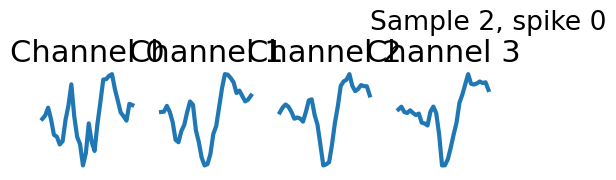

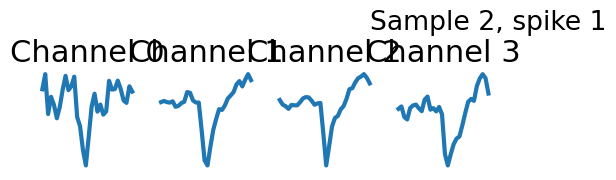

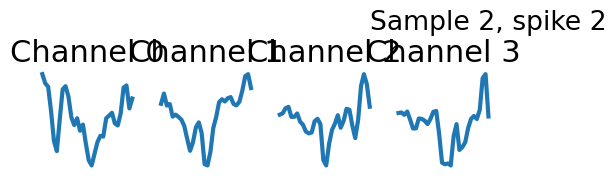

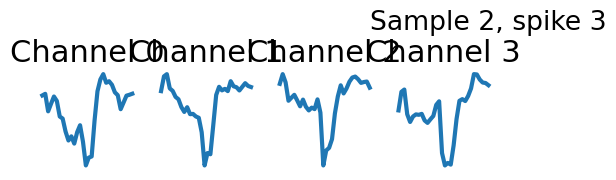

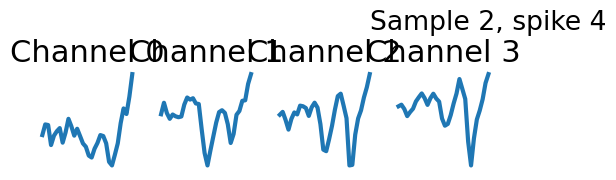

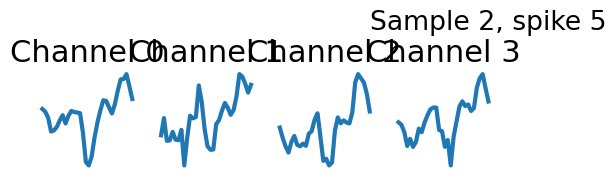

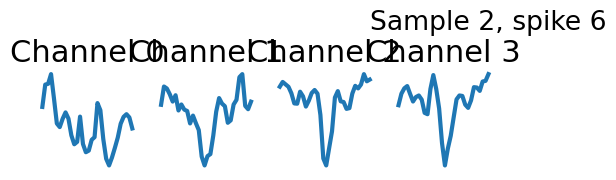

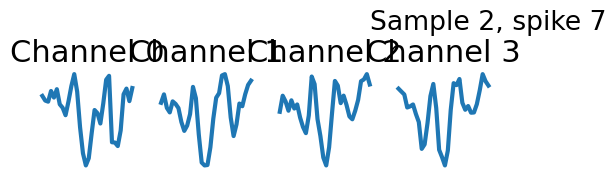

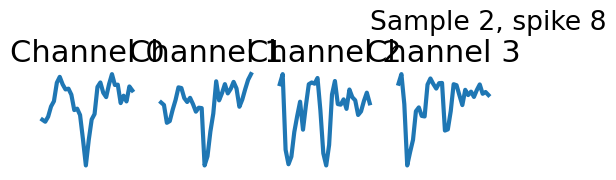

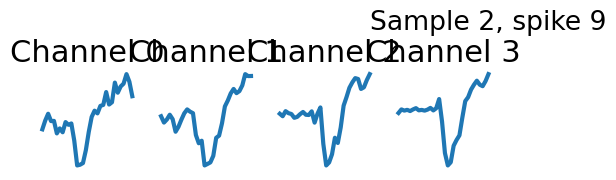

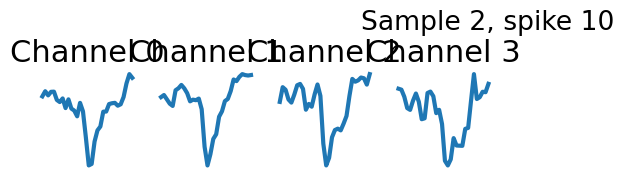

In [37]:
group = "group3"
for spike_idx in range(sample[0][group].shape[0]):
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"Sample {i}, spike {spike_idx}")
    for ch in range(sample[0][group].shape[1]):
        plt.subplot(4, 8, ch + 1)
        plt.plot(sample[0][group][spike_idx, ch, :])
        plt.title(f"Channel {ch}")
        plt.axis("off")
    plt.show()
    plt.close()

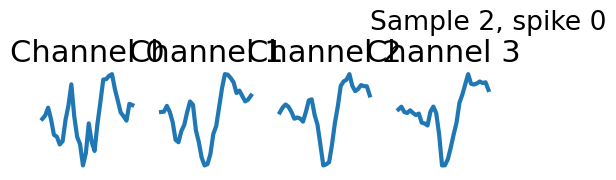

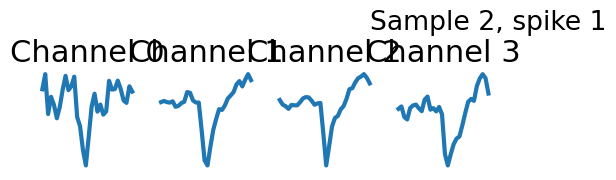

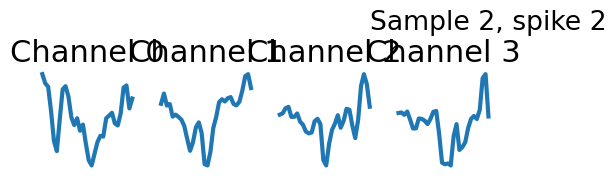

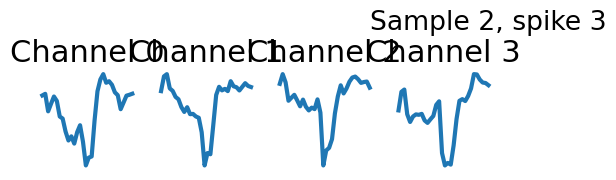

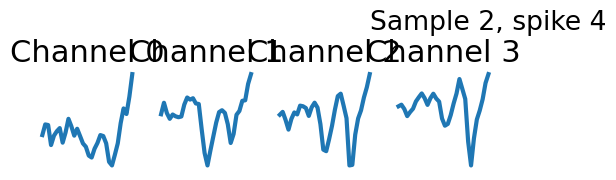

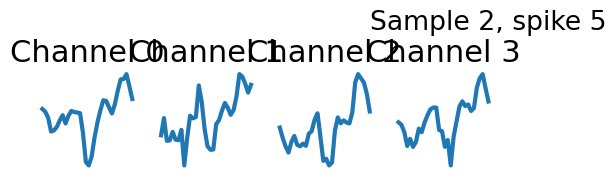

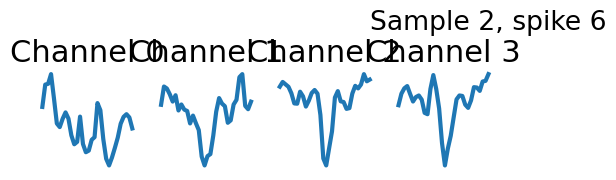

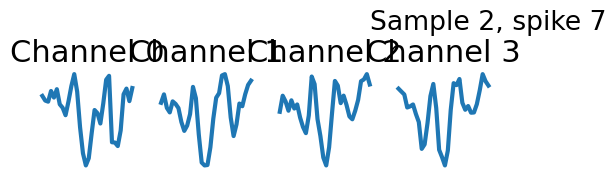

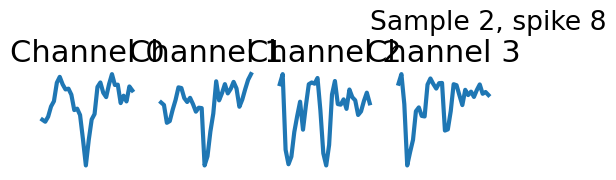

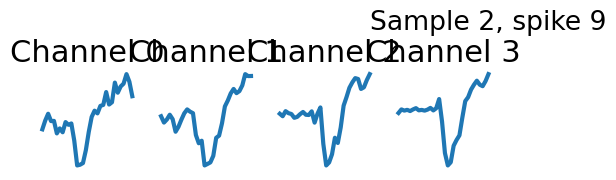

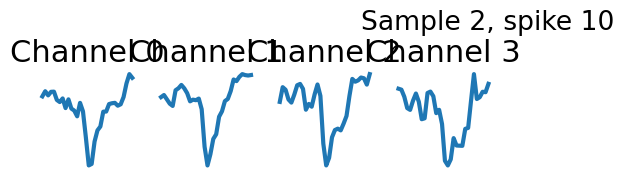

In [30]:
for spike_idx in range(sample[0]["group3"].shape[0]):
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"Sample {i}, spike {spike_idx}")
    for ch in range(sample[0]["group3"].shape[1]):
        plt.subplot(4, 8, ch + 1)
        plt.plot(sample[0]["group3"][spike_idx, ch, :])
        plt.title(f"Channel {ch}")
        plt.axis("off")
    plt.show()
    plt.close()

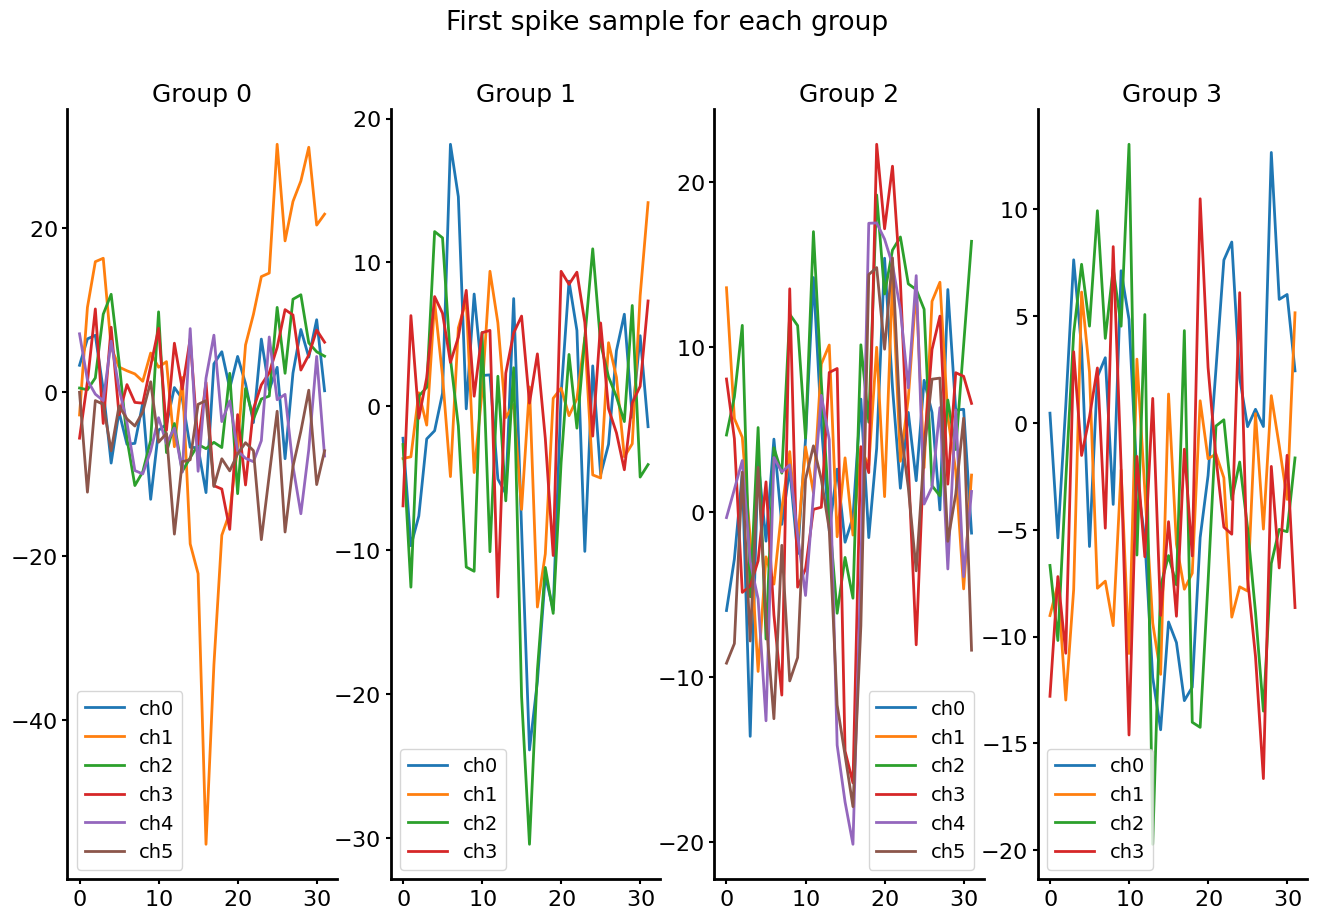

In [61]:
fig, _axs = plt.subplots(1, Mouse_Results.Params.nGroups)
_axs = _axs.flatten() if Mouse_Results.Params.nGroups > 1 else [_axs]
for g in range(Mouse_Results.Params.nGroups):
    ax = _axs[g]
    for ch in range(Mouse_Results.Params.nChannelsPerGroup[g]):
        ax.plot(sample[0][f'group{str(g)}'][0, ch, :], label = f'ch{ch}')
    ax.set_title(f'Group {g}')
    ax.legend()
fig.suptitle("First spike sample for each group")
plt.show()

Minimum spike length across all augmented samples and groups: 4. Chose spike index 2 to plot.


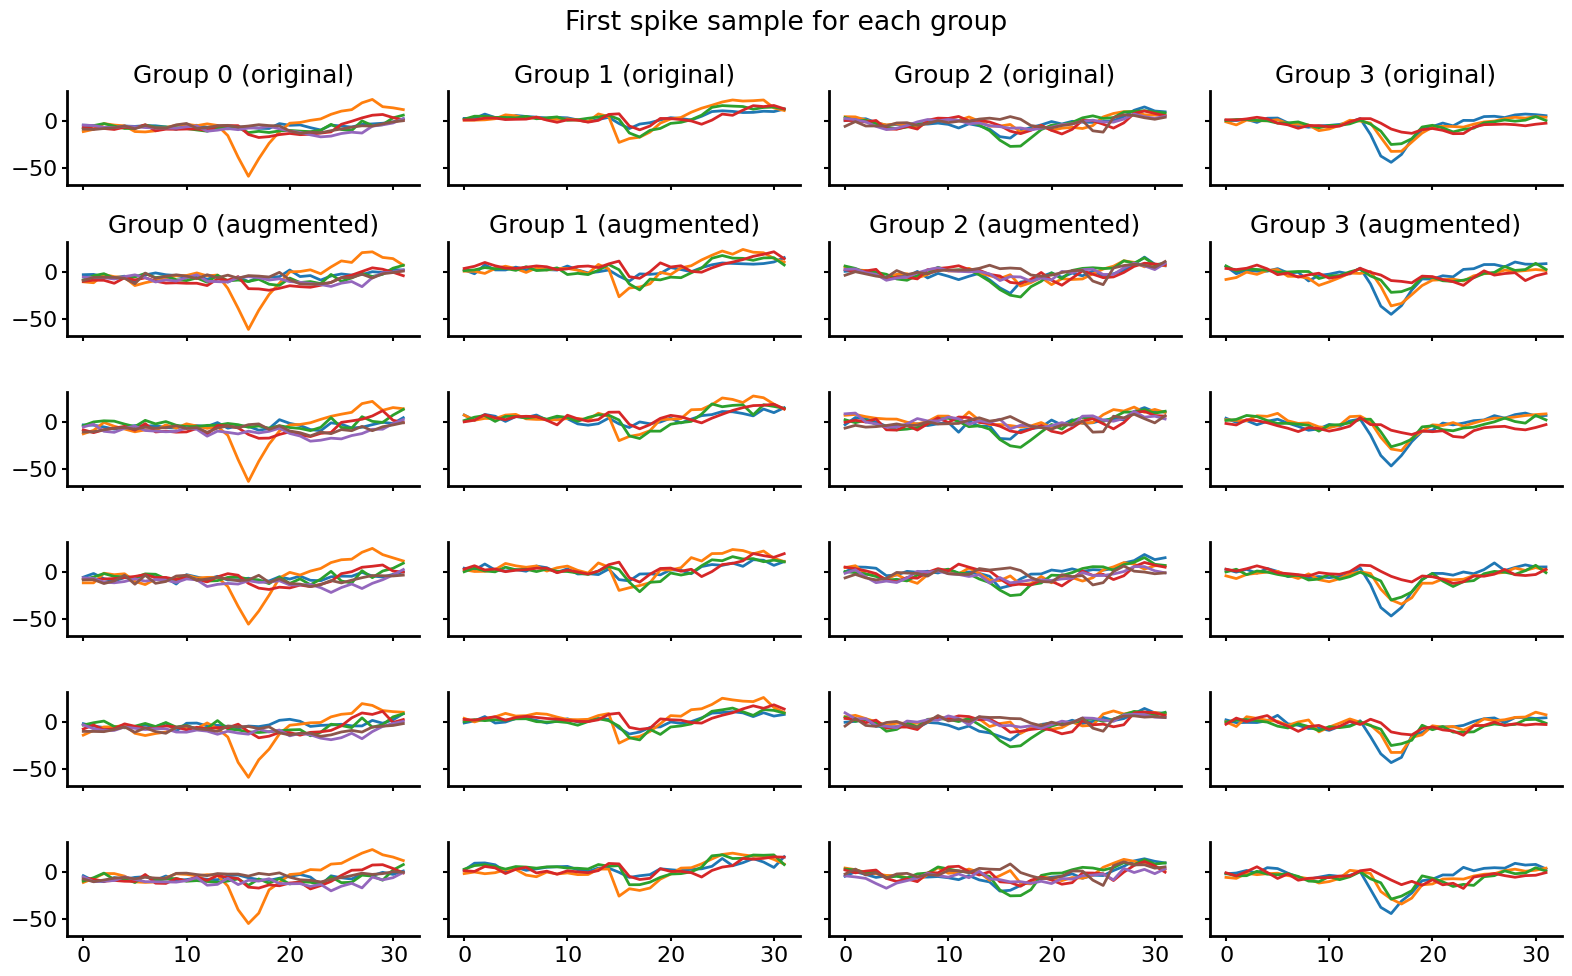

In [ ]:
from neuroencoders.fullEncoder import nnUtils as nnUtils
augmentation_config = nnUtils.NeuralDataAugmentation(device=Mouse_Results.ann["108"].deviceName,white_noise_std=2)

@tf.autograph.experimental.do_not_convert
def map_parse_serialized_sequence_with_augmentation(*vals):
    return nnUtils.parse_serialized_sequence_with_augmentation(
        Mouse_Results.ann['108'].params,
        *vals,
        augmentation_config=augmentation_config,
        batched=False,
    )

flatten_fn = nnUtils.create_flatten_augmented_groups_fn(
    Mouse_Results.ann['108'].params, augmentation_config.num_augmentations
)
augmented_dataset = unique_sample_dataset.map(
    map_parse_serialized_sequence_with_augmentation, num_parallel_calls=tf.data.AUTOTUNE
)
augmented_dataset = augmented_dataset.flat_map(flatten_fn)
augmented_dataset = augmented_dataset.map(Mouse_Results.ann['108'].create_indices, num_parallel_calls=tf.data.AUTOTUNE)
augmented_dataset = augmented_dataset.map(map_outputs, num_parallel_calls=tf.data.AUTOTUNE).cache()
augmented_samples = []
for i, augmented_sample in enumerate(augmented_dataset):
    # print(f"sample {i}: {augmented_sample[0].keys()}")
    augmented_samples.append(augmented_sample)
    
min_spike_length = min(
    [augmented_sample[0][f'group{str(g)}'].shape[0] for augmented_sample in augmented_samples for g in range(Mouse_Results.Params.nGroups)]
)
spike_idx = np.random.randint(0, min_spike_length-1)
spike_idx = 2
print(f"Minimum spike length across all augmented samples and groups: {min_spike_length}. Chose spike index {spike_idx} to plot.")

fig, _axs = plt.subplots(min(augmentation_config.num_augmentations + 1, 5 + 1), Mouse_Results.Params.nGroups, sharey=True, sharex=True)
_axs = _axs.flatten() if Mouse_Results.Params.nGroups > 1 else [_axs]
og_sample = next(iter(unique_sample))
for g in range(Mouse_Results.Params.nGroups):
    ax = _axs[g]
    for ch in range(Mouse_Results.Params.nChannelsPerGroup[g]):
        ax.plot(og_sample[0][f'group{str(g)}'][spike_idx, ch, :], label = f'ch{ch}')
    ax.set_title(f'Group {g} (original)')
    
for aug, sample in enumerate(augmented_samples):
    aug += 1
    if aug >= 6:
        break
    for g in range(Mouse_Results.Params.nGroups):
        ax = _axs[g + aug * Mouse_Results.Params.nGroups]
        for ch in range(Mouse_Results.Params.nChannelsPerGroup[g]):
            ax.plot(sample[0][f'group{str(g)}'][spike_idx, ch, :], label = f'ch{ch}')
        if aug == 1:
            ax.set_title(f'Group {g} (augmented)')
        # ax.legend()
fig.suptitle("First spike sample for each group")
fig.tight_layout()
plt.show()

In [89]:
seed = 42
num_samples = 20
parsed_records = list(dataset.as_numpy_iterator())
import random

# Pick random indices
if seed is not None:
    random.seed(seed)
indices = random.sample(range(len(parsed_records)), min(num_samples, len(parsed_records)))
indices = range(min(num_samples, len(parsed_records)))  # for debugging, take the first num_samples

results = []
for i in indices:
    rec = parsed_records[i]
    # Extract only required fields
    results.append({
        "indexInDat": rec[0]["indexInDat"],  # VarLenFeature → sparse tensor → numpy
        "time": rec[0]["time"],
        "time_behavior": rec[0]["time_behavior"],
        "pos_index": rec[0]["pos_index"],
        "pos": rec[0]["pos"],
        "groups": rec[0]["groups"]
    })
    for g in range(4):
        results[-1].update({f"group{g}": rec[0][f"group{g}"]})
        results[-1].update({f"indices{g}": rec[0][f"indices{g}"]})


KeyError: 'time'

In [ ]:
import neuroencoders.importData.compareSpikeFiltering as csf

In [ ]:
# merge results into a single dictionary
vals = {key: np.concatenate([r[key] for r in results], axis=0) for key in results[0].keys()}

In [ ]:
vals["time"].shape

(2048,)

In [ ]:
vals["groups"].shape

(278016,)

In [ ]:
reconstructed_spikes, spike_positions, batch_assignments = csf.reconstruct_spike_waveforms(vals, Mouse_Results.ann['108'].params)

In [32]:
csf.analyze_spike_statistics(reconstructed_spikes, Mouse_Results.ann['108'].params)

=== SPIKE STATISTICS ===
Batch 0, Group 0: 107 spikes
Batch 0, Group 1: 122 spikes
Batch 0, Group 2: 123 spikes
Batch 0, Group 3: 89 spikes
Batch 0 total: 441 spikes
Batch 1, Group 0: 95 spikes
Batch 1, Group 1: 95 spikes
Batch 1, Group 2: 105 spikes
Batch 1, Group 3: 86 spikes
Batch 1 total: 381 spikes
Batch 2, Group 0: 72 spikes
Batch 2, Group 1: 85 spikes
Batch 2, Group 2: 82 spikes
Batch 2, Group 3: 70 spikes
Batch 2 total: 309 spikes
Batch 3, Group 0: 79 spikes
Batch 3, Group 1: 92 spikes
Batch 3, Group 2: 112 spikes
Batch 3, Group 3: 90 spikes
Batch 3 total: 373 spikes
Batch 4, Group 0: 118 spikes
Batch 4, Group 1: 77 spikes
Batch 4, Group 2: 134 spikes
Batch 4, Group 3: 77 spikes
Batch 4 total: 406 spikes

Overall statistics:
Mean spikes per batch: 422.3
Std spikes per batch: 130.3
Min/Max spikes per batch: 127/790


Plotting 20 spikes from batch 0, group 3
Total valid spikes in this sample: 89


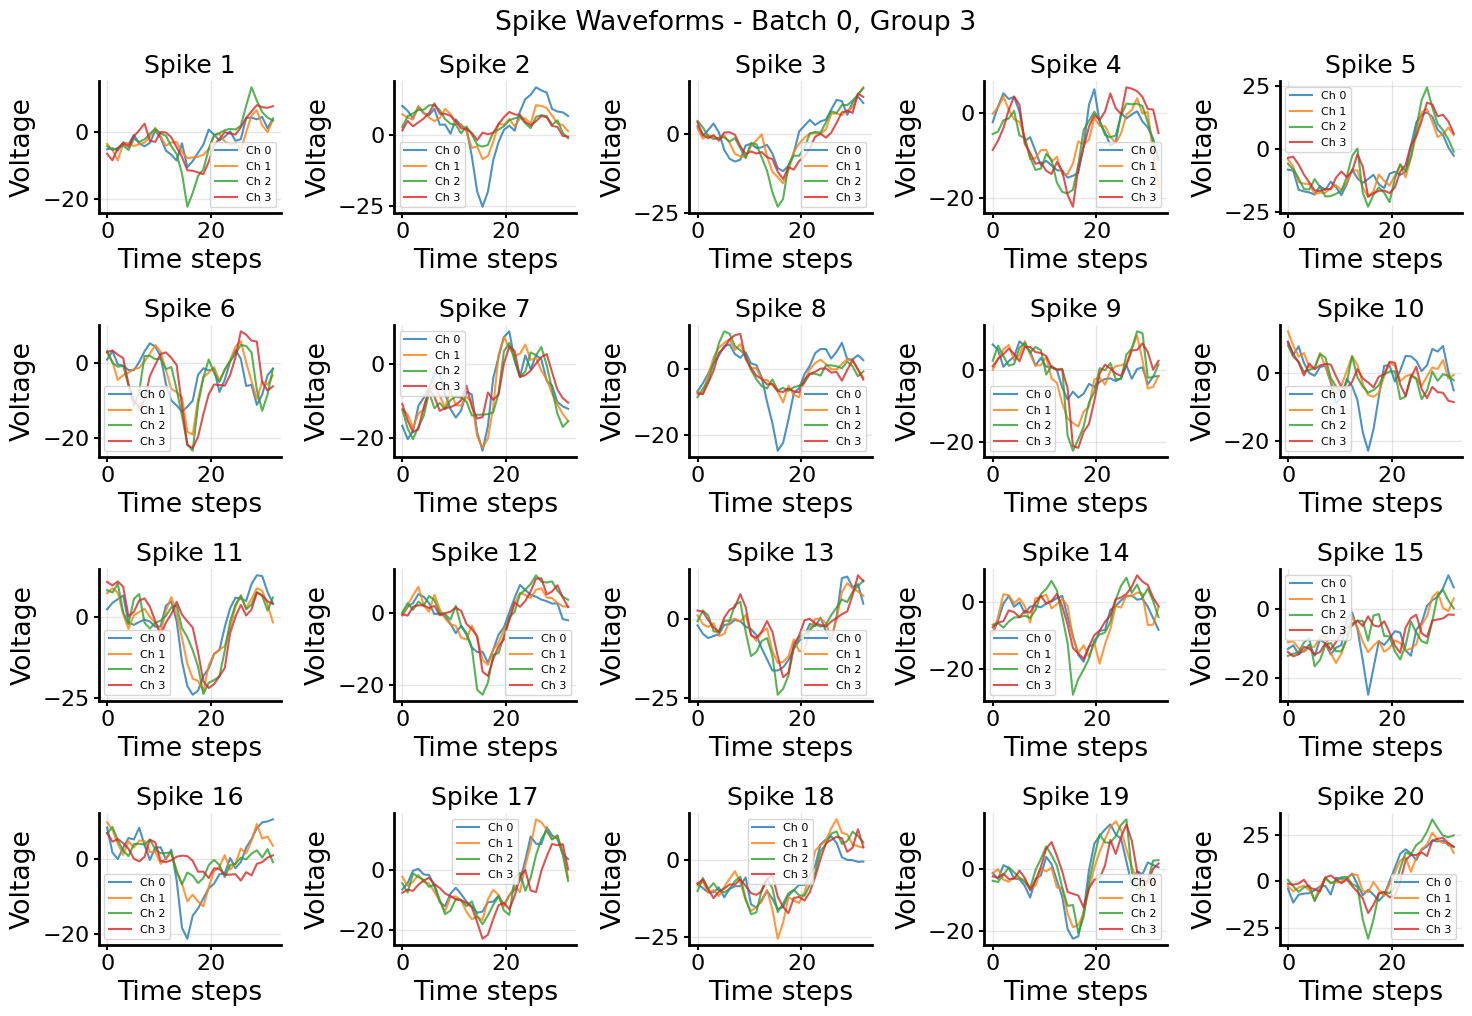

In [38]:
csf.plot_spike_examples(reconstructed_spikes,  spike_positions,Mouse_Results.ann['108'].params, batch_idx=0, group=3, max_spikes=20)

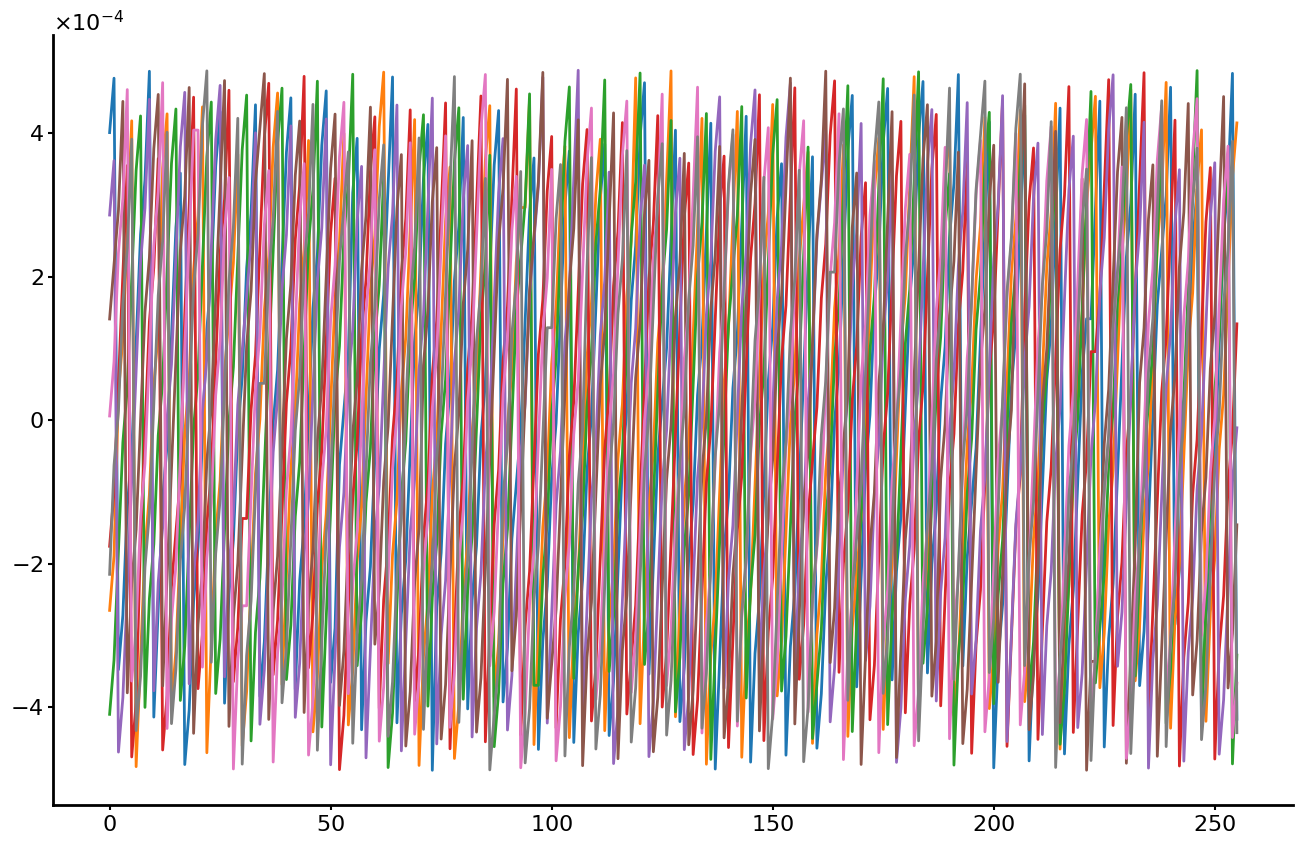

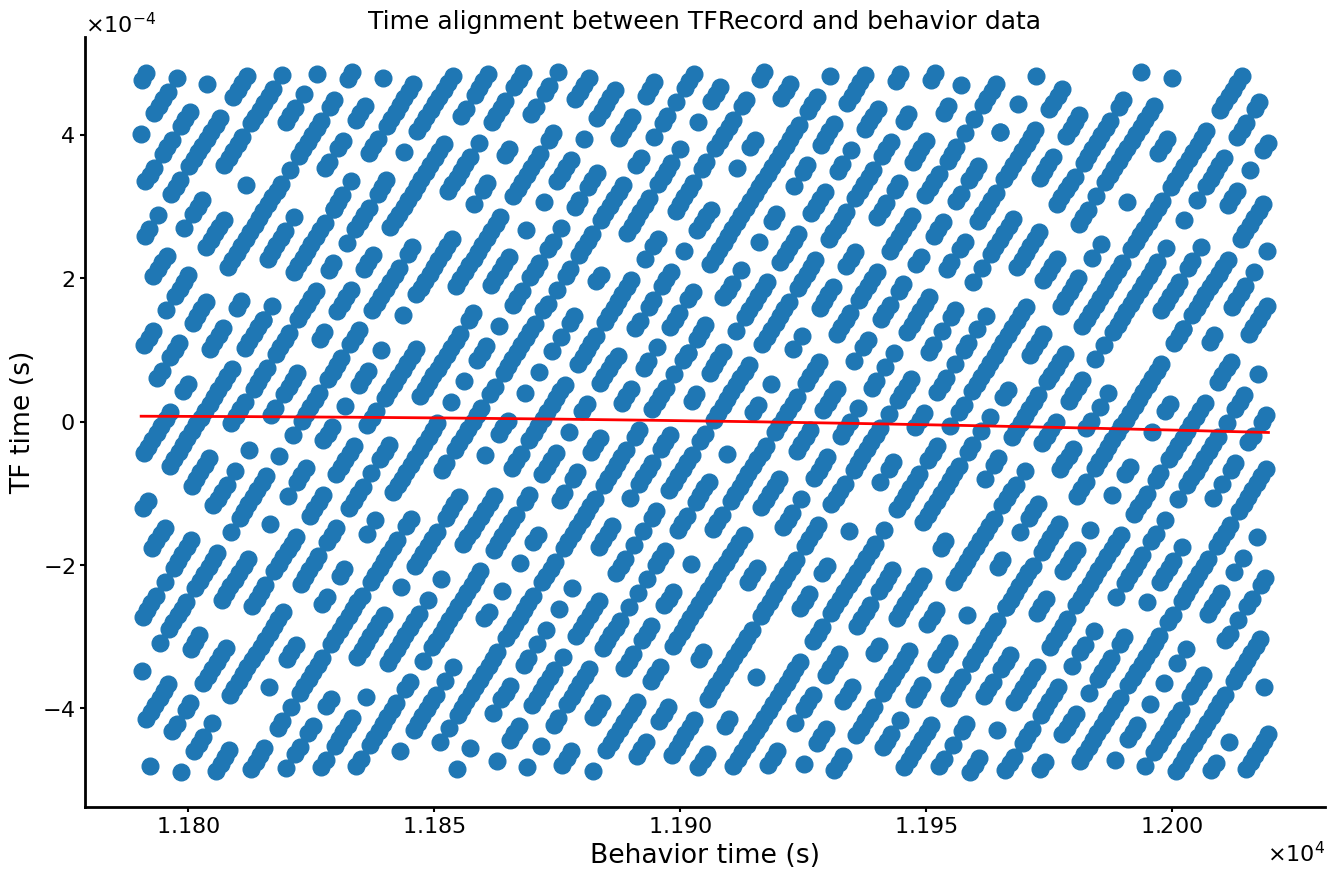

In [ ]:
import numpy.polynomial.polynomial as poly
diffs = []
times_tf = []
times_bd = []
for i, res in enumerate(results):
    times_tf.append(res["time_behavior"].flatten())
    times_bd.append(behaviorData['positionTime'][res['pos_index']].flatten())
    diffs.append(res["time_behavior"] - behaviorData['positionTime'][res['pos_index']].flatten())
    plt.plot(diffs[-1], label=f'Sample {i}')
diffs = np.array(diffs).flatten()
times_tf = np.array(times_tf).flatten()
times_bd = np.array(times_bd).flatten()
plt.show()

# plot the polyfit of times_tf versus times_bd
x = poly.polyfit(times_bd, times_tf, 2)
ffit = poly.polyval(times_bd, x)
plt.plot(times_bd, diffs, 'o')
plt.plot(times_bd, ffit - times_bd, 'r-')
plt.xlabel('Behavior time (s)')
plt.ylabel('TF time (s)')
plt.title('Time alignment between TFRecord and behavior data')
plt.show()

In [32]:
Mouse_Results.load_data(suffixes = ["_pre", "_training", "_cond", "_post"])

Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred


In [57]:
import neuroencoders.importData.rawdata_parser as rp
beh_post = rp.get_behavior("/home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/M1199_PAG/", phase = "post")

/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


In [54]:
fullbeh = Mouse_Results.data_helper['108'].fullBehavior
pos_training = Mouse_Results.resultsNN_phase['_pre']['posIndex'][0]

In [79]:
pos_training.shape

(2048,)

In [77]:
np.unique(pos_training.flatten().reshape(-1)).shape

(2043,)

In [55]:
fullbeh["positionTime"][pos_training]

array([[11541.83445962],
       [11541.97331636],
       [11542.11217311],
       ...,
       [11770.15268706],
       [11770.2912072 ],
       [11770.42972735]])

In [61]:
beh_post['positionTime'][pos_training]

array([[11541.83445962],
       [11541.97331636],
       [11542.11217311],
       ...,
       [11770.15268706],
       [11770.2912072 ],
       [11770.42972735]])

In [56]:
Mouse_Results.resultsNN_phase['_pre']['time'][0]

array([11543.901, 11544.05 , 11544.194, ..., 11770.382, 11770.509,
       11770.628], dtype=float32)

In [64]:
Mouse_Results.resultsNN_phase['_training']['speedMask'][0].shape

(22016,)

In [ ]:
deviceName = "gpu"
Mouse_Results = mf.Mouse_Results(Dir, mouse_name=mouse, manipe=manipe, target=target, 
                                                        nameExp=nameExp, nEpochs=nEpochs, phase=phase, 
                                                        deviceName=deviceName, windows=windowSizeMS,
                                                        isTransformer = "LSTM" not in nameExp, denseweight= False, 
                                                        transform_w_log = False,
                                                        which = "both",
                                                        isPredLoss = False,
                                                        GaussianHeatmap = True,
                                                        # bayes_project_path = nameExp_Bayes,
                                                        )

Path for 1199 found: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG
Windows found for 1199: ['108', '252']
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/4d_NO_PREDLOSS_GaussianHeatMap_LinearLoss_Transformer/results


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/shapely/measurement.py:81: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)


/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/4d_NO_PREDLOSS_GaussianHeatMap_LinearLoss_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
Setting up GaussianHeatmapLayer...
Occupation map: 442 zero-occupation bins, 57 low-density bins (below 6.2107e-01) in allowed zones.
Weight map: Removed 42 low-density bins adjacent to forbidden zones
Found 1/9953 training positions in forbidden regions
Output dimension: 4
UMazeProjectionLayer initialized with params: {'x_min': 0.0, 'x_max': 1.0, 'y_min': 0.0, 'y_max': 1.0, 'gap_x_min': 0.35, 'gap_x_max': 0.65, 'gap_y_min': 0.75}
Using Transformer architecture !
Using multi-column loss
Configured individual column losses: {'0': 'cyclic_mae', '1': 'mse'} with weights: {'0': 0.6, '1': 0.4}.
Reading saved cluster csv file


100%|██████████| 4/4 [00:09<00:00,  2.35s/it]
/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:1162: UserWarning: You asked for bayes trainer, but no bayes matrices pickle was found.
  warn(


finished reading
Setting up GaussianHeatmapLayer...
Occupation map: 442 zero-occupation bins, 57 low-density bins (below 6.2107e-01) in allowed zones.
Weight map: Removed 42 low-density bins adjacent to forbidden zones
Found 1/9953 training positions in forbidden regions
Output dimension: 4
UMazeProjectionLayer initialized with params: {'x_min': 0.0, 'x_max': 1.0, 'y_min': 0.0, 'y_max': 1.0, 'gap_x_min': 0.35, 'gap_x_max': 0.65, 'gap_y_min': 0.75}
Using Transformer architecture !
Using multi-column loss
Configured individual column losses: {'0': 'cyclic_mae', '1': 'mse'} with weights: {'0': 0.6, '1': 0.4}.
======================M1199=======================
Mouse_Results for 1199 (PAG)
Experiment: 4d_NO_PREDLOSS_GaussianHeatMap_LinearLoss_Transformer
Target: PosAndHeadDirectionAndThigmo
Phase: pre
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG
Windows: 108, 252


In [8]:
%matplotlib qt

In [10]:
Mouse_Results.load_data(suffixes=["_pre", "_training", "_cond", "_post"])

Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred


In [27]:
Dir

path       name       manipe  \
0   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1168       SubMFB   
1   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1186       SubPAG   
2   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1336       SubMFB   
3   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1336       SubMFB   
4   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1199       SubPAG   
5   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1199  SubReversal   
6   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1117       SubMFB   
7   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1281       SubMFB   
8   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1182       SubPAG   
9   /media/mickey/DataTheotime210/DimaERC2/neuroen...   Mouse994       SubPAG   
10  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1239       SubMFB   
11  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1162       SubMFB   
12  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1199       SubMFB   
13  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1239       SubPAG   
14  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1162       SubPAG   
15  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1230     SubKnown   
16  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1230     SubNovel   

   CorrecAmpli Session delay  date Treatment  \
0         None    None  None  None      None   
1         None    None  None  None      None   
2         None    None  None  None      None   
3         None    None  None  None      None   
4         None    None  None  None      None   
5         None    None  None  None      None   
6         None    None  None  None      None   
7         None    None  None  None      None   
8         None    None  None  None      None   
9         None    None  None  None      None   
10        None    None  None  None      None   
11        None    None  None  None      None   
12        None    None  None  None      None   
13        None    None  None  None      None   
14        None    None  None  None      None   
15        None    None  None  None      None   
16        None    None  None  None      None   

                                            expe_info  \
0   [[[[[1168]], ['SL'], ['20210121'], ['StimMFBWa...   
1   [[[[[1186]], ['DB'], ['20210409'], ['UMazePAG'...   
2   [[[[[1336]], ['SL'], ['20220711'], ['StimMFBWa...   
3   [[[[[1336]], ['SL'], ['20220711'], ['StimMFBWa...   
4   [[[[[1199]], ['DB'], ['20210408'], ['UMaze'], ...   
5   [[[[[1199]], ['SL'], ['20210416'], ['Reversal'...   
6   [[[[[1117]], ['SL'], ['20201110'], ['StimMFBWa...   
7   [[[[[1281]], ['SL'], ['20220530'], ['StimMFBWa...   
8   [[[[[1182]], ['DB'], ['20210301'], ['UMaze'], ...   
9   [[[[[994]], ['DB'], ['20191013'], ['UMaze'], [...   
10  [[[[[1239]], ['SL'], ['20211105'], ['StimMFBWa...   
11  [[[[[1162]], ['SL'], ['20200119'], ['StimMFBWa...   
12  [[[[[1199]], ['SL'], ['20210410'], ['StimMFBWa...   
13  [[[[[1239]], ['DB'], ['20211110'], ['UMazePAG'...   
14  [[[[[1162]], ['DB'], ['20210121'], ['UMaze'], ...   
15  [[[[[1230]], ['DB'], ['20211012'], ['UMazeKnow...   
16  [[[[[1230]], ['AB'], ['20210826'], ['Novel'], ...   

                                              results  \
0   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
1   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
2   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
3   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
4   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
5   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
6   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
7   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
8   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
9   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
10  /media/mickey/DataTheotime210/DimaERC2/neuroen...   
11  /media/mic

In [29]:
results_loader = mf.Results_Loader(dir=Dir, mice_nb=[1199], mice_manipes=["PAG"], phases = ["pre", "cond", "post"], target=target, timeWindows = [108,252])

Path for 1199 found: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG
Windows found for 1199: ['108', '252']
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/4d_NO_PREDLOSS_GaussianHeatMap_LinearLoss_Transformer/results
weird to copy that file now


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:804: UserWarning: Failed to load project for window 108 with error: group ``/behavior`` does not have a child named ``trainEpochs``. Creating new Project and DataHelper.
  warn(


NoSuchNodeError: group ``/behavior`` does not have a child named ``trainEpochs``

In [ ]:
Mouse_Results.show_results(winMS=108, phase ="training", save = True)

total windows: 22016 | selected windows: 6605 (thresh 0.69164866  ( 30.0 %) )
mean eucl. error: 0.24889012593399676 | selected error: 0.19232682607904675
mean linear error: 0.15791606301834438 | selected error: 0.11837215723098928


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/resultAnalysis/print_results.py:327: UserWarning: You are using a target different from pos, the error will be calculated as the euclidean distance between inferred and true for all dimensions target='PosAndHeadDirectionAndThigmo'. You should not expect anything from this error.
  warnings.warn(
/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/resultAnalysis/print_results.py:1153: UserWarning: dimOutput should be 1 or 2 but is 4, setting to 2 and plotting first 2 dimensions only.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
%matplotlib qt

In [ ]:
fig, axs = plt.subplots(2,1)
axs = axs.flatten()
axs[0].plot(Mouse_Results.resultsNN["time"][0][:1000], Mouse_Results.resultsNN["truePos"][0][:,0][:1000])
scatter = axs[0].scatter(Mouse_Results.resultsNN["time"][0][:1000], Mouse_Results.resultsNN["fullPred"][0][:,0][:1000], c=Mouse_Results.resultsNN["fullPred"][0][:,2][:1000], cmap = "hsv")
axs[0].set_title("predicted X position colored by head direction in degrees")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("X position (cm)")
# put colorbar
fig.colorbar(scatter, ax=axs[0], label='Head direction (degrees)')
axs[1].plot(Mouse_Results.resultsNN["time"][0][:1000], Mouse_Results.resultsNN["truePos"][0][:,1][:1000])
scatter = axs[1].scatter(Mouse_Results.resultsNN["time"][0][:1000], Mouse_Results.resultsNN["fullPred"][0][:,1][:1000], c=Mouse_Results.resultsNN["fullPred"][0][:,2][:1000], cmap = "hsv")
axs[1].set_title("predicted Y position colored by head direction in radians")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Y position (cm)")
fig.colorbar(scatter, ax=axs[1], label='Head direction (degrees)')
plt.tight_layout()
plt.show()

In [ ]:
def create_polar_colorbar(fig, mappable, ax_pos, angle_range=(-np.pi, np.pi)):
    """
    Create a circular colorbar showing head direction angles that matches arctan2 output
    
    Parameters:
    -----------
    fig : matplotlib.figure.Figure
        The figure object to add the colorbar to
    mappable : matplotlib.cm.ScalarMappable
        The scatter plot or other mappable object (used for color mapping)
    ax_pos : matplotlib.transforms.Bbox
        Position of the main axis (use ax.get_position())
    angle_range : tuple
        Range of angles (min, max) - use (-π, π) for arctan2 output or (0, 2π) for wrapped
        
    Returns:
    --------
    cax : matplotlib.axes.Axes
        The colorbar axis object
    """
    # Create small circular axis for colorbar
    cax = fig.add_axes([ax_pos.x0 + (ax_pos.width * 0.2) + 0.02, 
                       ax_pos.y0 + ax_pos.height*0.6, 
                       0.15, 0.15])
    cax.set_xlim(-1.1, 1.1)
    cax.set_ylim(-1.1, 1.1)
    cax.set_aspect('equal')
    
    # Create angles that match the HSV colormap mapping
    # HSV maps [0, 1] to full color wheel, so we need to map our angle range to [0, 1]
    n_segments = 256
    
    if angle_range == (-np.pi, np.pi):
        # For arctan2 output range [-π, π]
        # Map to HSV: -π -> 0.5 (cyan), 0 -> 0 (red), π -> 0.5 (cyan)
        # But we want: -π -> 0.5, 0 -> 0, π -> 1.0
        angles = np.linspace(-np.pi, np.pi, n_segments)
        hsv_values = (angles + np.pi) / (2 * np.pi)  # Map [-π, π] to [0, 1]
    else:
        # For range [0, 2π]
        angles = np.linspace(0, 2*np.pi, n_segments)
        hsv_values = angles / (2 * np.pi)
    
    colors = plt.cm.hsv(hsv_values)
    
    for i, (angle, color) in enumerate(zip(angles[:-1], colors[:-1])):
        # Draw small arc segments - note: we plot at the actual mathematical angle
        arc_angles = np.linspace(angle, angles[i+1], 10)
        x_inner = 0.7 * np.cos(arc_angles)
        y_inner = 0.7 * np.sin(arc_angles)
        x_outer = 1.0 * np.cos(arc_angles)
        y_outer = 1.0 * np.sin(arc_angles)
        
        # Create polygon for arc segment
        x_poly = np.concatenate([x_inner, x_outer[::-1]])
        y_poly = np.concatenate([y_inner, y_outer[::-1]])
        cax.fill(x_poly, y_poly, color=color, edgecolor='none')
    
    # Add angle labels at correct mathematical positions
    if angle_range == (-np.pi, np.pi):
        label_angles = [0, np.pi/2, np.pi, -np.pi/2]  # Right, Up, Left, Down
        label_texts = ['0°', '90°', '±180°', '-90°']
    else:
        label_angles = [0, np.pi/2, np.pi, 3*np.pi/2]
        label_texts = ['0°', '90°', '180°', '270°']
    
    for angle, text in zip(label_angles, label_texts):
        x_label = 1.2 * np.cos(angle)
        y_label = 1.2 * np.sin(angle)
        cax.text(x_label, y_label, text, ha='center', va='center', 
                fontsize=8, fontweight='bold')
    
    # Add directional arrows
    arrow_length = 0.15
    for angle in label_angles:
        x_start = 0.85 * np.cos(angle)
        y_start = 0.85 * np.sin(angle)
        dx = arrow_length * np.cos(angle)
        dy = arrow_length * np.sin(angle)
        cax.arrow(x_start, y_start, dx, dy, head_width=0.05, 
                 head_length=0.05, fc='black', ec='black')
    
    cax.set_xticks([])
    cax.set_yticks([])
    cax.set_title('Head\nDirection', fontsize = 11)
    
    # Remove axes spines
    for spine in cax.spines.values():
        spine.set_visible(False)
    
    return cax

In [ ]:
speedMask = Mouse_Results.resultsNN_phase["_training"]["speedMask"][0]

In [ ]:

fig, axs = plt.subplots(1,2)
axs= axs.flatten()
axs[0].plot(Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,0][:800], Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,1][:800], label='True')
scatter1 = axs[0].scatter(Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,0][:800], Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,1][:800], c=Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,2][:800], cmap = "hsv")
axs[0].set_title("true Position colored by head direction in degrees - fast epochs")
axs[0].set_xlabel("X position (cm)")
axs[0].set_ylabel("Y position (cm)")
create_polar_colorbar(fig, scatter1, axs[0].get_position(), angle_range=(-np.pi, np.pi))


axs[1].plot(Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,0][:800], Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,1][:800], label='True')
scatter2 = axs[1].scatter(Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,0][:800], Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,1][:800], c=((Mouse_Results.resultsNN_phase["_training"]["fullPred"][0][speedMask,2][:800] + np.pi) % (2*np.pi)) - np.pi, cmap = "hsv")
axs[1].set_title("true Position colored by predicted head direction in degrees - fast epochs")
axs[1].set_xlabel("X position (cm)")
axs[1].set_ylabel("Y position (cm)")
# create_polar_colorbar(fig, scatter2, axs[1].get_position(), angle_range=(-np.pi, np.pi))
plt.tight_layout()
plt.show()

/tmp/ipykernel_1588911/3732597549.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [ ]:
fig, axs = plt.subplots(1,2)
axs= axs.flatten()
axs[0].plot(Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,0][:8000], Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,1][:8000], label='True', alpha = 0.5)
scatter1 = axs[0].scatter(Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,0][:8000], Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,1][:8000], c=Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,3][:8000], cmap = "viridis")
fig.colorbar(scatter1, ax=axs[0])
axs[0].set_title("true Position colored by distance to the walls - fast epochs")
axs[0].set_xlabel("X position (cm)")
axs[0].set_ylabel("Y position (cm)")

axs[1].plot(Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,0][:8000], Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,1][:8000], label='True', alpha = 0.5)
scatter2 = axs[1].scatter(Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,0][:8000], Mouse_Results.resultsNN_phase["_training"]["truePos"][0][speedMask,1][:8000], c=Mouse_Results.resultsNN_phase["_training"]["fullPred"][0][speedMask,3][:8000], cmap = "viridis")
fig.colorbar(scatter2, ax=axs[1])
axs[1].set_title("true Position colored by predicted distance to the walls - fast epochs")
axs[1].set_xlabel("X position (cm)")
axs[1].set_ylabel("Y position (cm)")

plt.tight_layout()
plt.show()

In [ ]:
from neuroencoders.resultAnalysis import print_results

print_results.print_results(
    Mouse_Results.ann['108'].folderResult,
    windowSizeMS=108,
    show=False,
    lossSelection=0.5,
    euclidean=False,
    target="posandheaddirectionandthigmo",
    phase="training",
    useSpeedMask=True,
    training_data=Mouse_Results.ann['108'].training_data,
    l_function=Mouse_Results.l_function,
    save = True
)


total windows: 22016 | selected windows: 5428 (thresh 0.71916044  ( 50.0 %) )
mean eucl. error: 0.24889012593399676 | selected error: 0.13139128904109457
mean linear error: 0.15791606301834438 | selected error: 0.07190099138455056


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/resultAnalysis/print_results.py:295: UserWarning: Warning: useSpeedMask is True, and training_data is provided, so will be using speedMask on data.
  warnings.warn(
/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/resultAnalysis/print_results.py:322: UserWarning: You are using a target different from pos, the error will be calculated as the euclidean distance between inferred and true for all dimensions target='posandheaddirectionandthigmo'. You should not expect anything from this error.
  warnings.warn(
/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/resultAnalysis/print_results.py:1196: UserWarning: useSpeedMask is True, so will be using speedMask to select the windows in fig_interror.
  warnings.warn(
/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/resultAnalysis/print_results.py:1202: UserWarning: dimOutput should be 1 or 2 but is 4, setting to 2 and plotting first 2 dimensions only.
  w

KeyboardInterrupt: 

In [ ]:
Mouse_Results.load_data(suffixes = "_training")

Adding entropy as lossPred


In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results.show_results(winMS = 252, phase = "pre")

total windows: 896 | selected windows: 269 (thresh 0.726352  ( 30.0 %) )
mean eucl. error: 0.34687543310081936 | selected error: 0.33584755761138674
mean linear error: 0.2650965087958385 | selected error: 0.2738246427759134
threshold value: 0.7921677810000001







In [ ]:
outputTest = Mouse_Results.ann['108'].test(
    Mouse_Results.DataHelper.fullBehavior,
    windowSizeMS = 108,
    isPredLoss = False,
    l_function = Mouse_Results.l_function,
    useSpeedFilter = False,
    phase = "training",
    useTrain = True,
    template = "pre",
    T_scaling = T
)

Loading the weights of the trained network
INFERRING
86/86 [==============================] - 6s 61ms/step
gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask


IndexError: tuple index out of range

## mobs_function

##### plotting logits stuff for heatmap

In [ ]:
import dill as pickle

In [ ]:
with open(os.path.join(Mouse_Results.folderResult, "108", "decoding_results_pre.pkl"), "rb") as f:
    decoding_results = pickle.load(f)

In [ ]:
decoding_results.keys()

dict_keys(['featurePred', 'featureTrue', 'times', 'predLoss', 'posLoss', 'posIndex', 'speedMask', 'uncertaintyLoss', 'indexInDat', 'projPred', 'projTruePos', 'linearPred', 'linearTrue', 'logits_hw', 'var_total', 'Hn', 'maxp', 'T_scaling'])

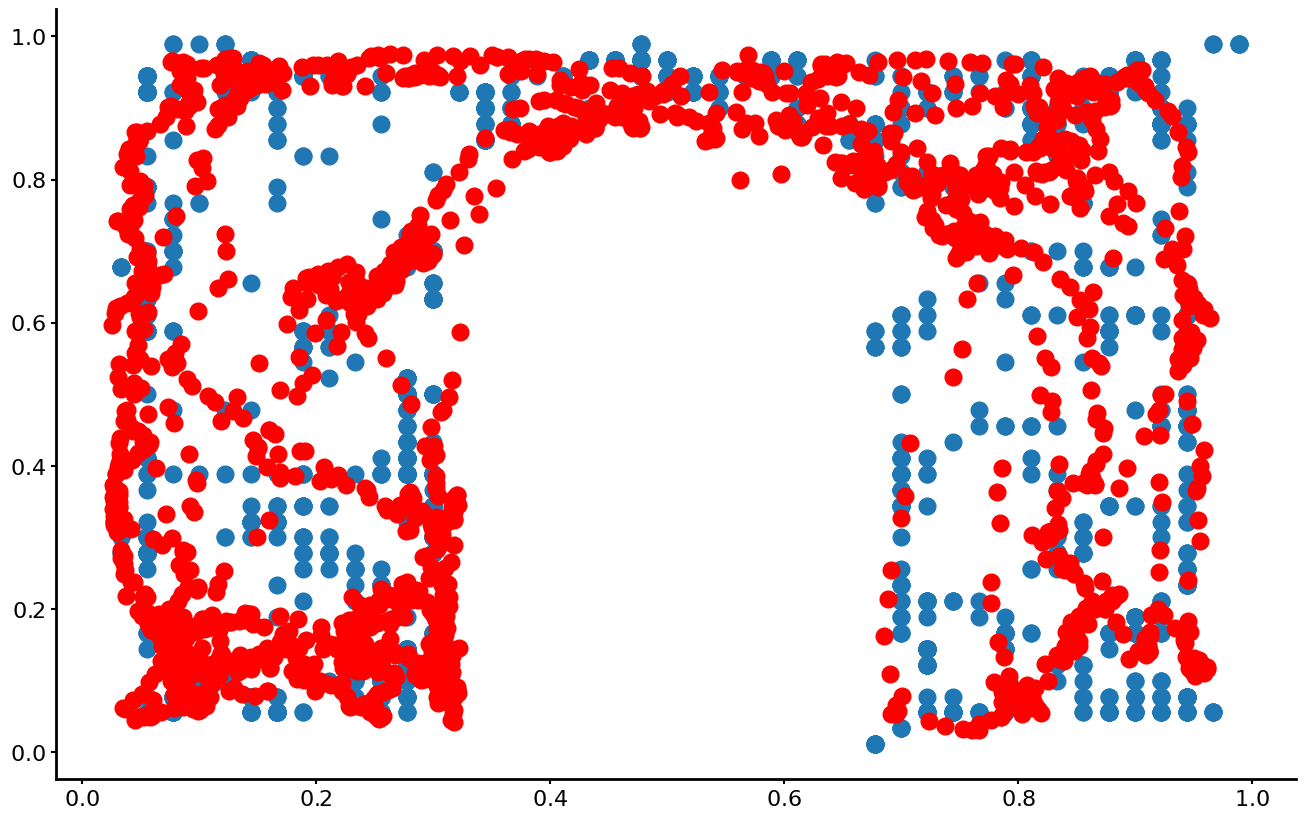

In [ ]:
plt.scatter(decoding_results["featurePred"][:,0], decoding_results["featurePred"][:,1])
plt.scatter(decoding_results["featureTrue"][:,0], decoding_results["featureTrue"][:,1], c= "r")

In [ ]:
logits_hw = decoding_results["logits_hw"]
entropy_hw = decoding_results["Hn"]
net = Mouse_Results.ann['108']
heatmap_layer = net.GaussianHeatmap
truePos = decoding_results["featureTrue"]

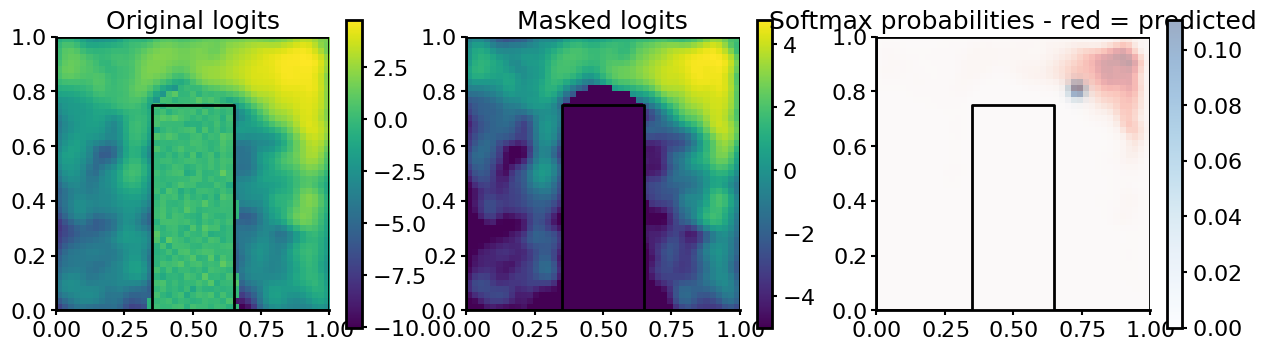

Forbidden probability sum: 0.000000
Allowed probability sum: 1.000000
Target - forbidden mass: 0.000000
Target - allowed mass: 1.000000


In [ ]:
# Assume logits_hw: [B,H,W], target_hw: [B,H,W], heatmap_layer instance exists
from neuroencoders.utils.global_classes import MAZE_COORDS
B, H, W = logits_hw.shape

# 1️⃣ Mask forbidden logits
masked_logits = tf.where(heatmap_layer.forbid_mask_tf[None] > 0, heatmap_layer.NEG, logits_hw)

# 2️⃣ Softmax over allowed bins
logits_flat = tf.reshape(masked_logits, [B, H*W])
probs_flat = tf.nn.softmax(logits_flat, axis=-1)
probs = tf.reshape(probs_flat, [B, H, W])

# 3️⃣ Gaussian targets for comparison
target_hw = heatmap_layer.gaussian_heatmap_targets(truePos)  # batch-size slice

# 4️⃣ Plot one example
i = np.random.randint(0, B-1)  # first example in batch

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.title("Original logits")
plt.plot(MAZE_COORDS[:,0], MAZE_COORDS[:,1], 'k-', lw=2)
plt.imshow(logits_hw[i], origin='lower', extent = (0,1,0,1))
plt.colorbar()

plt.subplot(1,3,2)
plt.title("Masked logits")
plt.plot(MAZE_COORDS[:,0], MAZE_COORDS[:,1], 'k-', lw=2)
plt.imshow(masked_logits[i], origin='lower', vmin=-5, extent= (0,1,0,1))
plt.colorbar()

plt.subplot(1,3,3)
plt.title("Softmax probabilities - red = predicted")
overlap = np.minimum(probs[i], target_hw.numpy()[i])
plt.plot(MAZE_COORDS[:,0], MAZE_COORDS[:,1], 'k-', lw=2)

plt.imshow(probs[i], origin='lower', alpha = 0.6, cmap = "Reds", extent = (0,1,0,1))
plt.imshow(target_hw.numpy()[i], origin='lower', alpha=0.4, cmap = "Blues", extent = (0,1,0,1))
# plt.imshow(overlap, cmap='YlOrBr', origin = "lower", alpha=0.2)
plt.colorbar()

plt.show()

# Optional: check forbidden bins probability sum
forbid_prob_sum = tf.reduce_sum(probs[i] * heatmap_layer.forbid_mask_tf)
allowed_prob_sum = tf.reduce_sum(probs[i] * (1.0 - heatmap_layer.forbid_mask_tf))
print(f"Forbidden probability sum: {forbid_prob_sum.numpy():.6f}")
print(f"Allowed probability sum: {allowed_prob_sum.numpy():.6f}")

# Optional: check target mass
forbid_target_sum = tf.reduce_sum(target_hw[i] * heatmap_layer.forbid_mask_tf)
allowed_target_sum = tf.reduce_sum(target_hw[i] * (1.0 - heatmap_layer.forbid_mask_tf))
print(f"Target - forbidden mass: {forbid_target_sum.numpy():.6f}")
print(f"Target - allowed mass: {allowed_target_sum.numpy():.6f}")


In [ ]:
truePos.shape
probs.shape

TensorShape([2048, 45, 45])

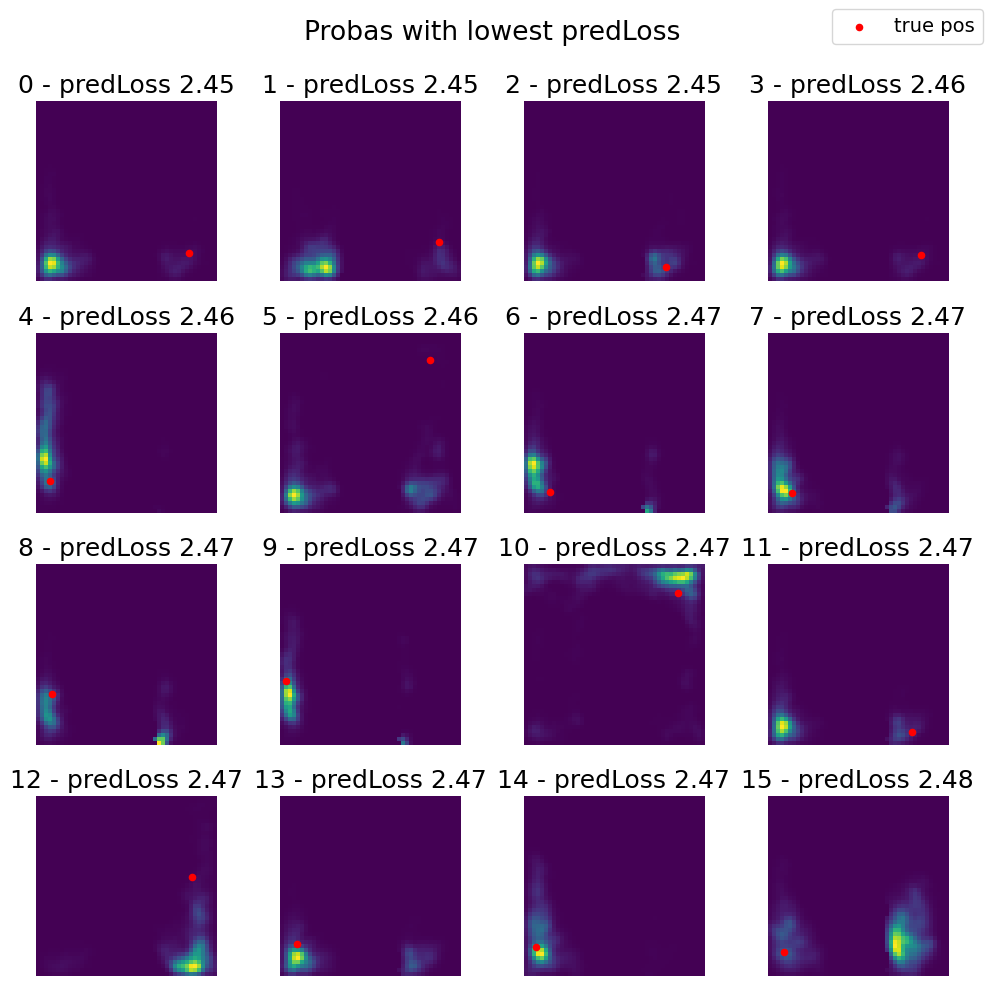

In [ ]:
predLoss = decoding_results["predLoss"].reshape(-1)

num_subplots = 16
# get 10 smallest predloss
predLoss_sorted_indices = np.argsort(predLoss)[:num_subplots].flatten()

# plot the first 16 imshow of logits_hw 
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(num_subplots):
    ax = axs[i // 4, i % 4]
    ax.imshow(probs[predLoss_sorted_indices[i], :, :], origin='lower', vmin=0, extent = (0,1,0,1), label = "scaled proba")
    ax.scatter(truePos[predLoss_sorted_indices[i],0], truePos[predLoss_sorted_indices[i],1], c='r', s=20, label = "true pos")
    ax.set_title(f'{i} - predLoss {predLoss[predLoss_sorted_indices[i]]:.2f}')
    ax.axis('off')
fig.suptitle("Probas with lowest predLoss")
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

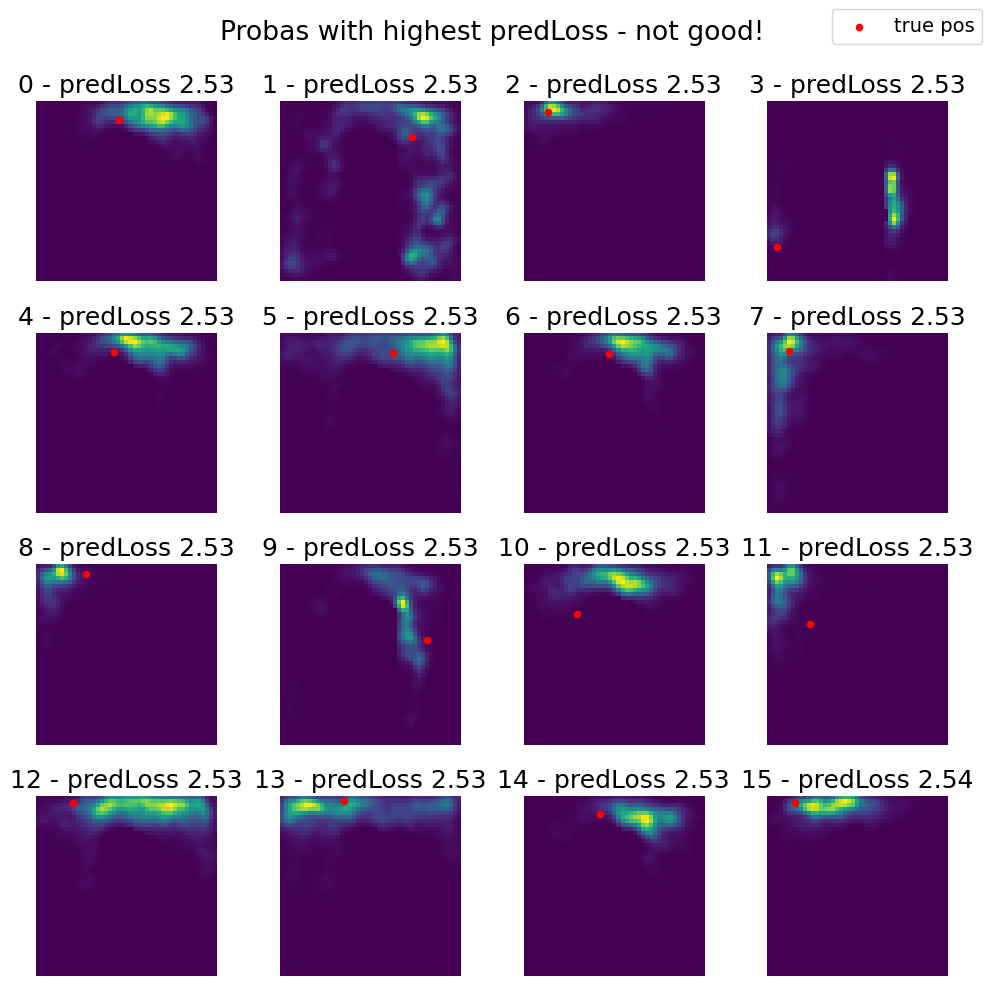

In [ ]:
predLoss = decoding_results["predLoss"].reshape(-1)

num_subplots = 16
# get 10 smallest predloss
predLoss_sorted_indices = np.argsort(predLoss)[-num_subplots:].flatten()

# plot the first 16 imshow of logits_hw 
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(num_subplots):
    ax = axs[i // 4, i % 4]
    ax.imshow(probs[predLoss_sorted_indices[i], :, :], origin='lower', vmin=0, extent = (0,1,0,1), label = "scaled proba")
    ax.scatter(truePos[predLoss_sorted_indices[i],0], truePos[predLoss_sorted_indices[i],1], c='r', s=20, label = "true pos")
    ax.set_title(f'{i} - predLoss {predLoss[predLoss_sorted_indices[i]]:.2f}')
    ax.axis('off')
fig.suptitle("Probas with highest predLoss - not good!")
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

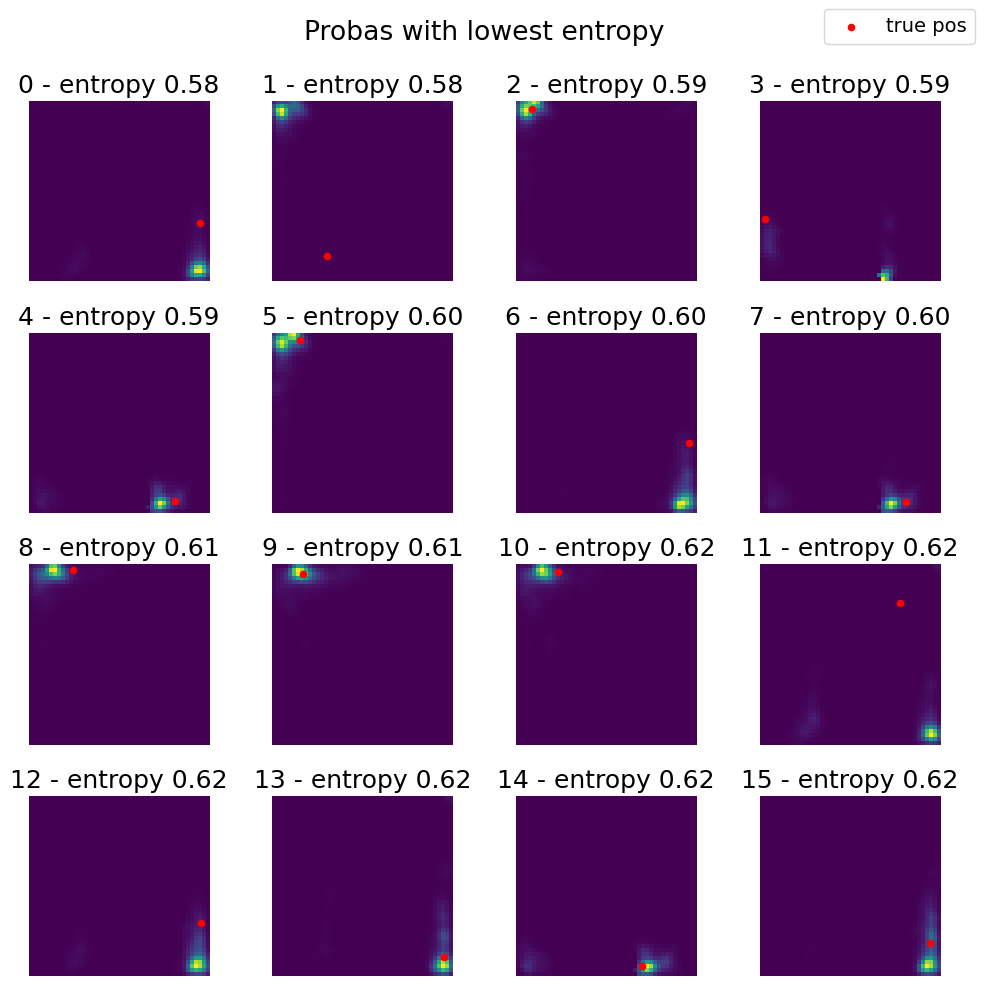

In [ ]:
num_subplots = 16
# get 10 smallest entropy
entropy_sorted_indices = tf.argsort(entropy_hw)[:num_subplots].numpy() 

# plot the first 16 imshow of logits_hw 
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(num_subplots):
    ax = axs[i // 4, i % 4]
    ax.imshow(probs[entropy_sorted_indices[i], :, :], origin='lower', vmin=0, extent = (0,1,0,1), label = "scaled proba")
    ax.scatter(truePos[entropy_sorted_indices[i],0], truePos[entropy_sorted_indices[i],1], c='r', s=20, label = "true pos")
    ax.set_title(f'{i} - entropy {entropy_hw[entropy_sorted_indices[i]]:.2f}')
    ax.axis('off')
fig.suptitle("Probas with lowest entropy")
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

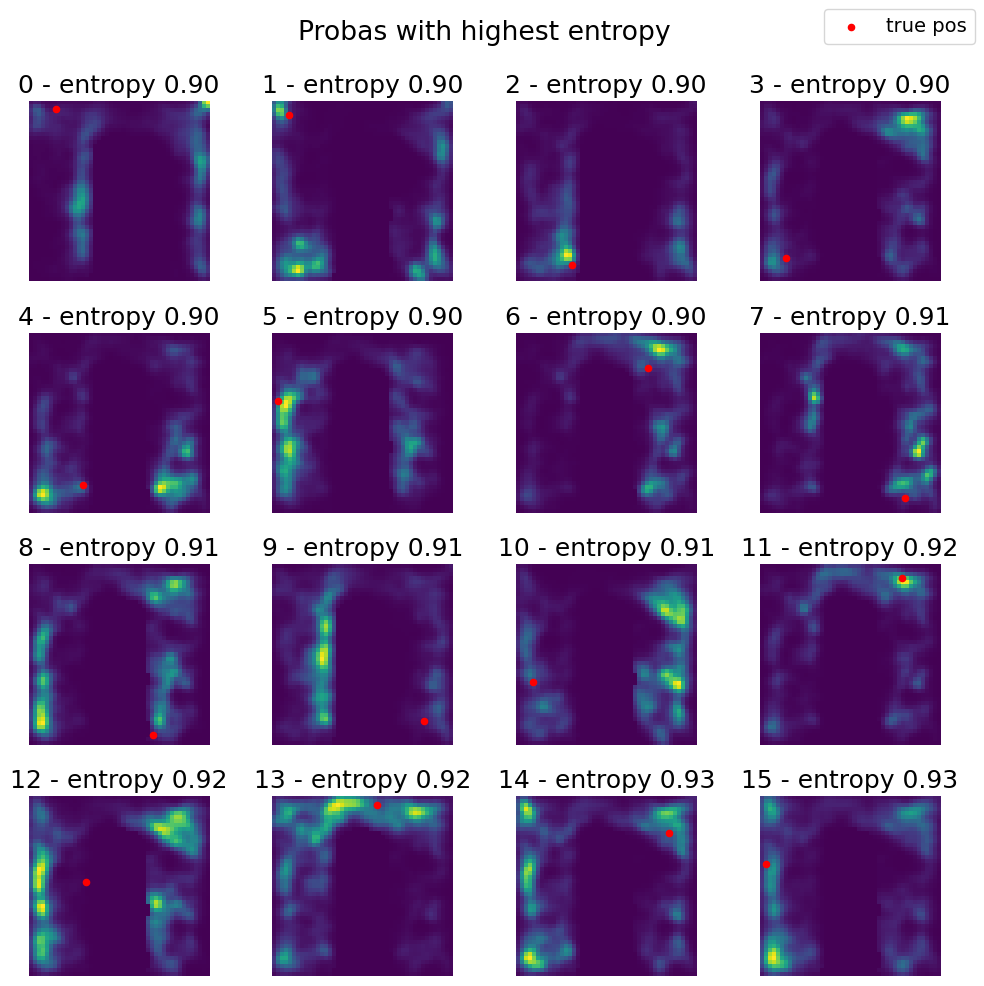

In [ ]:
num_subplots = 16
# get 10 smallest entropy
entropy_sorted_indices = tf.argsort(entropy_hw)[-num_subplots:].numpy() 

# plot the first 16 imshow of logits_hw 
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(num_subplots):
    ax = axs[i // 4, i % 4]
    ax.imshow(probs[entropy_sorted_indices[i], :, :], origin='lower', vmin=0, extent = (0,1,0,1), label = "scaled proba")
    ax.scatter(truePos[entropy_sorted_indices[i],0], truePos[entropy_sorted_indices[i],1], c='r', s=20, label = "true pos")
    ax.set_title(f'{i} - entropy {entropy_hw[entropy_sorted_indices[i]]:.2f}')
    ax.axis('off')
fig.suptitle("Probas with highest entropy")
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:

# Compute KL loss
batch_pos = decoding_results["featureTrue"]
kl_loss = heatmap_layer.safe_kl_heatmap_loss(logits_hw, target_hw)
print("KL loss:", kl_loss.numpy())

# Check that forbidden bins have zero probability
masked_logits = tf.where(heatmap_layer.forbid_mask_tf[None]>0, heatmap_layer.NEG, logits_hw)
probs = tf.nn.softmax(tf.reshape(masked_logits, [len(batch_pos),45*45]), axis=-1)
probs = tf.reshape(probs, [len(batch_pos),45,45])
probs *= (1.0 - heatmap_layer.forbid_mask_tf[None])
probs /= tf.reduce_sum(probs, axis=[1,2], keepdims=True)
print("Max probability in forbidden area (should be 0):",
      tf.reduce_max(probs * heatmap_layer.forbid_mask_tf[None]).numpy())

KL loss: 3.824944
Max probability in forbidden area (should be 0): 0.0


In [ ]:
probs = tf.nn.softmax(logits_hw, axis = -1).numpy()

In [ ]:
probs.max()

0.70828384

In [ ]:
sample_idx = 10
probs = tf.nn.softmax(tf.reshape(logits_hw[sample_idx], [-1]))
print("Max prob:", tf.reduce_max(probs).numpy())
topk = tf.math.top_k(probs, k=10)
print("Top 10 probs:", topk.values.numpy())


Max prob: 0.01607581
Top 10 probs: [0.01607581 0.01577259 0.01567167 0.01521763 0.01489115 0.01486329
 0.01416695 0.01416348 0.01413361 0.01401411]


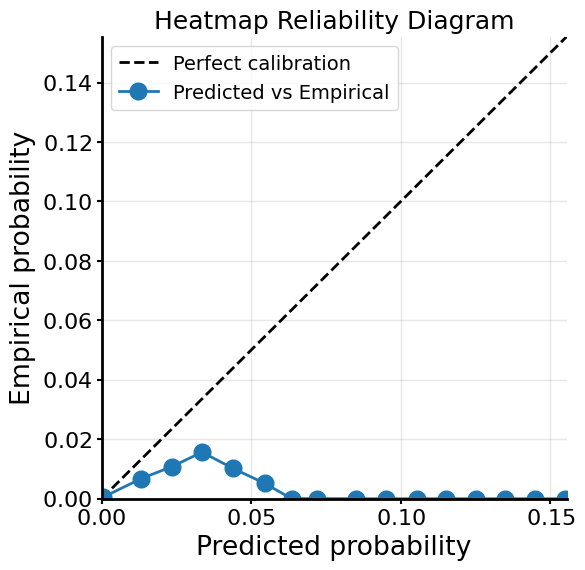

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def heatmap_reliability_plot(logits_hw, target_hw, n_bins=10, forbid_mask=None):
    """
    Creates a reliability diagram for heatmap predictions.

    Args:
        logits_hw: [B, H, W] predicted logits
        target_hw: [B, H, W] target heatmaps (normalized)
        n_bins: number of probability bins
        forbid_mask: [H, W] 1 for forbidden bins, 0 otherwise (optional)
    """
    B, H, W = logits_hw.shape

    # Mask forbidden bins if provided
    if forbid_mask is not None:
        logits_hw = tf.where(forbid_mask[None] > 0, -1e5, logits_hw)
    
    # Flatten spatial dimensions
    probs_flat = tf.reshape(tf.nn.softmax(tf.reshape(logits_hw, [B, H*W]), axis=-1), [B, H*W])
    targets_flat = tf.reshape(target_hw, [B, H*W])

    probs_flat = probs_flat.numpy()
    targets_flat = targets_flat.numpy()

    # Define bins
    bin_edges = np.linspace(0.0, 1.0, n_bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    avg_pred_probs = []
    avg_true_probs = []

    for i in range(n_bins):
        mask = (probs_flat >= bin_edges[i]) & (probs_flat < bin_edges[i+1])
        if np.sum(mask) > 0:
            avg_pred_probs.append(np.mean(probs_flat[mask]))
            avg_true_probs.append(np.mean(targets_flat[mask]))
        else:
            avg_pred_probs.append(bin_centers[i])
            avg_true_probs.append(0.0)

    # Plo
    plt.figure(figsize=(6,6))
    plt.plot([0,1], [0,1], 'k--', label="Perfect calibration")
    plt.plot(avg_pred_probs, avg_true_probs, 'o-', label="Predicted vs Empirical")
    plt.xlim(0, probs_flat.max() + 0.05)
    plt.ylim(0, probs_flat.max() + 0.05)

    plt.xlabel("Predicted probability")
    plt.ylabel("Empirical probability")
    plt.title("Heatmap Reliability Diagram")
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Usage
heatmap_reliability_plot(logits_hw, target_hw, n_bins=100, forbid_mask=net.GaussianHeatmap.forbid_mask_tf)


In [ ]:
decoding_results.keys()

dict_keys(['featurePred', 'featureTrue', 'times', 'predLoss', 'posLoss', 'posIndex', 'speedMask', 'uncertaintyLoss', 'indexInDat', 'projPred', 'projTruePos', 'linearPred', 'linearTrue', 'logits_hw', 'var_total', 'Hn', 'maxp', 'T_scaling'])

In [ ]:
x = decoding_results["predLoss"].reshape(-1)
y = kl_loss.numpy()
p = np.polyfit(x, y, 2)

/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3579: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


KL loss for ann: 3.824944


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3579: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3579: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


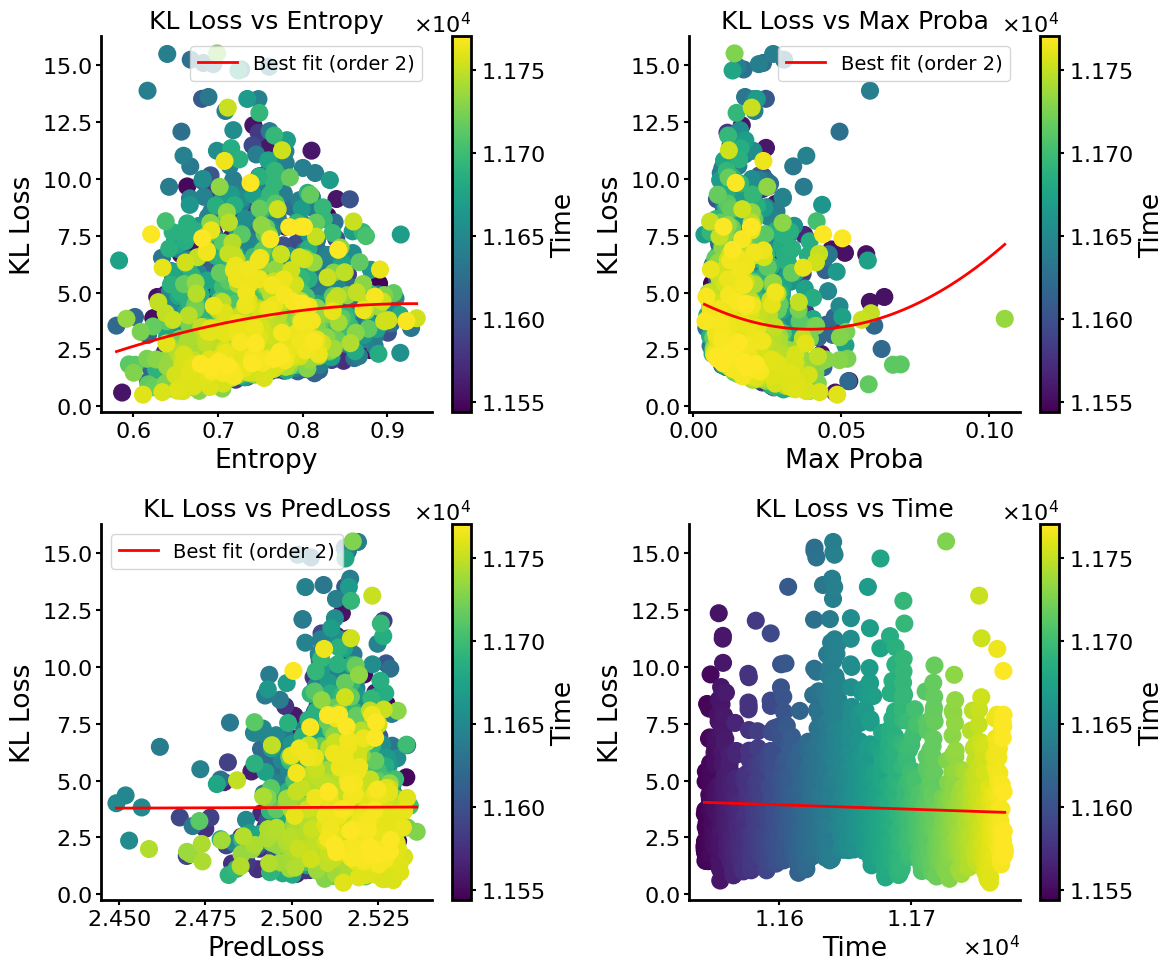

In [ ]:
import numpy as np

# Compute KL loss
batch_pos = decoding_results["featureTrue"]
kl_loss = Mouse_Results.ann['108'].GaussianHeatmap.safe_kl_heatmap_loss(logits_hw, target_hw, return_batch = True)
print("KL loss for ann:", kl_loss.numpy().mean())
# plot 4 subplots of kl_loss vs : entropy, predLoss, max_proba, time
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

time = decoding_results["times"]

# Scatter points colored by time
sc = axs[0,0].scatter(decoding_results["Hn"], kl_loss.numpy(), c=decoding_results["times"], cmap='viridis')
axs[0,0].set_xlabel("Entropy")
axs[0,0].set_ylabel("KL Loss")
axs[0,0].set_title("KL Loss vs Entropy")
plt.colorbar(sc, ax=axs[0,0], label="Time")
# Best fit line (order 2)
x = decoding_results["Hn"]
y = kl_loss.numpy()
p = np.polyfit(x, y, 2)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = np.polyval(p, x_fit)
axs[0,0].plot(x_fit, y_fit, 'r-', label="Best fit (order 2)")
axs[0,0].legend()

sc = axs[0,1].scatter(max_proba, kl_loss.numpy(), c=decoding_results["times"], cmap='viridis')
axs[0,1].set_xlabel("Max Proba")
axs[0,1].set_ylabel("KL Loss")
axs[0,1].set_title("KL Loss vs Max Proba")
plt.colorbar(sc, ax=axs[0,1], label="Time")
x = max_proba
y = kl_loss.numpy()
p = np.polyfit(x, y, 2)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = np.polyval(p, x_fit)
axs[0,1].plot(x_fit, y_fit, 'r-', label="Best fit (order 2)")
axs[0,1].legend()

# predLoss plot spans both columns in second row
sc = axs[1,0].scatter(decoding_results["predLoss"], kl_loss.numpy(), c=decoding_results["times"], cmap='viridis')
axs[1,0].set_xlabel("PredLoss")
axs[1,0].set_ylabel("KL Loss")
axs[1,0].set_title("KL Loss vs PredLoss")
plt.colorbar(sc, ax=axs[1,0], label="Time")
x = decoding_results["predLoss"].flatten()
y = kl_loss.numpy()
p = np.polyfit(x, y, 2)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = np.polyval(p, x_fit)
axs[1,0].plot(x_fit, y_fit, 'r-', label="Best fit (order 2)")
axs[1,0].legend()

axs[1,1].scatter(decoding_results["times"], kl_loss.numpy(), c=decoding_results["times"], cmap='viridis')
axs[1,1].set_xlabel("Time")
axs[1,1].set_ylabel("KL Loss")
axs[1,1].set_title("KL Loss vs Time")
x = decoding_results["times"]
y = kl_loss.numpy()
p = np.polyfit(x, y, 2)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = np.polyval(p, x_fit)
axs[1,1].plot(x_fit, y_fit, 'r-', label="Best fit (order 2)")
plt.colorbar(sc, ax=axs[1,1], label="Time")

plt.tight_layout()

#### plotting logits stuff for bayesian now

In [82]:
Mouse_Results.load_data()
Mouse_Results.load_bayes()

Adding entropy as lossPred


In [ ]:
import dill as pickle
with open(os.path.join(Mouse_Results.bayes.folderResult,"results", "108", "bayes_decoding_results_pre.pkl"), "rb") as f:
    bayes_decoding_results = pickle.load(f)

In [84]:
bayes_logits_hw = bayes_decoding_results["probaMaps"]

In [85]:
bayes_logits_hw = bayes_decoding_results["probaMaps"]

bayes_entropy_hw = bayes_decoding_results["entropy"]

bayes_truePos = bayes_decoding_results["featureTrue"]

In [87]:
from neuroencoders.importData.epochs_management import inEpochs
trainMaskSpikes = inEpochs(
    Mouse_Results.bayes.spikeMatTimes,
    Mouse_Results.data_helper['108'].fullBehavior["Times"]["trainEpochs"]
)

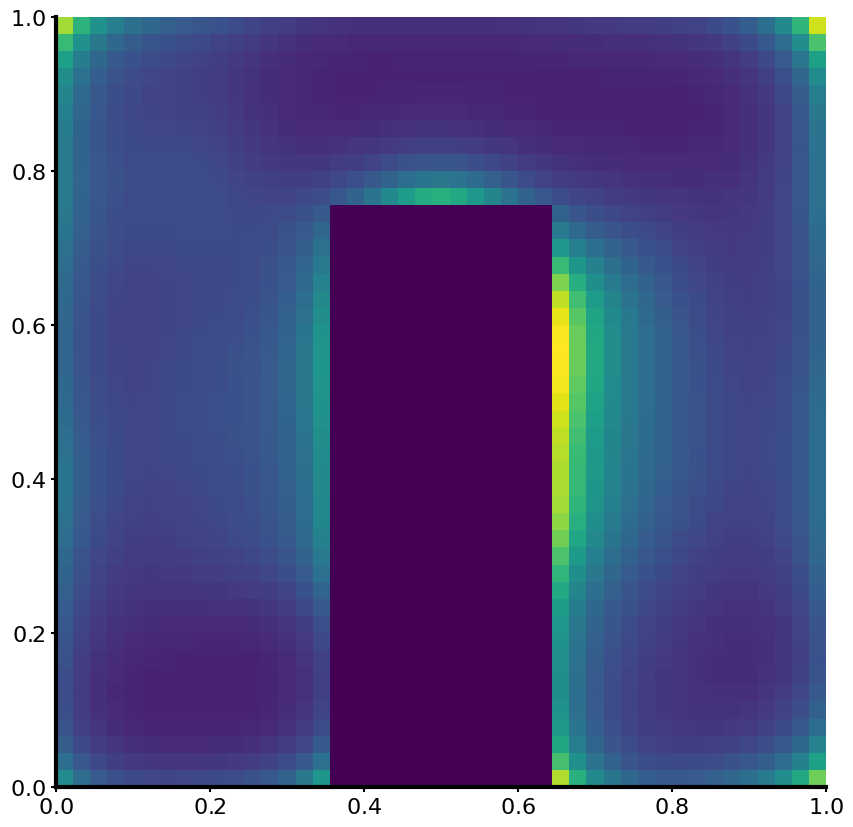

In [93]:
plt.imshow(Mouse_Results.bayesMatrices['occupation_inverse'], origin ='lower', extent = (0,1,0,1))

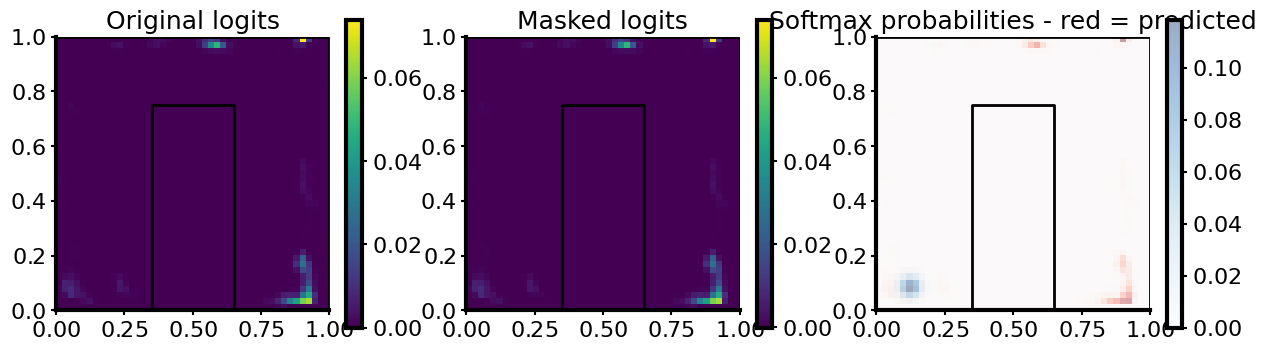

In [113]:
import dill as pickle
with open(os.path.join(Mouse_Results.bayes.folderResult, "108", "bayes_decoding_results_training.pkl"), "rb") as f:
    bayes_decoding_results = pickle.load(f)
# Assume logits_hw: [B,H,W], target_hw: [B,H,W], heatmap_layer instance exists
from neuroencoders.utils.global_classes import MAZE_COORDS
B, H, W = bayes_logits_hw.shape

# 1️⃣ Mask forbidden logits
allowed_mask = Mouse_Results.bayes.get_allowed_mask(use_tensorflow=False).astype(bool)
masked_logits = np.where(~allowed_mask, -1, bayes_logits_hw)

Mouse_Results.bayes.config.fullBehaviorBandwidth = Mouse_Results.DataHelper.fullBehavior["Bandwidth"]
target_proba = Mouse_Results.ann['108'].GaussianHeatmap.gaussian_heatmap_targets(bayes_truePos)

# 4️⃣ Plot one example
i = np.random.randint(0, B-1)  # first example in batch

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.title("Original logits")
plt.plot(MAZE_COORDS[:,0], MAZE_COORDS[:,1], 'k-', lw=2)
plt.imshow(bayes_logits_hw[i], origin='lower', extent = (0,1,0,1))
plt.colorbar()

plt.subplot(1,3,2)
plt.title("Masked logits")
plt.plot(MAZE_COORDS[:,0], MAZE_COORDS[:,1], 'k-', lw=2)
plt.imshow(masked_logits[i], origin='lower', vmin=-1e-5, extent= (0,1,0,1))
plt.colorbar()

plt.subplot(1,3,3)
plt.title("Softmax probabilities - red = predicted")
plt.plot(MAZE_COORDS[:,0], MAZE_COORDS[:,1], 'k-', lw=2)

plt.imshow(bayes_logits_hw[i], origin='lower', alpha = 0.6, cmap = "Reds", extent = (0,1,0,1))
plt.imshow(target_proba[i], origin='lower', alpha=0.4, cmap = "Blues", extent = (0,1,0,1))
plt.colorbar()

plt.show()

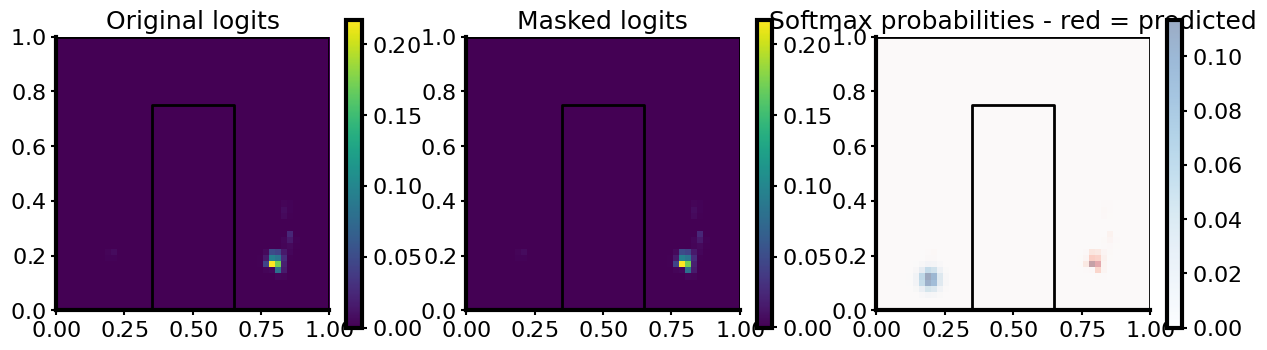

In [ ]:
import dill as pickle
with open(os.path.join(Mouse_Results.bayes.folderResult,"..","..", "smallSigma_GaussianHeatMap_LinearLoss_Transformer","results", "108", "bayes_decoding_results_pre.pkl"), "rb") as f:
    bayes_decoding_results = pickle.load(f)
# Assume logits_hw: [B,H,W], target_hw: [B,H,W], heatmap_layer instance exists
from neuroencoders.utils.global_classes import MAZE_COORDS
B, H, W = bayes_logits_hw.shape

# 1️⃣ Mask forbidden logits
allowed_mask = Mouse_Results.bayes.get_allowed_mask(use_tensorflow=False).astype(bool)
masked_logits = np.where(~allowed_mask, -1, bayes_logits_hw)

Mouse_Results.bayes.config.fullBehaviorBandwidth = Mouse_Results.DataHelper.fullBehavior["Bandwidth"]
target_proba = Mouse_Results.ann['252'].GaussianHeatmap.gaussian_heatmap_targets(bayes_truePos)

# 4️⃣ Plot one example
i = np.random.randint(0, B-1)  # first example in batch

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.title("Original logits")
plt.plot(MAZE_COORDS[:,0], MAZE_COORDS[:,1], 'k-', lw=2)
plt.imshow(bayes_logits_hw[i], origin='lower', extent = (0,1,0,1))
plt.colorbar()

plt.subplot(1,3,2)
plt.title("Masked logits")
plt.plot(MAZE_COORDS[:,0], MAZE_COORDS[:,1], 'k-', lw=2)
plt.imshow(masked_logits[i], origin='lower', vmin=-1e-5, extent= (0,1,0,1))
plt.colorbar()

plt.subplot(1,3,3)
plt.title("Softmax probabilities - red = predicted")
plt.plot(MAZE_COORDS[:,0], MAZE_COORDS[:,1], 'k-', lw=2)

plt.imshow(bayes_logits_hw[i], origin='lower', alpha = 0.6, cmap = "Reds", extent = (0,1,0,1))
plt.imshow(target_proba[i], origin='lower', alpha=0.4, cmap = "Blues", extent = (0,1,0,1))
plt.colorbar()

plt.show()

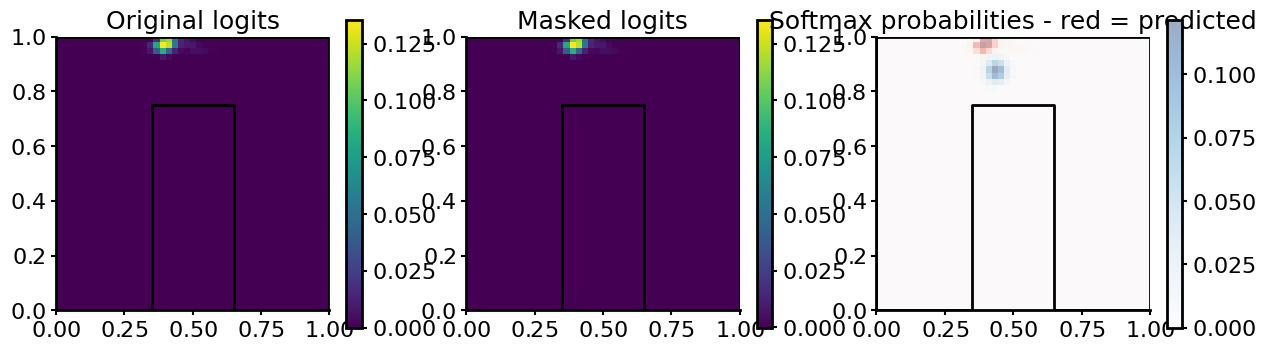

In [ ]:
# Assume logits_hw: [B,H,W], target_hw: [B,H,W], heatmap_layer instance exists
from neuroencoders.utils.global_classes import MAZE_COORDS
B, H, W = bayes_logits_hw.shape

# 1️⃣ Mask forbidden logits
allowed_mask = Mouse_Results.bayes.get_allowed_mask(use_tensorflow=False).astype(bool)
masked_logits = np.where(~allowed_mask, -1, bayes_logits_hw)

Mouse_Results.bayes.config.fullBehaviorBandwidth = Mouse_Results.DataHelper.fullBehavior["Bandwidth"]
target_proba = Mouse_Results.ann['108'].GaussianHeatmap.gaussian_heatmap_targets(bayes_truePos)

# 4️⃣ Plot one example
i = np.random.randint(0, B-1)  # first example in batch

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.title("Original logits")
plt.plot(MAZE_COORDS[:,0], MAZE_COORDS[:,1], 'k-', lw=2)
plt.imshow(bayes_logits_hw[i], origin='lower', extent = (0,1,0,1))
plt.colorbar()

plt.subplot(1,3,2)
plt.title("Masked logits")
plt.plot(MAZE_COORDS[:,0], MAZE_COORDS[:,1], 'k-', lw=2)
plt.imshow(masked_logits[i], origin='lower', vmin=-1e-5, extent= (0,1,0,1))
plt.colorbar()

plt.subplot(1,3,3)
plt.title("Softmax probabilities - red = predicted")
plt.plot(MAZE_COORDS[:,0], MAZE_COORDS[:,1], 'k-', lw=2)

plt.imshow(bayes_logits_hw[i], origin='lower', alpha = 0.6, cmap = "Reds", extent = (0,1,0,1))
plt.imshow(target_proba[i], origin='lower', alpha=0.4, cmap = "Blues", extent = (0,1,0,1))
plt.colorbar()

plt.show()

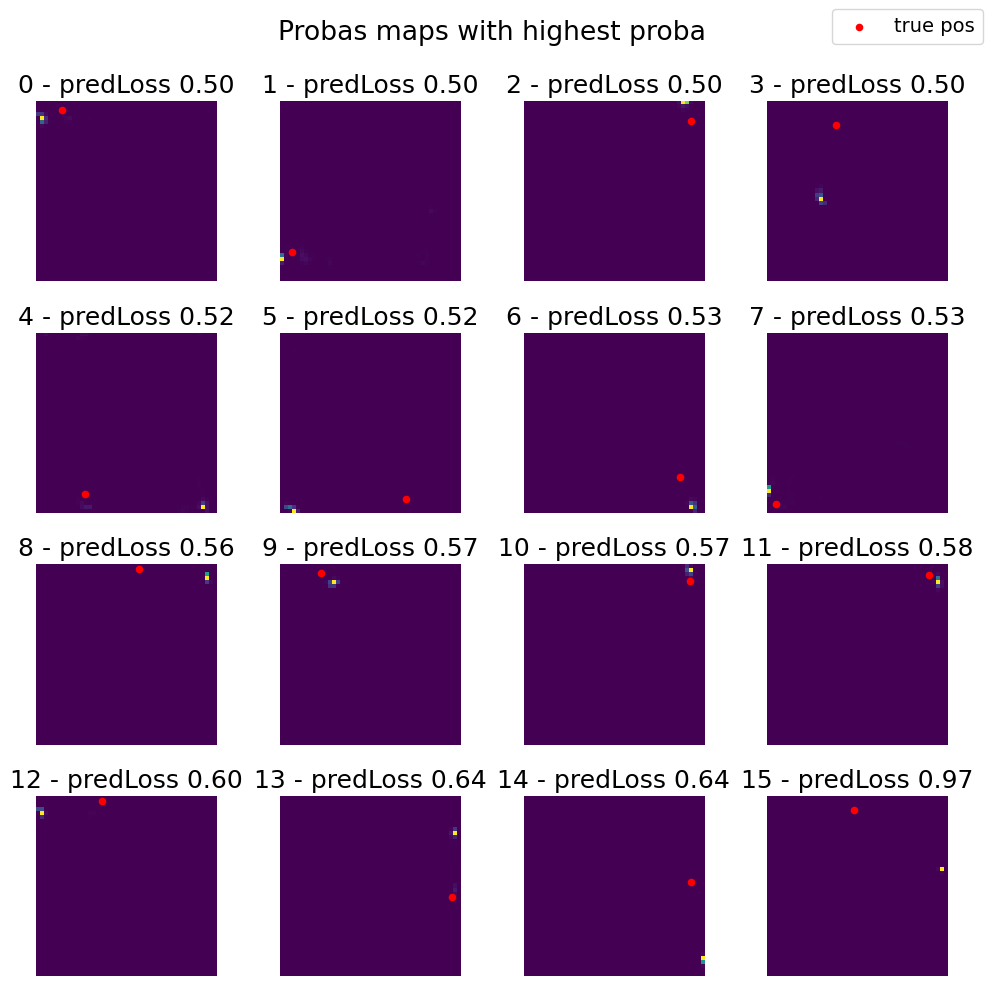

In [ ]:
predLoss = bayes_decoding_results["proba"].reshape(-1)

num_subplots = 16
# get 10 smallest predloss
predLoss_sorted_indices = np.argsort(predLoss)[-num_subplots:].flatten()
proba = bayes_decoding_results["probaMaps"]
# plot the first 16 imshow of logits_hw 
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(num_subplots):
    ax = axs[i // 4, i % 4]
    ax.imshow(proba[predLoss_sorted_indices[i], :, :], origin='lower', vmin=0, extent = (0,1,0,1), label = "scaled proba")
    ax.scatter(bayes_truePos[predLoss_sorted_indices[i],0], bayes_truePos[predLoss_sorted_indices[i],1], c='r', s=20, label = "true pos")
    ax.set_title(f'{i} - predLoss {predLoss[predLoss_sorted_indices[i]]:.2f}')
    ax.axis('off')
fig.suptitle("Probas maps with highest proba")
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

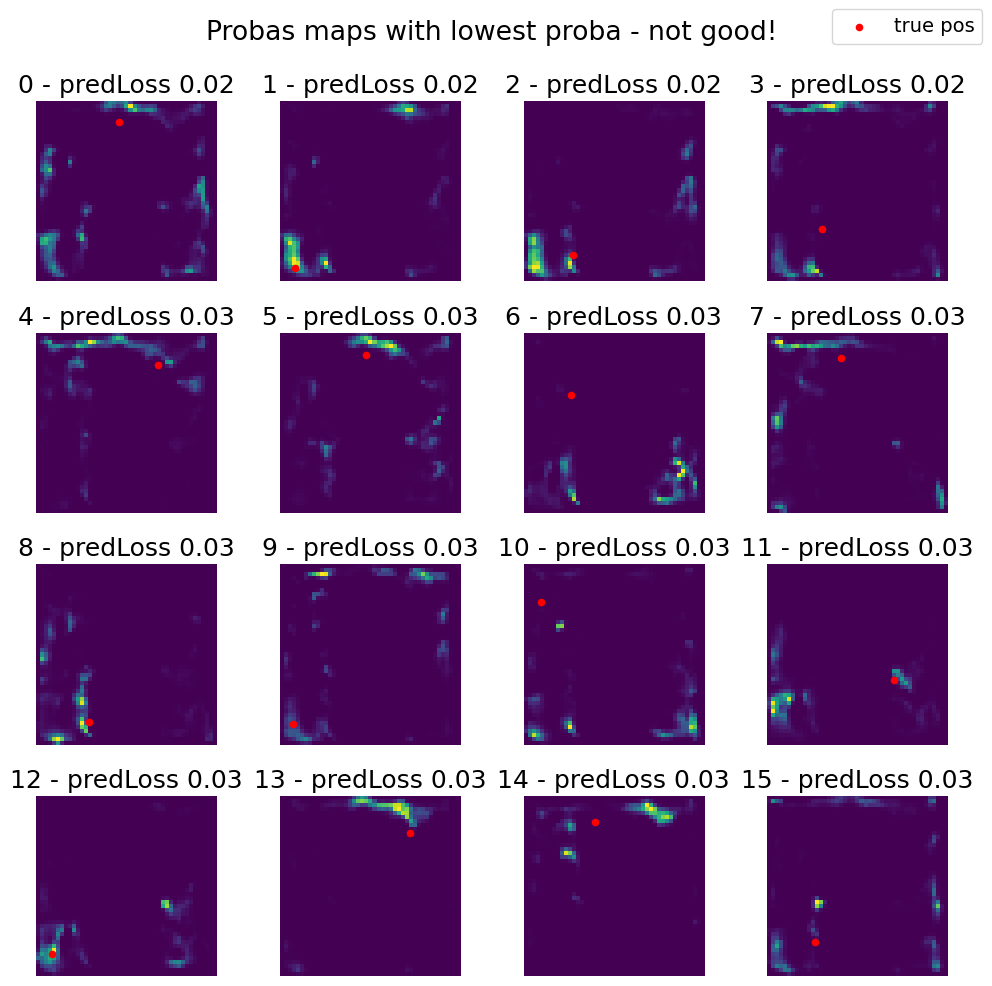

In [ ]:
predLoss = bayes_decoding_results["proba"].reshape(-1)

num_subplots = 16
# get 10 smallest predloss
predLoss_sorted_indices = np.argsort(predLoss)[:num_subplots].flatten()
proba = bayes_decoding_results["probaMaps"]
# plot the first 16 imshow of logits_hw 
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(num_subplots):
    ax = axs[i // 4, i % 4]
    ax.imshow(proba[predLoss_sorted_indices[i], :, :], origin='lower', vmin=0, extent = (0,1,0,1), label = "scaled proba")
    ax.scatter(bayes_truePos[predLoss_sorted_indices[i],0], bayes_truePos[predLoss_sorted_indices[i],1], c='r', s=20, label = "true pos")
    ax.set_title(f'{i} - predLoss {predLoss[predLoss_sorted_indices[i]]:.2f}')
    ax.axis('off')
fig.suptitle("Probas maps with lowest proba - not good!")
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

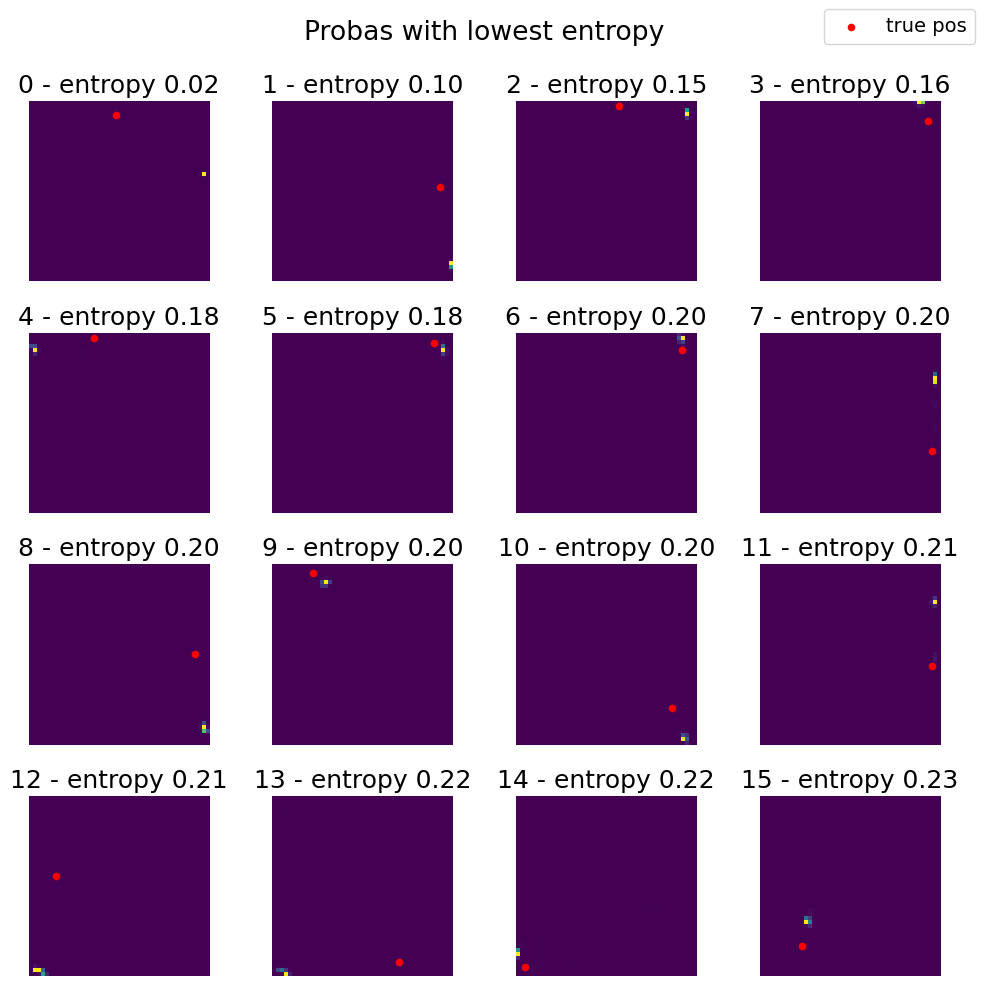

In [ ]:
num_subplots = 16
# get 10 smallest entropy
entropy_sorted_indices = np.argsort(bayes_entropy_hw)[:num_subplots] 

proba = bayes_decoding_results["probaMaps"]
# plot the first 16 imshow of logits_hw 
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(num_subplots):
    ax = axs[i // 4, i % 4]
    ax.imshow(proba[entropy_sorted_indices[i], :, :], origin='lower', vmin=0, extent = (0,1,0,1), label = "scaled proba")
    ax.scatter(bayes_truePos[entropy_sorted_indices[i],0], bayes_truePos[entropy_sorted_indices[i],1], c='r', s=20, label = "true pos")
    ax.set_title(f'{i} - entropy {bayes_entropy_hw[entropy_sorted_indices[i]]:.2f}')
    ax.axis('off')
fig.suptitle("Probas with lowest entropy")
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

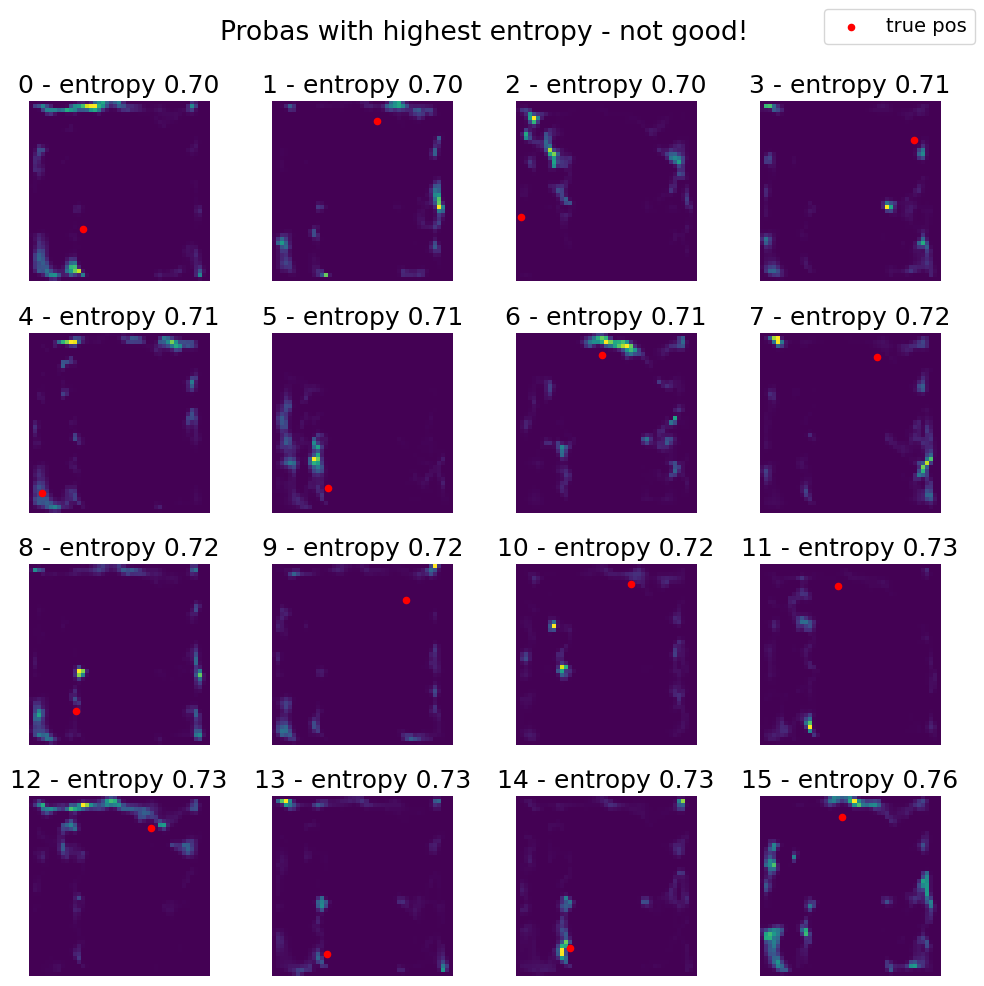

In [ ]:
num_subplots = 16
# get 10 smallest entropy
entropy_sorted_indices = np.argsort(bayes_entropy_hw)[-num_subplots:] 

proba = bayes_decoding_results["probaMaps"]
# plot the first 16 imshow of logits_hw 
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(num_subplots):
    ax = axs[i // 4, i % 4]
    ax.imshow(proba[entropy_sorted_indices[i], :, :], origin='lower', vmin=0, extent = (0,1,0,1), label = "scaled proba")
    ax.scatter(bayes_truePos[entropy_sorted_indices[i],0], bayes_truePos[entropy_sorted_indices[i],1], c='r', s=20, label = "true pos")
    ax.set_title(f'{i} - entropy {bayes_entropy_hw[entropy_sorted_indices[i]]:.2f}')
    ax.axis('off')
fig.suptitle("Probas with highest entropy - not good!")
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:

# Compute KL loss
batch_pos = bayes_decoding_results["featureTrue"]
kl_loss = Mouse_Results.ann['108'].GaussianHeatmap.safe_kl_heatmap_loss(bayes_logits_hw, target_proba)
print("KL loss for bayes:", kl_loss.numpy())

# Check that forbidden bins have zero probability
masked_logits = tf.where(Mouse_Results.ann['108'].GaussianHeatmap.forbid_mask_tf[None]>0, Mouse_Results.ann['108'].GaussianHeatmap.NEG, bayes_logits_hw)
probs = tf.nn.softmax(tf.reshape(masked_logits, [len(batch_pos),45*45]), axis=-1)
probs = tf.reshape(probs, [len(batch_pos),45,45])
probs *= (1.0 - Mouse_Results.ann['108'].GaussianHeatmap.forbid_mask_tf[None])
probs /= tf.reduce_sum(probs, axis=[1,2], keepdims=True)
print("Max probability in forbidden area (should be 0):",
tf.reduce_max(probs * Mouse_Results.ann['108'].GaussianHeatmap.forbid_mask_tf[None]).numpy())

KL loss for bayes: 4.312765
Max probability in forbidden area (should be 0): 0.0


In [ ]:
sample_idx = 1
probs = bayes_logits_hw[sample_idx]
print("Max prob:", probs.max())
topk = tf.math.top_k(probs, k=10)
print("Top 10 probs:", topk.values.numpy())


Max prob: 0.06736324601637747
Top 10 probs: [[3.80755287e-04 1.74567737e-04 1.01962851e-04 8.73037266e-06
  4.61508041e-06 3.36635969e-06 3.03583515e-06 2.22255586e-06
  1.06583864e-06 8.82463656e-07]
 [1.00494173e-02 6.07707762e-03 3.00216769e-03 2.10604358e-03
  9.03161818e-04 3.60141400e-04 3.21210626e-04 8.57077473e-05
  4.34330406e-06 3.77104288e-06]
 [2.57120185e-02 1.15960065e-02 7.63923157e-03 4.60053414e-03
  2.79812673e-03 2.64906236e-03 2.60696157e-03 1.23336277e-03
  1.00069281e-03 2.04248449e-04]
 [4.12005879e-02 1.54750734e-02 3.69477515e-03 2.52528133e-03
  2.50942966e-03 1.46437549e-03 7.88600811e-04 3.10551288e-04
  2.63591339e-04 2.34615512e-04]
 [2.05888202e-02 1.53662138e-02 9.63112950e-03 6.50018038e-03
  5.46234927e-03 3.48905997e-03 2.76225302e-03 1.32627396e-03
  1.52658771e-04 4.59042759e-05]
 [3.54071177e-02 1.66708430e-02 1.14979552e-02 1.06646389e-02
  3.97573914e-03 2.78085026e-03 2.67295985e-03 1.50721485e-03
  8.59163793e-04 1.52223955e-04]
 [5.37433855e-

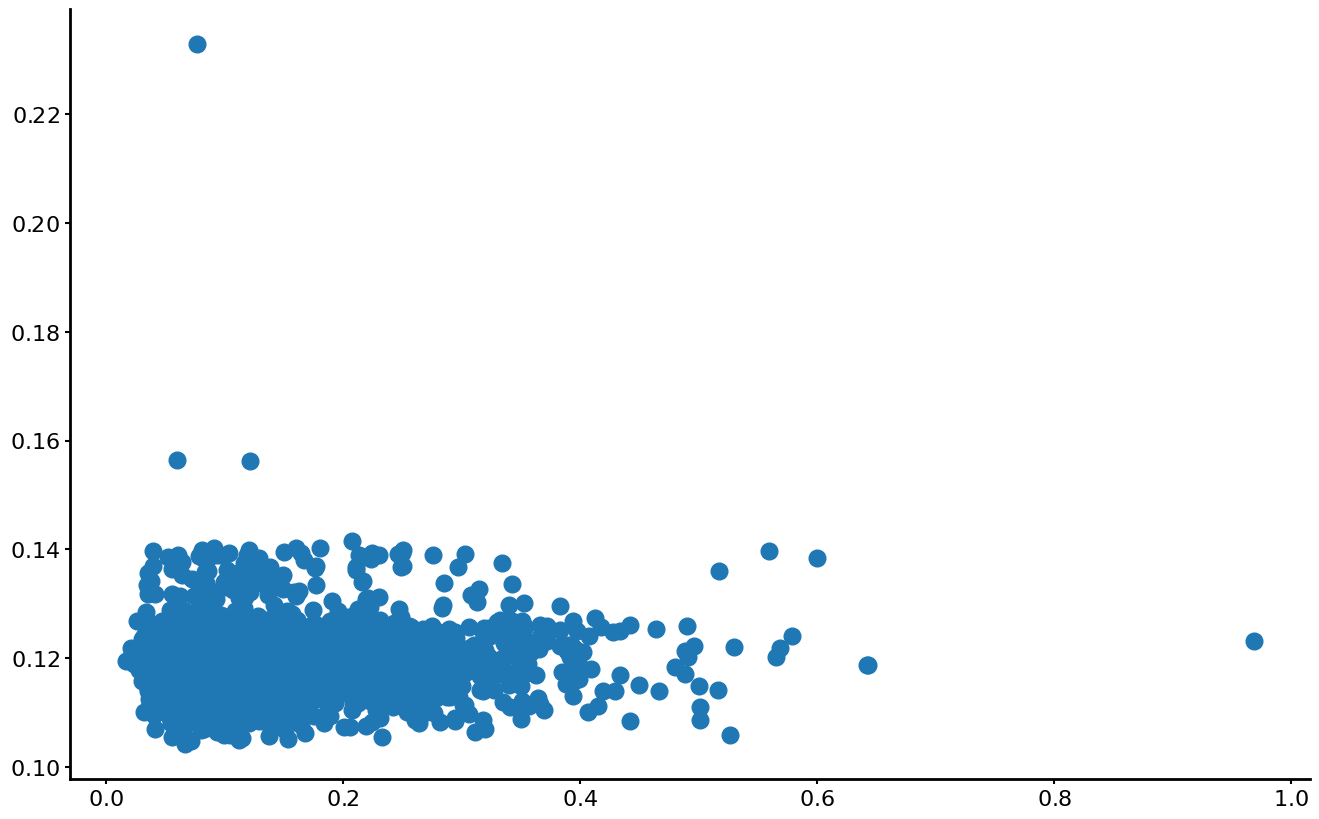

In [ ]:
max_proba = bayes_decoding_results["proba"]
target_proba_flat = target_proba.numpy().reshape(B, -1)
true_proba = target_proba_flat.max(axis = -1)
plt.scatter(max_proba.reshape(-1), true_proba.reshape(-1))

KL loss for bayes: 4.312765


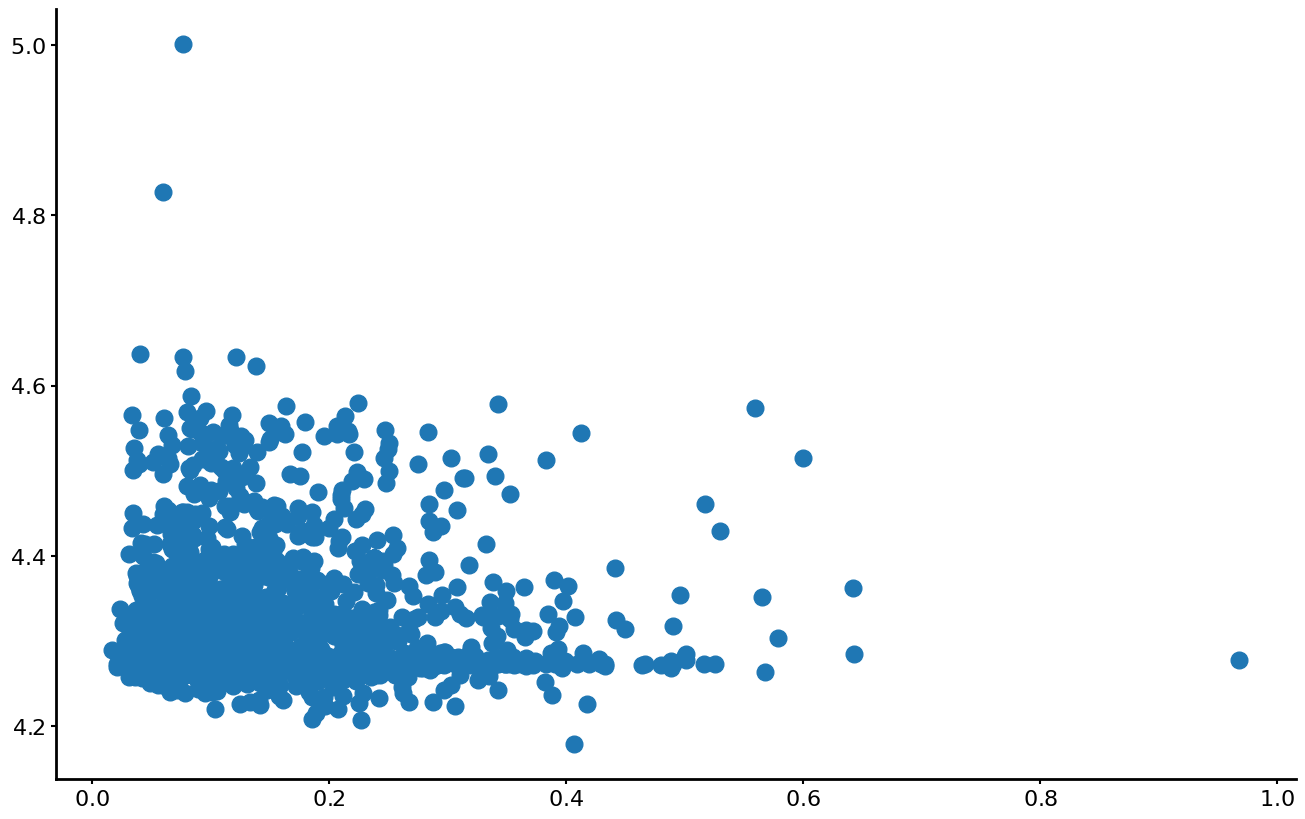

In [ ]:
# Compute KL loss
batch_pos = bayes_decoding_results["featureTrue"]
kl_loss = Mouse_Results.ann['108'].GaussianHeatmap.safe_kl_heatmap_loss(bayes_logits_hw, target_proba, return_batch = True)
print("KL loss for bayes:", kl_loss.numpy().mean())
plt.plot(bayes_decoding_results["proba"], kl_loss.numpy(), 'o')

### end of logits stuff

In [ ]:
Mouse_Results_Cond = mf.Mouse_Results(Dir, mouse_name=mouse, manipe=manipe, target=target, 
                                                        nameExp=nameExp, nEpochs=nEpochs, phase="cond", 
                                                        deviceName=deviceName, windows=windowSizeMS,
                                                        isTransformer = "LSTM" not in nameExp, denseweight= True, 
                                                        transform_w_log = True,
                                                        which = "both",
                                                        isPredLoss = False,
                                                        bayes_project_path = nameExp_Bayes,
                                                        )

Path for 1199 found: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG
Windows found for 1199: ['108', '252']
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/new_GaussianHeatMap_LinearLoss_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/new_GaussianHeatMap_LinearLoss_Dense_Transformer/results


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
Setting up GaussianHeatmapLayer...
UMazeProjectionLayer initialized with params: {'x_min': 0.0, 'x_max': 1.0, 'y_min': 0.0, 'y_max': 1.0, 'gap_x_min': 0.35, 'gap_x_max': 0.65, 'gap_y_min': 0.75}
Using Transformer architecture !
loading custom bayes project path from current_LogLoss_Transformer_Dense_Transformer
Reading saved cluster csv file


100%|██████████| 4/4 [00:10<00:00,  2.53s/it]


finished reading
Setting up GaussianHeatmapLayer...
UMazeProjectionLayer initialized with params: {'x_min': 0.0, 'x_max': 1.0, 'y_min': 0.0, 'y_max': 1.0, 'gap_x_min': 0.35, 'gap_x_max': 0.65, 'gap_y_min': 0.75}
Using Transformer architecture !
======================M1199=======================
Mouse_Results for 1199 (PAG)
Experiment: new_GaussianHeatMap_LinearLoss_Dense_Transformer
Target: pos
Phase: cond
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG
Windows: 108, 252


In [43]:
Mouse_Results.load_data(suffixes = ["_pre", "_cond", "_training"])

Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred


In [130]:
from neuroencoders.importData.epochs_management import inEpochs
from functools import reduce

trainMask = reduce(
    np.intersect1d, inEpochs(
    Mouse_Results.data_helper['252'].fullBehavior["positionTime"][:,0],
    Mouse_Results.data_helper['252'].fullBehavior["Times"]["trainEpochs"]
), np.where(Mouse_Results.data_helper['252'].fullBehavior["Times"]["speedFilter"]))


In [131]:
train_pos = Mouse_Results.data_helper['252'].fullBehavior["Positions"][trainMask]
train_pos = train_pos[~np.isnan(train_pos).any(axis=1)]  # remove NaNs

In [132]:
Mouse_Results.bayes.config.fullBehaviorBandwidth = Mouse_Results.data_helper['252'].fullBehavior["Bandwidth"]
Mouse_Results.bayes.config.bandwidth = None

In [135]:
# calculate firing rate from spikeMatTimes and spikeMatLabels (big time x nb_neurons matrix, with boolean infos (spike or no spike)) for each neuron 
trainMaskSpikes = inEpochs(
    Mouse_Results.bayes.spikeMatTimes.flatten(),
    Mouse_Results.data_helper['108'].fullBehavior["Times"]["trainEpochs"]
) 
time, fr, mean_fr = compute_firing_rate_across_time(Mouse_Results.bayes.spikeMatTimes[trainMaskSpikes].flatten(), Mouse_Results.bayes.spikeMatLabels[trainMaskSpikes])

In [60]:
fr.shape

(702383, 91)

In [56]:
fr.mean()

3.350389707458573

In [65]:
fr.std(axis=0).shape

(91,)

In [109]:
plt.plot(Mouse_Results.bayes.spikeMatLabels[trainMaskSpikes,75])
plt.plot(fr[:,75])

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7d1b6a61fe20>>
Traceback (most recent call last):
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


: 

In [104]:
np.where(zfr == zfr.max())

(array([216856, 216857, 216858, 216859, 216860, 216861, 216862, 216863,
        216864, 216865, 357640, 357641, 357642, 357643, 357644, 357645,
        357646, 357647, 357648, 357649, 700547, 700548, 700549, 700550,
        700551, 700552, 700553, 700554, 700555, 700556]),
 array([75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75]))

In [103]:
zfr.flatten()[19733971]

153.00904112613716

In [102]:
np.argmax(zfr.flatten())

19733971

In [95]:
plt.plot(range(zfr.shape[0]), zfr.flatten()[np.argmax(zfr, axis=1)])
plt.show()

In [89]:
for neuron_idx, i in enumerate(np.argmax(zfr, keepdims=True, axis=0)):
    plt.plot(fr[i, neuron_idx])


In [76]:
# plot firing rate across time, zscored for every neuron 
plt.figure(figsize=(12,6))
# zscore fr for every neuron
zfr = (fr - fr.mean(axis=0)) / fr.std(axis=0)
# clip zfr to -3 to 3
zimshow = plt.imshow(zfr.T, aspect='auto', extent=[time[0], time[-1], 0, zfr.shape[1]], origin='lower')
plt.colorbar(zimshow, label='Z-scored Firing Rate')
plt.ylabel('Neuron')
plt.xlabel('Time (s)')
plt.title('Firing Rate Across Time')
plt.show()

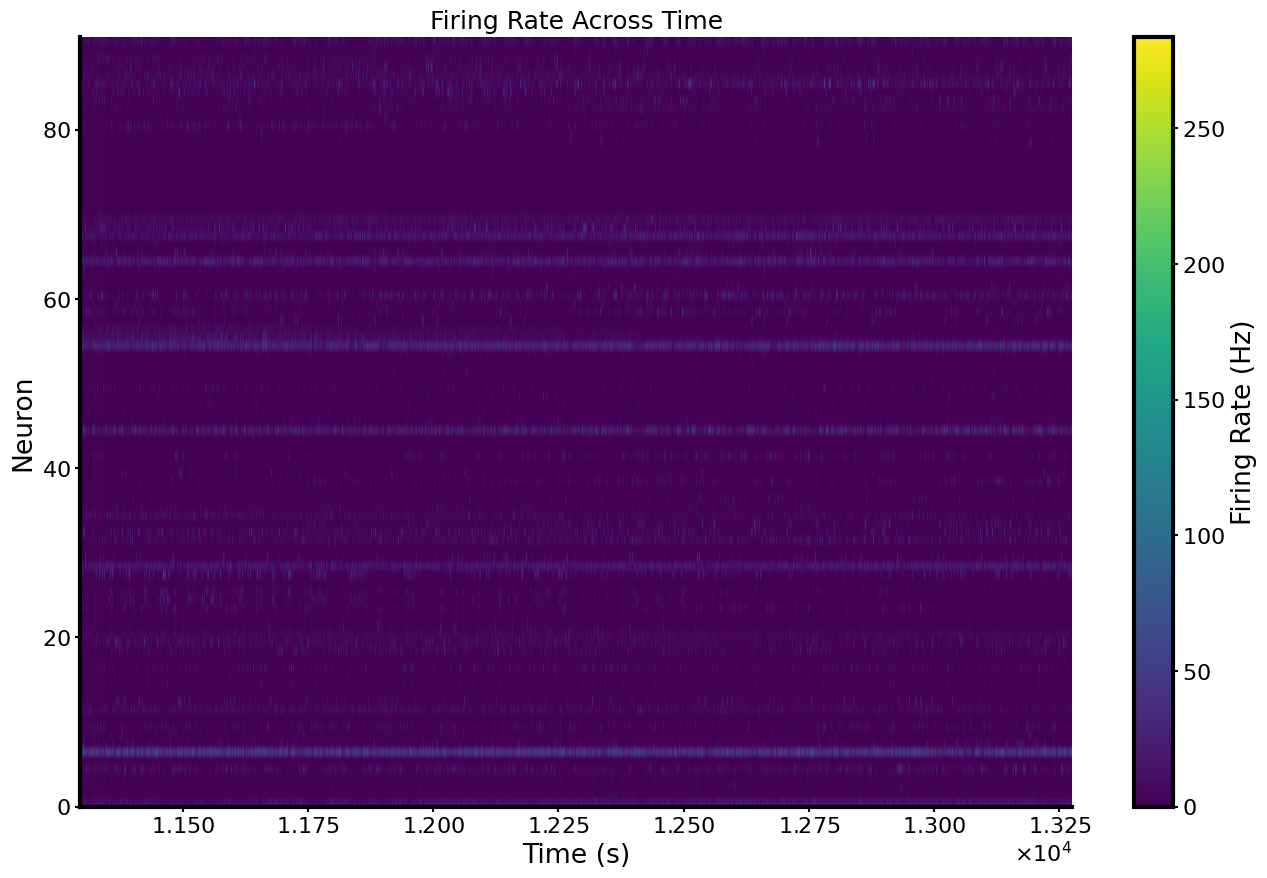

In [119]:
plt.imshow(fr.T, aspect='auto', extent=[time[0], time[-1], 0, fr.shape[1]], origin='lower')
plt.colorbar(label='Firing Rate (Hz)')
plt.ylabel('Neuron')
plt.xlabel('Time (s)')
plt.title('Firing Rate Across Time')
plt.show()

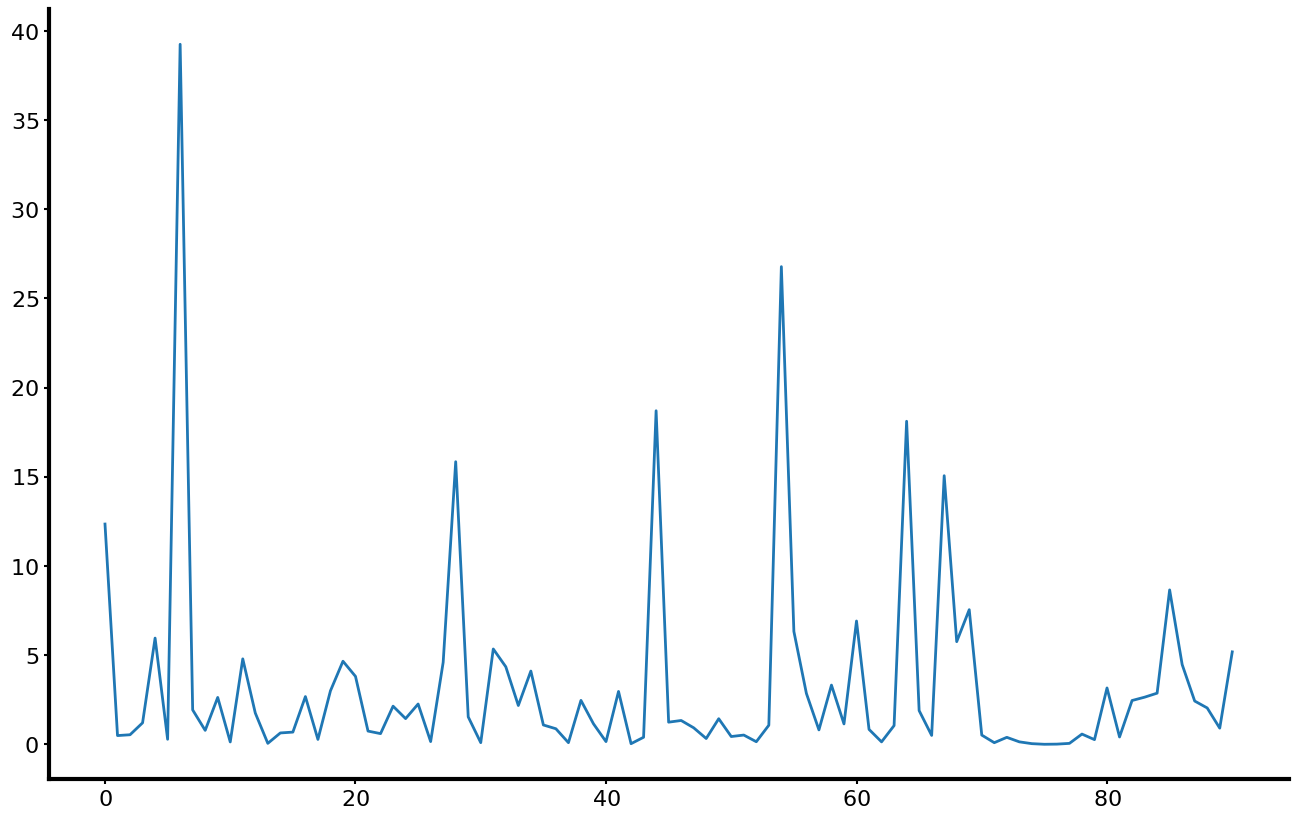

In [108]:
plt.plot(fr)

In [95]:
Mouse_Results.bayes.spikeMatLabels[trainMask].sum()

603691.0

In [102]:
np.mean(np.diff(Mouse_Results.bayes.spikeMatTimes[trainMask].flatten()))

0.0028190223821204998

In [88]:
trainMask.shape

(7261245,)

In [87]:
trainMask.sum()

702392

In [24]:
from neuroencoders.importData.epochs_management import inEpochsMask
trainMask = inEpochsMask(
    Mouse_Results.bayes.spikeMatTimes.flatten(),
    Mouse_Results.data_helper['252'].fullBehavior["Times"]["trainEpochs"]
)


In [1]:
# test the build occupation map function
Mouse_Results.bayes.config.kernel = "gaussian"
Mouse_Results.bayes.config.masking_factor = 10
Mouse_Results.bayes.config.sigma = 0.5
Mouse_Results.bayes.config.regularization_factor = 1e-10


occ_inv,occ, _ = Mouse_Results.bayes._build_occupation_map(train_pos[:,:2], flat_prior = True)
fig, ax = plt.subplots(1,3)
im = ax[0].imshow(occ, origin='lower', extent=(0,1,0,1))
fig.colorbar(im, ax=ax[0])
ax[0].set_title("Occupation map")
im2 = ax[1].imshow(occ_inv, origin='lower', extent=(0,1,0,1))
fig.colorbar(im2, ax=ax[1])
ax[1].set_title("Inverse Occupation map")
occ[occ==0] = np.min(occ[occ!=0])  # We want to avoid having zeros
mask = occ > (np.max(occ)/20) # Trick to highlight the differences in occupation map
occupationInverse = 1/occ
occupationInverse[occupationInverse==np.inf] = 0
occupationInverse = np.multiply(occupationInverse, mask)
finalOccupation = occupationInverse
im3 = ax[2].imshow(finalOccupation, origin='lower', extent=(0,1,0,1))
fig.colorbar(im3, ax=ax[2])
ax[2].set_title("Final Occupation map")
plt.show()

NameError: name 'Mouse_Results' is not defined

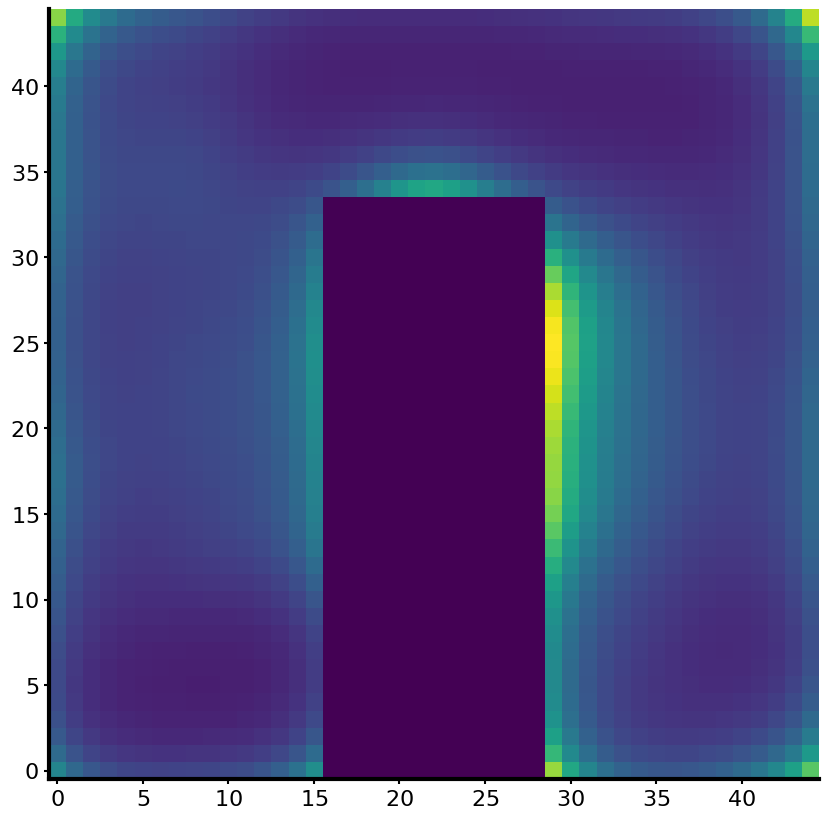

In [94]:
allowed_mask = Mouse_Results.bayes.get_allowed_mask(use_tensorflow=False).astype(bool)
occ[~allowed_mask] = 0 
occ = occ/occ.sum()
invOcc = 1/(occ + 1e-10)
invOcc[~allowed_mask] = 0
invOcc = invOcc/invOcc.sum()
plt.imshow(invOcc, origin="lower")

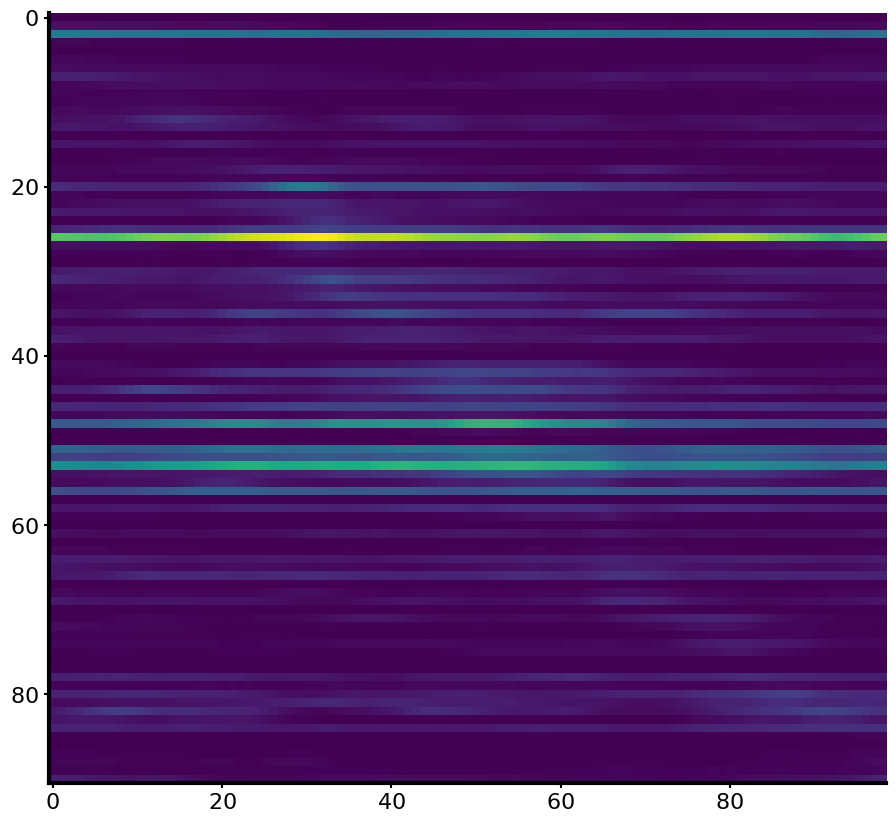

In [24]:
plt.imshow(Mouse_Results.bayes_matrices["orderedLinearPlaceFields"])

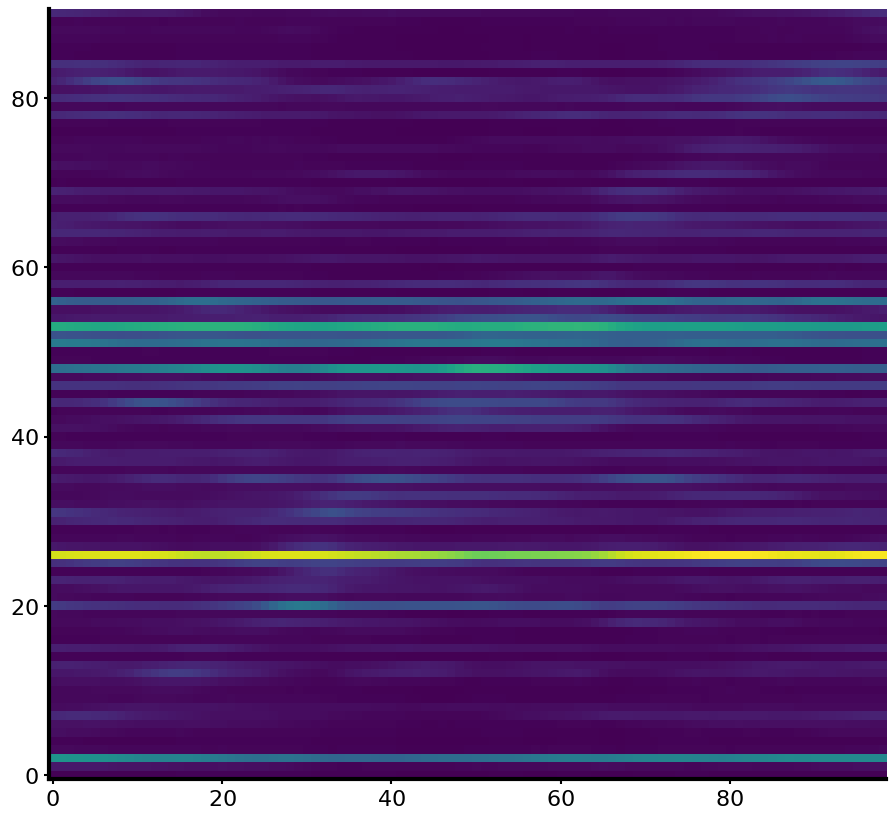

In [23]:
# z-score ordered place fields
ordered_linear_scored = (Mouse_Results.bayes_matrices["orderedLinearPlaceFields"] - Mouse_Results.bayes_matrices["orderedLinearPlaceFields"].mean(axis=0)) / Mouse_Results.bayes_matrices["orderedLinearPlaceFields"].std(axis=0)

plt.imshow(ordered_linear_scored, origin = "lower")

In [ ]:
Mouse_Results.load_bayes(suffixes = ["_pre", "_training"])

2025-09-04 13:57:08,559 - INFO - Starting Bayesian decoding with 108ms windows



                        Trouble finding bayesian results in folder, will test now because:
                        
                            Bayesian and NN results do not have the same shape for
                            108 ms window. 
                            Found shapes (22144, 2) and (22016, 2).
                            
                        
Using training data for training phase!


2025-09-04 13:57:08,787 - INFO - Running parallel PyKeOps Bayesian decoding...
2025-09-04 13:57:19,137 - INFO - Finished bayesien guess, will now process and clean.


Saving results in /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/new_GaussianHeatMap_LinearLoss_Dense_Transformer/results/108.


2025-09-04 13:57:21,206 - INFO - === Decoding Summary ===
2025-09-04 13:57:21,207 - INFO - Window size: 108ms
2025-09-04 13:57:21,207 - INFO - Time steps: 22016
2025-09-04 13:57:21,207 - INFO - Number of NaN predictions skipped: 12
2025-09-04 13:57:21,207 - INFO - Mean error: 0.45 units
2025-09-04 13:57:21,208 - INFO - Median error: 0.44 units
2025-09-04 13:57:21,208 - INFO - RMSE: 0.50 units
2025-09-04 13:57:21,208 - INFO - Mean confidence: 0.332
2025-09-04 13:57:21,209 - INFO - ========================
2025-09-04 13:57:21,229 - INFO - Starting Bayesian decoding with 252ms windows



                        Trouble finding bayesian results in folder, will test now because:
                        
                            Bayesian and NN results do not have the same shape for
                            252 ms window. 
                            Found shapes (22016, 2) and (9856, 2).
                            
                        
Using training data for training phase!


2025-09-04 13:57:21,466 - INFO - Running parallel PyKeOps Bayesian decoding...
2025-09-04 13:57:26,741 - INFO - Finished bayesien guess, will now process and clean.


Saving results in /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/new_GaussianHeatMap_LinearLoss_Dense_Transformer/results/252.


2025-09-04 13:57:27,848 - INFO - === Decoding Summary ===
2025-09-04 13:57:27,849 - INFO - Window size: 252ms
2025-09-04 13:57:27,849 - INFO - Time steps: 9856
2025-09-04 13:57:27,850 - INFO - Number of NaN predictions skipped: 5
2025-09-04 13:57:27,850 - INFO - Mean error: 0.45 units
2025-09-04 13:57:27,850 - INFO - Median error: 0.45 units
2025-09-04 13:57:27,850 - INFO - RMSE: 0.50 units
2025-09-04 13:57:27,851 - INFO - Mean confidence: 0.637
2025-09-04 13:57:27,851 - INFO - ========================


In [ ]:
Mouse_Results_Cond.load_data(suffixes = ["_cond"])
Mouse_Results_Cond.load_bayes(suffixes = ["_cond"], useTrain = True)

In [ ]:
Mouse_Results.load_bayes(suffixes = ["_pre", "_training", "_cond"])

In [ ]:
plt.imshow(Mouse_Results.bayesMatrices["occupation"].T, origin="lower")

In [ ]:
np.mean(np.linalg.norm(Mouse_Results.resultsBayes_phase["_cond"]["fullPred"][-1] - Mouse_Results.resultsNN_phase["_cond"]["truePos"][-1], axis=1))

In [ ]:
Mouse_Results.resultsNN_phase["_cond"]["speedMask"][1].shape

In [ ]:
Mouse_Results.resultsBayes_phase["_cond"].keys()

In [ ]:
%matplotlib qt

In [ ]:
plt.plot(Mouse_Results.resultsBayes_phase["_training"]["predLoss"][-1].flatten())

In [ ]:
Mouse_Results.resultsNN_phase["_cond"]["predLoss"][-1]

In [ ]:
Mouse_Results.resultsNN_phase["_training"]["fullPred"][-1].shape

In [ ]:
Mouse_Results.resultsBayes_phase["_training"]["fullPred"][-1].shape

In [ ]:
Mouse_Results.compare_nn_bayes_with_random_pred(108, phase = "cond")

In [ ]:
Mouse_Results.fft_pc(decoding = "ann")

### play with bayesian trainer

In [ ]:
Mouse_Results.bayes.orderedLinearPlaceFields.shape

In [ ]:
Mouse_Results.bayesMatrices["rateFunctions"][0][1].shape

In [ ]:
Mouse_Results.bayesian_neurons_summary()

In [ ]:
Mouse_Results.predLoss_euclError(scaled=True)

In [ ]:
Mouse_Results.predLoss_vs_trueLoss(typeDec = "bayes")

In [ ]:
Mouse_Results.correlate_predLoss_and_bayesProba(phase = "cond")

In [ ]:
Mouse_Results.compare_nn_bayes_with_random_pred(252)

In [ ]:
Mouse_Results.predLoss_linError(typeDec="ann", phase = "training", speed = "fast", scaled = False)

In [ ]:
Mouse_Results.fig_example_linear_filtered(phase = "training")

In [ ]:
Mouse_Results.run_spike_alignment()

In [ ]:
Mouse_Results.plot_pc_tuning_curve_and_predictions(phase = "pre", ws = 252, block = False, show = False)

In [ ]:
Mouse_Results.predLoss_euclError(typeDec="ann", phase = "training", speed = "fast")

## looking at videos

In [10]:
Mouse_Results.load_data(suffixes = ["_training", "_cond", "_pre", "_post"])

Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred
Adding entropy as lossPred


### looking at pre

In [42]:
prediction_time = Mouse_Results.resultsNN_phase["_pre"]["time"][1]
predicted = Mouse_Results.resultsNN_phase["_pre"]["fullPred"][1]
positions_from_NN = Mouse_Results.resultsNN_phase["_pre"]["truePos"][1]
posIndex = Mouse_Results.resultsNN_phase["_pre"]["posIndex"][1]
linearized_pred = Mouse_Results.resultsNN_phase["_pre"]["linPred"][1]
linearized_true = Mouse_Results.l_function(Mouse_Results.data_helper['252'].fullBehavior["Positions"][:,:2])[1]

In [43]:
positions = Mouse_Results.data_helper['252'].fullBehavior["Positions"]

In [44]:
speed_mask = Mouse_Results.resultsNN_phase["_pre"]["speedMask"][1]

In [45]:
time = Mouse_Results.data_helper['252'].fullBehavior["positionTime"]

In [46]:
direction = Mouse_Results.data_helper['252']._get_traveling_direction(linearized_true)

In [47]:
import neuroencoders.importData.epochs_management as ep
epochMask = ep.inEpochsMask(
    time,
    Mouse_Results.data_helper['252'].fullBehavior["Times"]["testEpochs"],
).flatten()

In [48]:
otherMask = (time >= prediction_time[0]) & (time <= prediction_time[-1])
otherMask = otherMask.flatten()

In [49]:
winms = "252"
suffix = "_pre"
idx = 1
phase = "pre"

In [50]:
predicted_logits = Mouse_Results.resultsNN_phase_pkl["_pre"][1]["logits_hw"]
predicted_probs = Mouse_Results.ann['252'].GaussianHeatmap.decode_and_uncertainty(predicted_logits, return_probs=True)[-1].numpy()

In [51]:
np.nanmax(predicted_probs)

0.12661587

In [52]:
Mouse_Results.resultsNN_phase_pkl["_pre"][1].keys()

dict_keys(['featurePred', 'featureTrue', 'times', 'posLoss', 'posIndex', 'speedMask', 'indexInDat', 'projPred', 'projTruePos', 'linearPred', 'linearTrue', 'logits_hw', 'var_total', 'Hn', 'maxp', 'T_scaling'])

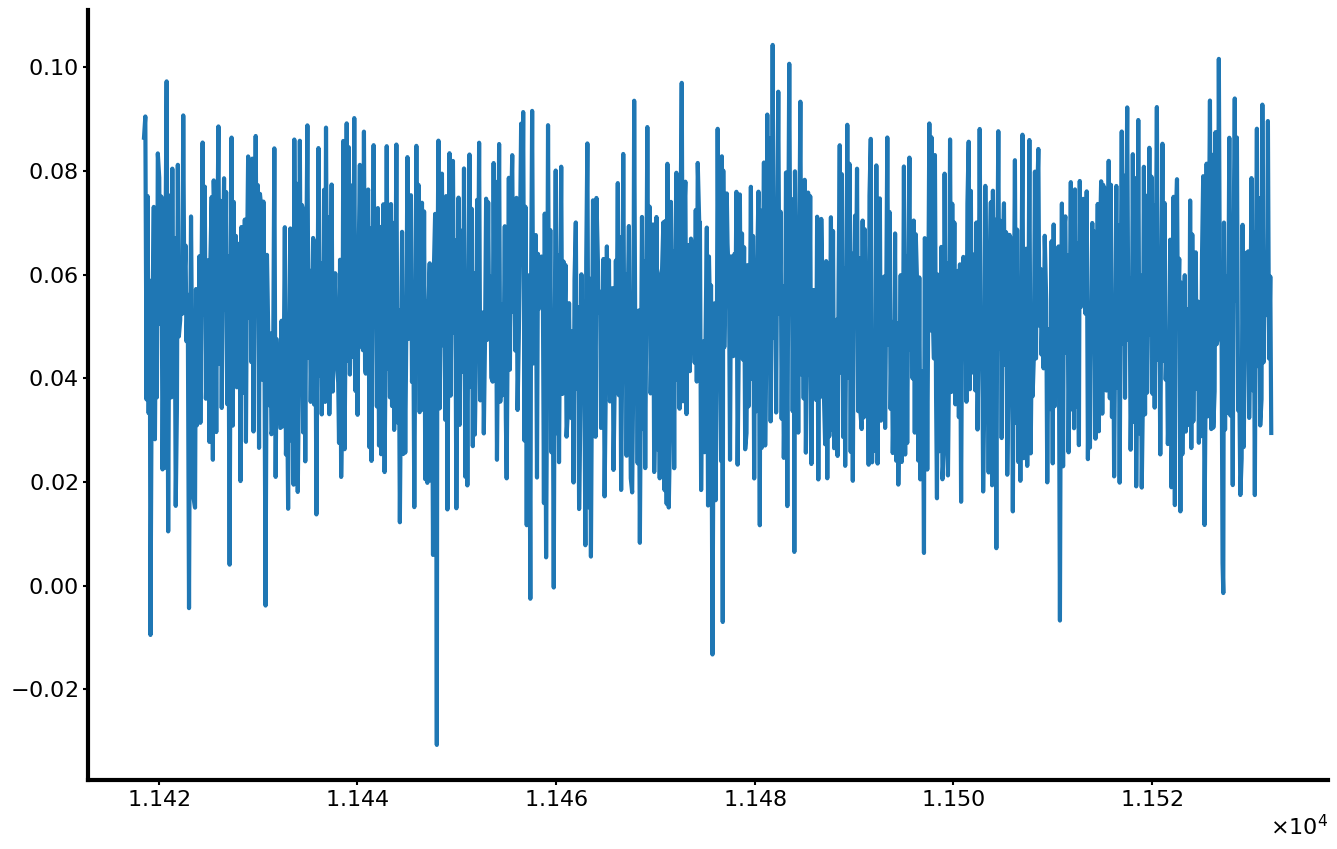

In [53]:
plt.plot(prediction_time.flatten(), time[posIndex].flatten() - prediction_time.flatten())
plt.show()

In [54]:
%matplotlib qt

In [55]:
Mouse_Results.target

'PosAndHeadDirectionAndThigmo'

In [56]:
Mouse_Results.data_helper['108'].fullBehavior["Times"]["PosMat"]

array([[6.89580314e-02, 3.02150292e+01, 2.11763615e+01, 0.00000000e+00],
       [1.37916063e-01, 3.02150292e+01, 2.11763615e+01, 0.00000000e+00],
       [2.06874094e-01, 3.02150292e+01, 2.11763615e+01, 0.00000000e+00],
       ...,
       [2.78811755e+04, 2.60760905e+01, 6.00364064e+01, 0.00000000e+00],
       [2.78812458e+04, 2.60076982e+01, 6.00133100e+01, 0.00000000e+00],
       [2.78813160e+04, 2.60933461e+01, 6.01034471e+01, 0.00000000e+00]])

In [57]:
Mouse_Results.show_movie(phase = "cond", winMS = 108, trail_length = 25)

Applying deduplication and merging to predLossMask.


/home/theodechrn/Documents/Cours/phd/neuroEncoders/neuroencoders/importData/epochs_management.py:287: UserWarning: Tolerance is set to True, will compare against apparent sampling rate.
  warn(
/home/theodechrn/Documents/Cours/phd/neuroEncoders/neuroencoders/importData/epochs_management.py:294: UserWarning: No value in the array is within the tolerance of 0.07303677219822417 for the value 13759.570000000002: found 13760.674911508346 which gives a difference of 1.1049115083442302.
  warn(
/home/theodechrn/Documents/Cours/phd/neuroEncoders/neuroencoders/importData/epochs_management.py:294: UserWarning: No value in the array is within the tolerance of 0.07303677219822417 for the value 14723.490000000002: found 14723.184000000001 which gives a difference of 0.30600000000049477.
  warn(
/home/theodechrn/Documents/Cours/phd/neuroEncoders/neuroencoders/importData/gui_elements.py:714: UserWarning: Predicted positions do not contain head direction or speed. Computing them from positions.
  warn

Setting up multipanel plot (trajectory, forward/reverse, and linear position movie)...
Binary direction data detected (0s and 1s) for top left.
0 (shock zone) -> xkcd:hot pink
1 (safe zone) -> cornflowerblue


In [58]:
import dill as pickle
with open(os.path.join(Mouse_Results.folderResult, "results_df.pkl"), "rb") as f:
    Mouse_Results.results_df = pickle.load(f)

In [59]:
Mouse_Results.convert_to_df(redo = False)

Results DataFrame already exists. Use redo=True to recreate it.


nameExp mouse manipe     phase  \
0   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG       pre   
1   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG       pre   
2   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG       pre   
3   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG      cond   
4   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG      cond   
5   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG      cond   
6   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG      post   
7   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG      post   
8   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG      post   
9   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG  training   
10  new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG  training   
11  new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG  training   

    winMS  asymmetry_index                           fullTruePos_fromBehavior  \
0      36          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
1     108          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
2     252          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
3      36          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
4     108          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
5     252          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
6      36          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
7     108          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
8     252          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
9      36          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
10    108          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
11    252          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   

                          alignedTruePos_fromBehavior  \
0   [[0.7752240933173771, 0.8989344689396128, -0.0...   
1   [[0.7752240933173771, 0.8989344689396128, -0.0...   
2   [[0.7752240933173771, 0.8989344689396128, -0.0...   
3   [[0.5712390376082054, 0.9032841729104533, 0.18...   
4   [[0.5712390376082054, 0.9032841729104533, 0.18...   
5   [[0.5712390376082054, 0.9032841729104533, 0.18...   
6   [[0.6363580917165176, 0.861347395436116, -3.01...   
7   [[0.6371728213658276, 0.8605209731133083, 2.78...   
8   [[0.6363580917165176, 0.861347395436116, -3.01...   
9   [[0.2380991101561953, 0.8049437338425552, -2.8...   
10  [[0.22347367133862373, 0.800746161144787, -3.0...   
11  [[0.18725677468503407, 0.8041594979880731, -3....   

                         fullTrueLinPos_from_behavior  \
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
5   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
6   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
7   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
8   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
9   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
10  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
11  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                      alignedTrueLinPos_from_behavior  ...  \
0   [0.6660794070654164, 0.6660794070654164, 0.666...  ...   
1   [0.6660794070654164, 0.6792254554212926, 0.679...  ...   
2   [0.6660794070654164, 0.6792254554212926, 0.666...  ...   
3   [0.5493814787618814, 0.5493814787618814, 0.549...  ...   
4   [0.5493814787618814, 0.5493814787618814, 0.549...  ...   
5   [0.5493814787618814, 0.5493814787618814, 0.549...  ...   
6   [0.5883508416650484, 0.5883508416650484, 0.588...  ...   
7   [0.588350841665

In [60]:
from pathlib import Path
folder_toSave = os.path.join(Path.home(),"Dropbox/Mobs_member/Theotime_De_Charrin/Figures/figures_draft/")

In [64]:
Mouse_Results.plot_boxplot_error(Mouse_Results.results_df, speed = "all", logscale = False, confidence = False, threshold = 0.6)
Mouse_Results.lin_boxplot_error(Mouse_Results.results_df, speed = "all", logscale = False, confidence = False, threshold = 0.6)


nameExp mouse manipe     phase  \
0   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG       pre   
1   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG       pre   
2   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG       pre   
3   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG      cond   
4   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG      cond   
5   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG      cond   
6   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG      post   
7   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG      post   
8   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG      post   
9   new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG  training   
10  new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG  training   
11  new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG  training   

    winMS  asymmetry_index                           fullTruePos_fromBehavior  \
0      36          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
1     108          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
2     252          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
3      36          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
4     108          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
5     252          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
6      36          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
7     108          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
8     252          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
9      36          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
10    108          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   
11    252          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   

                          alignedTruePos_fromBehavior  \
0   [[0.7752240933173771, 0.8989344689396128, -0.0...   
1   [[0.7752240933173771, 0.8989344689396128, -0.0...   
2   [[0.7752240933173771, 0.8989344689396128, -0.0...   
3   [[0.5712390376082054, 0.9032841729104533, 0.18...   
4   [[0.5712390376082054, 0.9032841729104533, 0.18...   
5   [[0.5712390376082054, 0.9032841729104533, 0.18...   
6   [[0.6363580917165176, 0.861347395436116, -3.01...   
7   [[0.6371728213658276, 0.8605209731133083, 2.78...   
8   [[0.6363580917165176, 0.861347395436116, -3.01...   
9   [[0.2380991101561953, 0.8049437338425552, -2.8...   
10  [[0.22347367133862373, 0.800746161144787, -3.0...   
11  [[0.18725677468503407, 0.8041594979880731, -3....   

                         fullTrueLinPos_from_behavior  \
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
5   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
6   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
7   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
8   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
9   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
10  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
11  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                      alignedTrueLinPos_from_behavior  ...  \
0   [0.6660794070654164, 0.6660794070654164, 0.666...  ...   
1   [0.6660794070654164, 0.6792254554212926, 0.679...  ...   
2   [0.6660794070654164, 0.6792254554212926, 0.666...  ...   
3   [0.5493814787618814, 0.5493814787618814, 0.549...  ...   
4   [0.5493814787618814, 0.5493814787618814, 0.549...  ...   
5   [0.5493814787618814, 0.5493814787618814, 0.549...  ...   
6   [0.5883508416650484, 0.5883508416650484, 0.588...  ...   
7   [0.588350841665

In [65]:
schon_df = Mouse_Results.results_df.explode(column = ["truePos", "fullPred", "posIndex_NN", "fast_filtered_se_error", 
                                                      "slow_filtered_se_error", "all_se_error", "alignedSpeed",
                                                      "lin_fast_filtered_se_error", "lin_slow_filtered_se_error", "lin_all_se_error"])

In [66]:
thresh = 1.3
np.array(schon_df.loc[schon_df.fast_filtered_se_error > thresh, "truePos"].to_list()).shape

(10, 4)

In [109]:
spikes_count = pd.read_csv(os.path.join(Mouse_Results.folderResult, "108", "spikes_count_pre.csv"))

In [110]:
spikes_count

group0_spikes_count  group1_spikes_count  group2_spikes_count  \
0                      18                   16                   28   
1                      17                   16                   22   
2                      16                   14                   21   
3                      12                    9                   21   
4                      16                   13                   23   
...                   ...                  ...                  ...   
1107                   14                   16                   16   
1108                    9                   10                   12   
1109                   11                   10                   18   
1110                   10                    9                   16   
1111                    4                    6                    1   

      group3_spikes_count  total_spikes_count  posIndex  \
0                       8                  70    165487   
1                       9                  64    165489   
2                      11                  62    165490   
3                      11                  53    165492   
4                      17                  69    165493   
...                   ...                 ...       ...   
1107                    4                  50    167254   
1108                    7                  38    167256   
1109                   13                  52    167257   
1110                    9                  44    167259   
1111                    3                  14    167260   

                                             indexInDat  
0     [228369326 228369339 228369461 228369464 22836...  
1     [228371990 228371991 228371994 228371998 22837...  
2     [228374180 228374273 228374313 228374403 22837...  
3     [228376361 228376379 228376421 228376425 22837...  
4     [228378568 228378568 228378597 228378613 22837...  
...                                                 ...  
1107  [230823399 230823766 230823787 230823800 23082...  
1108  [230825569 230825688 230825765 230825815 23082...  
1109  [230827744 230827811 230827885 230827913 23082...  
1110  [230830086 230830157 230830176 230830201 23083...  
1111  [230832055 230832833 230832855 230833040 23083...  

[1112 rows x 7 columns]

In [210]:
nain = Mouse_Results.results_df.loc[(Mouse_Results.results_df['phase'] == 'pre') & (Mouse_Results.results_df['winMS'] == 108)].copy()

In [211]:
for g in range(Mouse_Results.Params.nGroups):
    nain[f"group{g}_spikes_count"] = nain.apply(
        lambda row: np.array(spikes_count[f"group{g}_spikes_count"][np.isin(spikes_count["posIndex"], row["posIndex_NN"])]).flatten(), axis=1
    )
nain["total_spikes_count"] = nain.apply(lambda row: np.array(spikes_count[f"total_spikes_count"][np.isin(spikes_count["posIndex"], row["posIndex_NN"])]).flatten(), axis=1)

In [212]:
import seaborn as sns
import numpy.polynomial.polynomial as poly

In [213]:
nain

nameExp mouse manipe phase  winMS  \
1  new_4d_GaussianHeatMap_LinearLoss_Transformer  1199    PAG   pre    108   

   asymmetry_index                           fullTruePos_fromBehavior  \
1          0.93169  [[nan, nan, nan, inf], [nan, nan, nan, inf], [...   

                         alignedTruePos_fromBehavior  \
1  [[0.7752240933173771, 0.8989344689396128, -0.0...   

                        fullTrueLinPos_from_behavior  \
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                     alignedTrueLinPos_from_behavior  ...  \
1  [0.6660794070654164, 0.6792254554212926, 0.679...  ...   

                              fast_filtered_se_error  \
1  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                              slow_filtered_se_error  \
1  [0.11867363005876541, 0.12656578421592712, 0.1...   

                                    lin_all_se_error  \
1  [0.05241835, 0.065564394, 0.065564394, 0.06556...   

                          lin_fast_filtered_se_error  \
1  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                          lin_slow_filtered_se_error  \
1  [0.05241835117340088, 0.06556439399719238, 0.0...   

                                 group0_spikes_count  \
1  [18, 17, 16, 12, 16, 11, 8, 21, 29, 12, 16, 15...   

                                 group1_spikes_count  \
1  [16, 16, 14, 9, 13, 11, 6, 31, 28, 19, 29, 20,...   

                                 group2_spikes_count  \
1  [28, 22, 21, 21, 23, 15, 14, 31, 32, 21, 23, 2...   

                                 group3_spikes_count  \
1  [8, 9, 11, 11, 17, 11, 9, 16, 22, 13, 13, 15, ...   

                                  total_spikes_count  
1  [70, 64, 62, 53, 69, 48, 37, 99, 111, 65, 81, ...  

[1 rows x 36 columns]

In [214]:
nain = nain.explode(column = [f"group{g}_spikes_count" for g in range(Mouse_Results.Params.nGroups)] + ["total_spikes_count", "fast_filtered_se_error", "slow_filtered_se_error", "all_se_error",
                                                      "lin_fast_filtered_se_error", "lin_slow_filtered_se_error", "lin_all_se_error", "predLoss", "alignedSpeed"])

In [ ]:
column = "predLoss"
useSpeed = False
sns.scatterplot(data=nain.reset_index(), x="total_spikes_count", y=column, hue="phase")
mask = np.logical_not(np.isnan(nain[column].to_numpy().astype(float)) | np.isnan(nain["total_spikes_count"].to_numpy().astype(float)))
if useSpeed:
    mask = np.logical_and(mask, nain["alignedSpeed"].to_numpy().astype(bool))
x = poly.polyfit(nain["total_spikes_count"][mask].astype(float), nain[column][mask].astype(float), 1)
x_fit = np.linspace(nain["total_spikes_count"].min(), nain["total_spikes_count"].max(), 100)
y_fit = poly.polyval(x_fit, x)
plt.plot(x_fit, y_fit, 'r-', label="Best fit (order 1)")
plt.legend()
plt.title(f"{column} vs Total Spikes Count")
plt.savefig(os.path.join(folder_toSave, f"error_vs_total_spikes_count_{column}.png"))
plt.show()

In [218]:
plt.scatter(nain["total_spikes_count"], nain["fast_filtered_se_error"])

In [75]:
thresh = 1.3
plt.scatter(np.array(schon_df.loc[schon_df.fast_filtered_se_error > thresh, "truePos"].to_list())[:,0], np.array(schon_df.loc[schon_df.fast_filtered_se_error > thresh, "truePos"].to_list())[:,1], label = "true")
# same with fullPred
plt.scatter(np.array(schon_df.loc[schon_df.fast_filtered_se_error > thresh, "fullPred"].to_list())[:,0], np.array(schon_df.loc[schon_df.fast_filtered_se_error > thresh, "fullPred"].to_list())[:,1], label = "pred")
plt.xlabel("X position")
plt.ylabel("Y position")
for i in range(np.array(schon_df.loc[schon_df.fast_filtered_se_error > thresh, "truePos"].to_list()).shape[0]):
    plt.plot([np.array(schon_df.loc[schon_df.fast_filtered_se_error > thresh, "truePos"].to_list())[i,0], np.array(schon_df.loc[schon_df.fast_filtered_se_error > thresh, "fullPred"].to_list())[i,0]],
             [np.array(schon_df.loc[schon_df.fast_filtered_se_error > thresh, "truePos"].to_list())[i,1], np.array(schon_df.loc[schon_df.fast_filtered_se_error > thresh, "fullPred"].to_list())[i,1]], 'k--', alpha = 0.3)
plt.title(f"Positions with error > {thresh}cm")
plt.legend()
plt.show()

In [81]:
# same with lin 
thresh = 0.97
plt.scatter(np.array(schon_df.loc[schon_df.lin_fast_filtered_se_error > thresh, "truePos"].to_list())[:,0], np.array(schon_df.loc[schon_df.lin_fast_filtered_se_error > thresh, "truePos"].to_list())[:,1], label = "true")
# same with fullPred
plt.scatter(np.array(schon_df.loc[schon_df.lin_fast_filtered_se_error > thresh, "fullPred"].to_list())[:,0], np.array(schon_df.loc[schon_df.lin_fast_filtered_se_error > thresh, "fullPred"].to_list())[:,1], label = "pred")
plt.xlabel("X position")
plt.ylabel("Y position")
for i in range(np.array(schon_df.loc[schon_df.lin_fast_filtered_se_error > thresh, "truePos"].to_list()).shape[0]):
    plt.plot([np.array(schon_df.loc[schon_df.lin_fast_filtered_se_error > thresh, "truePos"].to_list())[i,0], np.array(schon_df.loc[schon_df.lin_fast_filtered_se_error > thresh, "fullPred"].to_list())[i,0]],
             [np.array(schon_df.loc[schon_df.lin_fast_filtered_se_error > thresh, "truePos"].to_list())[i,1], np.array(schon_df.loc[schon_df.lin_fast_filtered_se_error > thresh, "fullPred"].to_list())[i,1]], 'k--', alpha = 0.3)
plt.title(f"Positions with error > {thresh}cm")
plt.legend()
plt.show()

In [118]:
Mouse_Results.results_df.explode("fast_filtered_se_error")["fast_filtered_se_error"].sum()

46952.057663204876

In [90]:
import seaborn as sns

In [137]:
Mouse_Results.fig_proba_heatmap_vs_true(winMS = 108, per_trial = False, plot_kl = True)

In [236]:
for winMS in Mouse_Results.windows_values:
    Mouse_Results.fig_proba_heatmap_error(winMS=winMS, normalized_by="true"
                                           , plot_bias=False, show=False)
    Mouse_Results.fig_proba_heatmap_error(winMS=winMS, normalized_by="pred"
                                           , plot_bias=False, show=False)
    Mouse_Results.fig_proba_heatmap_error(winMS=winMS, normalized_by="pred"
                                           , plot_bias=True, show=False)

In [30]:
Mouse_Results.folderResult

'/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/new_4d_GaussianHeatMap_LinearLoss_Transformer/results'

In [237]:
Mouse_Results.results_df.to_pickle(os.path.join(Mouse_Results.folderResult, "results_df.pkl"))

In [217]:
# for every phase and speed plot the mean predicted probaMaps in one subplot and the mean error (hist2d values) associated with that in another subplot 
# first for winMS = 36
phases = ["training", "pre", "cond", "post"]
speeds = ["all", "slow", "fast"]
fig, axs = plt.subplots(len(phases), len(speeds)*2, figsize=(15, 10))
winMS = 36
idWindow = Mouse_Results.windows_values.index(winMS)
for i, phase in enumerate(phases):
    phase = "_" + phase
    for j, speed in enumerate(speeds):
        if speed == "all":
            speedMask = np.ones_like(Mouse_Results.resultsNN_phase[phase]["speedMask"][idWindow], dtype=bool)
        elif speed == "slow":
            speedMask = np.logical_not(Mouse_Results.resultsNN_phase[phase]["speedMask"][idWindow])
        elif speed == "fast":
            speedMask = Mouse_Results.resultsNN_phase[phase]["speedMask"][idWindow]
        else:
            raise ValueError("Speed must be 'all', 'slow' or 'fast'")
        
        logits_hw = Mouse_Results.resultsNN_phase_pkl[phase][idWindow]["logits_hw"][speedMask]
        truePos = Mouse_Results.resultsNN_phase[phase]["truePos"][idWindow][speedMask]
        predPos = Mouse_Results.resultsNN_phase[phase]["fullPred"][idWindow][speedMask]
        target_hw = Mouse_Results.ann[str(winMS)].GaussianHeatmap.gaussian_heatmap_targets(truePos)
        probs = Mouse_Results.ann[str(winMS)].GaussianHeatmap.decode_and_uncertainty(logits_hw, return_probs=True)[-1].numpy()
        error = np.linalg.norm(truePos[:,:2] - predPos[:,:2], axis=1)
        mean_probs = np.mean(probs, axis=0)
        hist2d, xedges, yedges = np.histogram2d(truePos[:,0], truePos[:,1], bins=50, weights=error)
        hist2d_counts, _, _ = np.histogram2d(predPos[:,0], predPos[:,1], bins=50)
        hist2d_mean_error = np.divide(hist2d, hist2d_counts, out=np.zeros_like(hist2d), where=hist2d_counts!=0) # avoid division by zero
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        ax1 = axs[i, j*2]
        im1 = ax1.imshow(mean_probs, origin='lower', extent=extent, vmin=0, vmax=mean_probs.max())
        ax1.set_title(f"{phase[1:]}-{speed}-Proba")
        plt.colorbar(im1, ax=ax1)
        ax2 = axs[i, j*2 + 1]
        im2 = ax2.imshow(hist2d_mean_error.T, origin='lower', extent=extent, vmin=0, vmax=np.nanmax(hist2d_mean_error))
        ax2.set_title(f"{phase[1:]}-{speed}-Error")
        plt.colorbar(im2, ax=ax2)
plt.tight_layout()

In [121]:
Mouse_Results.show_movie(phase = "pre", linear_position_mode = True, l_function = Mouse_Results.l_function,
                         prediction_time = prediction_time, predicted = predicted,
                         positions_from_NN = positions_from_NN, posIndex = posIndex, 
                         linearized_true = linearized_true, linearized_pred = linearized_pred, 
                         very_simple_plot = False, plot_all_stims = False, fps = 256, blit = False,
                         interval = 50, predicted_heatmap = predicted_probs, with_ref_bg = True, trail_length = 50) #, save_path = "/home/mickey/download/video_karim.mp4")# speedMask = True)

Applying deduplication and merging to predLossMask.
Setting up multipanel plot (trajectory, forward/reverse, and linear position movie)...
Binary direction data detected (0s and 1s) for top left.
0 (shock zone) -> xkcd:hot pink
1 (safe zone) -> cornflowerblue


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/importData/epochs_management.py:287: UserWarning: Tolerance is set to True, will compare against apparent sampling rate.
  warn(
/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/importData/gui_elements.py:715: UserWarning: Predicted positions do not contain head direction or speed. Computing them from positions.
  warn(
/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/importData/gui_elements.py:1612: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  self.artists[name_axis]["current_predicted_point"] = ax.scatter(
/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/importData/gui_elements.py:1589: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  self.artists[name_axis]["predicted_points"] = ax.scatter(


In [ ]:
Mouse_Results.save_video_frame_linearly(
    data_helper=Mouse_Results.data_helper[winms],
    positions=Mouse_Results.resultsNN_phase[suffix]["truePos"][
        idx
    ],
    predicted=Mouse_Results.resultsNN_phase[suffix]["fullPred"][
        idx
    ],
    prediction_time=Mouse_Results.resultsNN_phase[suffix][
        "time"
    ][idx],
    posIndex=Mouse_Results.resultsNN_phase[suffix]["posIndex"][
        idx
    ],
    linearized_true=linearized_true,
    linearized_pred=Mouse_Results.resultsNN_phase[suffix][
        "linPred"
    ][idx],
    windowSizeMS=252,
    pair_points=True,
    l_function=Mouse_Results.l_function,
    linear_position_mode=True,
    alpha_delta_line=0.75,
    blit=False,
    plot_all_stims=(phase == "cond"),
    auto_encode=True,
    dpi=300,
    output_dir=os.path.join(
        "/home/mickey/download",
        "tmp_figures",
        "filtered",
    ),
    video_path=os.path.join(
        "/home/mickey/download",
        "tmp_figures",
        "filtered_video_better.mp4",
    ))

### Looking at cond

In [ ]:
Mouse_Results.resultsNN_phase["_cond"].keys()

In [ ]:
prediction_time = Mouse_Results.resultsNN_phase["_cond"]["time"][1][:500]
predicted = Mouse_Results.resultsNN_phase["_cond"]["fullPred"][1][:500]
positions_from_NN = Mouse_Results.resultsNN_phase["_cond"]["truePos"][1][:500]
posIndex = Mouse_Results.resultsNN_phase["_cond"]["posIndex"][1][:500]
linearized_pred = Mouse_Results.resultsNN_phase["_cond"]["linPred"][1][:500]
linearized_true = Mouse_Results.l_function(Mouse_Results.data_helper['252'].fullBehavior["Positions"])[1]

In [ ]:
speed_mask = Mouse_Results.resultsNN_phase["_cond"]["speedMask"][1][:500]

In [ ]:
# create a random boolean mask for predLoss, size 200
predLoss_mask = np.random.choice([True, False], size=200, p=[0.7, 0.3])

In [ ]:
time = Mouse_Results.data_helper['252'].fullBehavior["positionTime"]

In [ ]:
direction = Mouse_Results.data_helper['252']._get_traveling_direction(linearized_true)

In [ ]:
epochMask = ep.inEpochsMask(
    time,
    Mouse_Results.data_helper['252'].fullBehavior["Times"]["testEpochs"],
)

In [ ]:
direction = Mouse_Results.data_helper['252']._get_traveling_direction(linearized_true)

In [ ]:
epochMask = epochMask.flatten()

In [ ]:
otherMask = (time >= prediction_time[0]) & (time <= prediction_time[-1])
otherMask = otherMask.flatten()

In [42]:
plt.scatter(time[epochMask], linearized_true[epochMask], c = direction[epochMask])
plt.colorbar()

In [ ]:
otherMask = (time >= prediction_time[0]) & (time <= prediction_time[-1])
otherMask = otherMask.flatten()

In [ ]:
direction_pred = Mouse_Results.data_helper['252']._get_traveling_direction(Mouse_Results.resultsNN_phase["_cond"]["linTruePos"][1][:500])

In [ ]:
plt.scatter(positions_from_NN[:,0], positions_from_NN[:,1], c = direction_pred)
plt.colorbar()

In [ ]:
plt.scatter(time[otherMask], linearized_true[otherMask], c = direction[otherMask])
plt.colorbar()

In [ ]:
direction_pred = Mouse_Results.data_helper['252']._get_traveling_direction(linearized_pred)

In [ ]:
plt.scatter(prediction_time, linearized_pred, c = direction_pred)

In [ ]:
Mouse_Results.show_movie(phase = "cond", linear_position_mode = True, l_function = Mouse_Results.l_function,
                         prediction_time = prediction_time, predicted = predicted,
                         positions_from_NN = positions_from_NN, posIndex = posIndex, 
                         linearized_true = linearized_true, linearized_pred = linearized_pred, very_simple_plot = False, plot_all_stims = True)

### just looking

In [ ]:
%matplotlib qt

In [ ]:
quantile_predLoss = np.quantile(
    Mouse_Results.resultsNN_phase["_pre"]["predLoss"][-1], 0.3
)
selection = (
    Mouse_Results.resultsNN_phase["_pre"]["predLoss"][-1]
    < quantile_predLoss
)

In [ ]:
Mouse_Results.DataHelper.fullBehavior

In [ ]:
Mouse_Results.DataHelper.get_training_imbalance()

In [ ]:
Mouse_Results.shock_zone
x_min, x_max = Mouse_Results.shock_zone[:, 0].min(), Mouse_Results.shock_zone[:, 0].max()
y_min, y_max = Mouse_Results.shock_zone[:, 1].min(), Mouse_Results.shock_zone[:, 1].max()

training_mask = ep.inEpochsMask(
    Mouse_Results.DataHelper.fullBehavior['positionTime'],
    Mouse_Results.DataHelper.fullBehavior['Times']['trainEpochs'],
).flatten() & np.logical_not(np.isnan(Mouse_Results.DataHelper.fullBehavior['Positions']).any(axis=1))

in_shock_zone_mask = (
    (Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 0] >= x_min) &
    (Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 0] <= x_max) &
    (Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 1] >= y_min) &
    (Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 1] <= y_max)
)

In [ ]:
plt.hist2d(Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 0], Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 1], bins=100)

In [ ]:
(Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 0] <= x_max).sum() / (Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 0] >= 0.655555).sum()

In [ ]:
plt.scatter(Mouse_Results.resultsNN_phase["_pre"]["truePos"][-1][:, 0], Mouse_Results.resultsNN_phase["_pre"]["truePos"][-1][:, 1], c = in_shock_zone_mask, s=10)

In [ ]:
np.where(Mouse_Results.DataHelper.fullBehavior['Positions'])

In [ ]:
Mouse_Results.DataHelper.fullBehavior['Positions']

In [ ]:
Mouse_Results.Params.isTransformer

In [ ]:
Mouse_Results.show_movie(
    positions = Mouse_Results.resultsNN['truePos'][-1],
    predicted= Mouse_Results.resultsNN['fullPred'][-1],
    speedMaskArray = Mouse_Results.resultsNN['speedMask'][-1],
    #predLossMask = selection,
    pair_points = True, interval = 70, l_function = Mouse_Results.l_function, linear_position_mode = True,
    alpha_delta_line= 0.75, blit = True, window_size=2
)

In [ ]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Mouse_Results.save_video_frame_with_pool(
        output_dir = "/home/mickey/download/bonjourkaotismus",
        video_path = "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/Mouse_Results_1199_PAG_position_WeirdLoss_RMS_newUncertainty_DENSE_LSTM_pre.mp4",
        positions = Mouse_Results.resultsNN['truePos'][-1],
        predicted= Mouse_Results.resultsNN['fullPred'][-1],
        speedMaskArray = Mouse_Results.resultsNN['speedMask'][-1],
        predLossMask = selection,
        pair_points = True, interval = 70, l_function = Mouse_Results.l_function, linear_position_mode = True,
        alpha_delta_line= 0.75, blit = True,
        auto_encode=True
    )

In [ ]:
Mouse_Results.show_movie(interval = 60, pair_points = True, fourD_analysis_mode = False, l_function = Mouse_Results.l_function, linear_position_mode = False, be_fast = False, block = True, with_ref_bg = True)

In [ ]:
Mouse_Results.show_movie(interval = 60, pair_points = True, fourD_analysis_mode = False, l_function = Mouse_Results.l_function, linear_position_mode = True, save_path = "/home/mickey/Dropbox/karim_laderniere.mp4")

In [ ]:
Mouse_Results.load_results(which = "ann", winMS = 108, phase = 'training', useTrain = True, template = 'pre', useSpeedMask = True)

In [ ]:
rawdata_parser.speed_filter(
    Mouse_Results.Project.folder,
    overWrite=False,
    phase="cond",
    template="pre",
    window_range=2000,
    force= False,
)
rawdata_parser.select_epochs(
    Mouse_Results.Project.folder,
    overWrite=False,
    phase="cond",
    force=False,
    find_best_sets=True,
)
DataHelper_cond = DataHelperClass(
    Mouse_Results.Project.xml,
    mode="ann",
    target="pos",
    phase="cond",
    nameExp=Mouse_Results.nameExp,
    windowSizeMS=108,
    force_ref=False,
    isPredLoss=False,
)


In [ ]:
helper = DataHelper_cond

In [ ]:
Linearizer = UMazeLinearizer(
    Mouse_Results.Project.folder, phase=helper.phase, data_helper=helper
)
Linearizer.verify_linearization(
    helper.positions / helper.maxPos(),
    Mouse_Results.Project.folder,
    overwrite=False,
)

speedMask = helper.fullBehavior["Times"]["speedFilter"]
epochMask = importData.epochs_management.inEpochsMask(
    helper.fullBehavior["positionTime"][:, 0],
    helper.fullBehavior["Times"]["trainEpochs"],
)
totMask = speedMask * epochMask
full_training_true_positions = helper.fullBehavior["Positions"][totMask]

Linearizer.plot_linearization_variable(
    full_training_true_positions / np.max(full_training_true_positions),
    folder=Mouse_Results.Project.folder,
    show=True,
    training=True,
)

l_function = Linearizer.pykeops_linearization

# Now that we have the linearization function, we can get the true target
helper.get_true_target(
    l_function, in_place=True, show=True, speedMask=True
)


In [ ]:
Parameters = Params(
    helper=helper,
    windowSize=0.108,
    nEpochs=200,
    phase="pre",
    batchSize=256,
    save_json=True,
    isTransformer=True,
    transform_w_log=True,
    denseweight=True,
)


In [ ]:
Mouse_Results.ann['108'].test(
    helper.fullBehavior,
    l_function = Mouse_Results.l_function,
    windowSizeMS = 108,
    isPredLoss = False,
    useSpeedFilter = False,
    phase = "cond",
    useTrain = True
)

In [ ]:
print_results.print_results(
    Mouse_Results.ann['108'].folderResult,
    windowSizeMS=108,
    show=False,
    lossSelection=0.1,
    euclidean=False,
    target="pos",
    phase="cond",
    useSpeedMask=False,
    training_data=Mouse_Results.ann['108'].training_data,
    l_function=Mouse_Results.l_function,
)


In [ ]:
Mouse_Results.load_data()

In [ ]:
Mouse_Results.show_results(save = True, winMS=108, phase = 'pre', useSpeedMask = False)

In [ ]:
Mouse_Results.folderResult

In [ ]:
import dill as pickle

with open("/home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/M1199_PAG/PositionSpecificLossWithPL/results/bayesMatrices.pkl", "rb") as f:
    bayesMatrices = pickle.load(f)

In [ ]:
newbayesmat = Mouse_Results.bayes.train_order_by_pos(behaviorData = Mouse_Results.data_helper['252'].fullBehavior, windowSizeMS=252, useTrain=True, l_function = Mouse_Results.l_function)

In [ ]:
results = Mouse_Results.bayes.test_legacy(newbayesmat, behaviorData = Mouse_Results.data_helper['252'].fullBehavior, windowSizeMS=252, useTrain=True)

In [ ]:
results['proba'].max()

In [ ]:
Mouse_Results.old_bayes_matrices = Mouse_Results.bayes_matrices

In [ ]:
Mouse_Results.bayes_matrices = newbayesmat

In [ ]:
print_results.print_results(dir = Mouse_Results.folderResult, show = True, save = False, results = results, typeDec = 'bayes', phase = "pre", target = "pos", windowSizeMS = 252, l_function = Mouse_Results.l_function)

In [ ]:
Mouse_Results.Project.folder

In [ ]:
np.hstack(
    [
        Mouse_Results.DataHelper.fullBehavior['Times']['trainEpochs'],
        Mouse_Results.DataHelper.fullBehavior['Times']['lossPredSetEpochs']
    ]
)

In [ ]:
Mouse_Results.DataHelper.fullBehavior['Times']['lossPredSetEpochs']

In [ ]:
Mouse_Results.DataHelper.fullBehavior['Times']['trainEpochs']

In [ ]:
rawdata_parser.speed_filter(
    Mouse_Results.Project.folder,
    overWrite=True,
    phase="pre",
    window_range=2000,
    force=False
)


In [ ]:
Mouse_Results.DataHelper.fullBehavior.keys()

In [ ]:
plt.hist(Mouse_Results.data_helper['252'].fullBehavior['Speed'][Mouse_Results.data_helper['252'].fullBehavior['Times']['speedFilter'][1:]], bins=100)

In [ ]:
Mouse_Results.load_results(force = True, redo = True, phase = "pre", which = "bayes", winMS = 252)

In [ ]:
Mouse_Results.load_data(suffixes= "_pre")
pre_phase  = Mouse_Results.resultsNN.copy()
Mouse_Results.load_data(suffixes = "_training")
training_phase = Mouse_Results.resultsNN.copy()

In [ ]:
%matplotlib inline

In [ ]:
training_phase['linTruePos']

In [ ]:
winms = 1
plt.scatter(training_phase['linPred'][winms], training_phase['linTruePos'][winms], s = 6, cmap = 'viridis', label = 'Training Phase')
plt.scatter(pre_phase['linPred'][winms], pre_phase['linTruePos'][winms], s = 6, cmap = 'viridis', label = 'Pre Phase')
plt.xlabel('Predicted Position')
plt.ylabel('True Position')
plt.title('Predicted vs True Position')
plt.legend()

In [ ]:
winms = 0
plt.scatter(training_phase['linPred'][winms], training_phase['linTruePos'][winms], s = 6, cmap = 'viridis', label = 'Training Phase')
plt.scatter(pre_phase['linPred'][winms], pre_phase['linTruePos'][winms], s = 6, cmap = 'viridis', label = 'Pre Phase')
plt.xlabel('Predicted Position')
plt.ylabel('True Position')
plt.title('Predicted vs True Position')
plt.legend()

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 8))
axes = axes.flatten()
H, xedges, yedges = np.histogram2d(pre_phase['linPred'][winms], pre_phase['linTruePos'][winms], bins=(nbins, nbins),density=True )
# H_normalized = H/float(az1.shape[0]) # the integral over the histogrm is 1
H_normalized = H/H.max(axis = 1) # the max value of the histogrm is 1
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = axes[0].imshow(H_normalized, extent=extent, cmap='magma', interpolation='none',origin ='lower')
fig.colorbar(im, ax=axes[0])

H, xedges, yedges = np.histogram2d(pre_phase['linPred'][winms][pre_phase['speedMask'][winms]], pre_phase['linTruePos'][winms][pre_phase['speedMask'][winms]], bins=(nbins, nbins),density=True )
# H_normalized = H/float(az1.shape[0]) # the integral over the histogrm is 1
H_normalized = H/H.max(axis = 1) # the max value of the histogrm is 1
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = axes[1].imshow(H_normalized, extent=extent, cmap='magma', interpolation='none',origin ='lower')
fig.colorbar(im, ax=axes[1])

H, xedges, yedges = np.histogram2d(training_phase['linPred'][winms], training_phase['linTruePos'][winms], bins=(nbins, nbins),density=True )
# H_normalized = H/float(az1.shape[0]) # the integral over the histogrm is 1
H_normalized = H/H.max(axis = 1) # the max value of the histogrm is 1
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = axes[2].imshow(H_normalized, extent=extent, cmap='magma', interpolation='none',origin ='lower')
fig.colorbar(im, ax=axes[2])

H, xedges, yedges = np.histogram2d(training_phase['linPred'][winms][training_phase['speedMask'][winms]], training_phase['linTruePos'][winms][training_phase['speedMask'][winms]], bins=(nbins, nbins),density=True )
# H_normalized = H/float(az1.shape[0]) # the integral over the histogrm is 1
H_normalized = H/H.max(axis = 1) # the max value of the histogrm is 1
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = axes[3].imshow(H_normalized, extent=extent, cmap='magma', interpolation='none',origin ='lower')
fig.colorbar(im, ax=axes[3])

plt.show()

In [ ]:
plt.hist2d(training_phase['linPred'][winms], training_phase['linTruePos'][winms], cmap = 'viridis', label = 'Training Phase')


In [ ]:
training_phase.keys()

In [ ]:
pre_phase

In [ ]:
Mouse_Results.load_data(suffix = "_training")

In [ ]:
Mouse_Results.show_results(show = True, phase = "training", save = False)

In [ ]:
Mouse_Results.resultsNN

In [ ]:
Mouse_Results.data_helper['108'].phase

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results.load_data()

In [ ]:
Mouse_Results.resultsNN.keys()

In [ ]:
x = np.arange(0, 2000)

In [ ]:
%matplotlib inline

In [ ]:
plt.plot(x, - np.exp(-1/40 * x))
plt.plot(x, - np.exp(-1/10 * x))
plt.plot(x, - np.exp(-1/80 * x))
plt.plot(x, - np.exp(-1/100 * x))

In [ ]:
plt.hist2d(inferring[:,0], inferring[:,1], cmap = 'viridis',)

In [ ]:
Mouse_Results.resultsNN['fullPred']

In [ ]:
inferring = Mouse_Results.resultsNN['fullPred'][1]
linferring = Mouse_Results.resultsNN['linPred'][1]
pos = Mouse_Results.resultsNN['truePos'][1]
lpos = Mouse_Results.resultsNN['linTruePos'][1]

error = np.array(
        [np.linalg.norm(inferring[i, :] - pos[i, :]) for i in range(inferring.shape[0])]
    )  # eucledian distance


In [ ]:
error_mask = error > 0.6

In [ ]:
np.max(pos, axis = 0)

In [ ]:
plt.scatter(lpos, linferring)

In [ ]:
plt.hist2d(lpos, linferring, cmap = 'viridis', 
           bins = [np.linspace(0, 1, 20), np.linspace(0, 1, 20)])

In [ ]:
plt.plot(linferring)
plt.plot(lpos)

In [ ]:
plt.hist2d(inferring[error_mask, 0], inferring[error_mask, 1], cmap = 'viridis')
plt.colorbar()

In [ ]:
np.where(np.linalg.norm([Mouse_Results.resultsNN['fullPred'][0], Mouse_Results.resultsNN['truePos'][0]]) > 0)[0]

In [ ]:
Mouse_Results.resultsNN.keys()

In [ ]:
Mouse_Results.show_results(phase = "training", save = True)

In [ ]:
import importData.gui_elements

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results.resultsNN

In [ ]:
nbins = 30
_, edges = np.histogram(Mouse_Results.resultsNN['linTruePos'][winms])

In [ ]:
winms

In [ ]:
Mouse_Results.load_data(suffix = "_cond")

In [ ]:
plt.hist(Mouse_Results.resultsNN['predLoss'][winms], density = True, bins = 40)

In [ ]:
selection = Mouse_Results.resultsNN['predLoss'][winms] < -5.5

In [ ]:
plotter = importData.gui_elements.AnimatedPositionPlotter(Mouse_Results.data_helper['108'], positions = Mouse_Results.resultsNN['truePos'][winms], 
                                  predicted = Mouse_Results.resultsNN['fullPred'][winms], 
                                  predLossMask = selection,
                                  # speedMaskArray = Mouse_Results.resultsNN['speedMask'][0], 
                                  windowSizeMS = 108, fps = 30, target = target, mouse_name = mouse, manipe = manipe, nameExp = nameExp)

anim = plotter.show(interval=10, repeat=True, block=True, with_ref_bg = False)

In [ ]:
Mouse_Results.data_helper['108']

In [ ]:
Mouse_Results.ann['108'].fix_linearizer(
    Mouse_Results.Linearizer.mazePoints,
    Mouse_Results.Linearizer.tsProj
)

In [ ]:
Mouse_Results.ann['108'].setup_dynamic_dense_loss(
    Mouse_Results.data_helper['108'].fullBehavior, alpha = 1
)

In [ ]:
%matplotlib qt

In [ ]:
print_results.print_results(
    Mouse_Results.ann['108'].folderResult,
    windowSizeMS=108,
    show = True,
    lossSelection = 0.1,
    euclidean = False,
    target = "pos",
    phase = None,
    training_data = Mouse_Results.ann['108'].training_data,
    save = False,
    l_function = Mouse_Results.l_function,
)

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results

In [ ]:
%matplotlib inline

In [ ]:
%matplotlib qt

In [ ]:
trainMask = importData.epochs_management.inEpochsMask(Mouse_Results.data_helper['108'].fullBehavior["positionTime"][:, 0], Mouse_Results.data_helper['108'].fullBehavior['Times']['trainEpochs']) 
testMask = importData.epochs_management.inEpochsMask(Mouse_Results.data_helper['108'].fullBehavior["positionTime"][:, 0], Mouse_Results.data_helper['108'].fullBehavior['Times']['testEpochs'])
speedMask = Mouse_Results.data_helper['108'].fullBehavior["Times"]['speedFilter']

mask = (trainMask | testMask) * speedMask

In [ ]:
plt.plot(Mouse_Results.data_helper['108'].fullBehavior['positionTime'][:, 0], Mouse_Results.data_helper['108'].fullBehavior['Positions'][:, 0], 'o', markersize=1, alpha=0.5, c= 'r')
plt.plot(Mouse_Results.data_helper['108'].fullBehavior['positionTime'][trainMask, 0], Mouse_Results.data_helper['108'].fullBehavior['Positions'][trainMask, 0], 'o', markersize=1, alpha=1)
plt.plot(Mouse_Results.data_helper['108'].fullBehavior['positionTime'][trainMask, 0], Mouse_Results.data_helper['108'].fullBehavior['Positions'][trainMask, 1], 'o', markersize=1, alpha=1)

In [ ]:
training_data = Mouse_Results.data_helper['108'].fullBehavior['Positions'][mask]
training_data.shape

In [ ]:
plt.plot(Mouse_Results.data_helper['108'].fullBehavior['positionTime'][:, 0], Mouse_Results.data_helper['108'].fullBehavior['Positions'][:, 0], 'o', markersize=1, alpha=0.3, c= 'r')
plt.plot(Mouse_Results.data_helper['108'].fullBehavior['positionTime'][mask, 0], Mouse_Results.data_helper['108'].fullBehavior['Positions'][mask, 0], 'o', markersize=1, alpha=1)
plt.plot(Mouse_Results.data_helper['108'].fullBehavior['positionTime'][mask, 0], Mouse_Results.data_helper['108'].fullBehavior['Positions'][mask, 1], 'o', markersize=1, alpha=1)

In [ ]:
Mouse_Results.show_results(save = False, winMS = 108, phase = 'training', training_data = training_data, lossSelection = 0.1, l_function = Mouse_Results.l_function)

In [ ]:
Mouse_Results.load_data(suffix = "_pre")

In [ ]:
Mouse_Results.resultsNN

In [ ]:
Mouse_Results.test_bayes()

In [ ]:
Mouse_Results.fig_example_XY(108)

In [ ]:
Mouse_Results.fig_example_linear_filtered(fprop = 0.1)

In [ ]:
Mouse_Results.compare_nn_bayes(108, isShow=True)

In [ ]:
Mouse_Results.mean_euclerrors()

In [ ]:
Mouse_Results.predLoss_vs_trueLoss()

In [ ]:
Mouse_Results.nnVSbayes()

In [ ]:
Mouse_Results.mean_linerrors()

In [ ]:
Mouse_Results.predLoss_linError(speed = 'slow', step = 1e-6)

In [ ]:
Mouse_Results.predLoss_euclError(step = 1e-6, scaled = False)

In [ ]:
Mouse_Results.fig_example_2d(speed = 'fast')

In [ ]:
Mouse_Results.hist_linerrors(speed = 'fast')

In [ ]:
Mouse_Results.Params.phase

In [ ]:
Mouse_Results.run_spike_alignment(useTrain = False)

In [ ]:
Mouse_Results.plot_pc_tuning_curve_and_predictions(ws = 108)

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results.DataHelper.fullBehavior["positionTime"]

In [ ]:
Mouse_Results.load_results(force = True, phase = 'pre')

In [ ]:
from importData.epochs_management import inEpochs


fig, ax = plt.subplots()

ax1 = plt.subplot2grid((2, 1), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), rowspan=1, colspan=1)

trainMask = inEpochs(Mouse_Results.data_helper["108"].fullBehavior['positionTime'], Mouse_Results.data_helper["108"].fullBehavior['Times']['trainEpochs'])[0]
testMask = inEpochs(Mouse_Results.data_helper["108"].fullBehavior['positionTime'], Mouse_Results.data_helper["108"].fullBehavior['Times']['testEpochs'])[0]

ax1.plot(Mouse_Results.data_helper["108"].fullBehavior['positionTime'][trainMask], Mouse_Results.data_helper["108"].fullBehavior['Positions'][trainMask, 0],'--.', color='black', label='training',markersize = 6)
ax1.plot(Mouse_Results.data_helper["108"].fullBehavior['positionTime'][testMask], Mouse_Results.data_helper["108"].fullBehavior['Positions'][testMask, 0],'--.', color='red', label='testing',markersize = 6)

ax2.plot(Mouse_Results.data_helper["108"].fullBehavior['positionTime'][trainMask], Mouse_Results.data_helper["108"].fullBehavior['Positions'][trainMask, 1],'--.', color='black', label='training',markersize = 6)
ax2.plot(Mouse_Results.data_helper["108"].fullBehavior['positionTime'][testMask], Mouse_Results.data_helper["108"].fullBehavior['Positions'][testMask, 1],'--.', color='red', label='testing',markersize = 6)


In [ ]:
print_results.print_results(Mouse_Results.folderResult, show = True, windowSizeMS = 108, phase  = phase, target = target)

In [ ]:
Mouse_Results.data_helper["108"].fullBehavior['Times']['SessionEpochs']['pre']

In [ ]:
plt.plot(np.arange(0,1000,1), np.random.rand(1000), label = "test")

In [ ]:
plt.plot(testEpochs[0])
plt.show()

In [ ]:
from importData.epochs_management import inEpochs

testEpochs = inEpochs(Mouse_Results.data_helper['108'].fullBehavior['positionTime'].flatten(), Mouse_Results.data_helper['108'].fullBehavior['Times']['testEpochs'])[0]
plt.plot(Mouse_Results.data_helper['108'].fullBehavior['Positions'][testEpochs, 0], Mouse_Results.data_helper['108'].fullBehavior['Positions'][testEpochs, 1])
plt.show()

In [ ]:
Mouse_Results.projects['108']

In [ ]:
print(Mouse_Results.projects['108'])

In [ ]:
Mouse_Results.load_trainers()

In [ ]:
Mouse_Results.load_results(force = True)

In [ ]:
%matplotlib inline

In [ ]:
NNTrainer = Training.LSTMandSpikeNetwork(
    ProjectPath,
    Parameters[winMS],
    deviceName=deviceName,
    debug=False,
    phase=phase,
)

In [ ]:
DataHelper.resultsPath

In [ ]:
featurePred = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"featurePred_{phase}.csv")
).to_numpy()
featureTrue = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"featureTrue_{phase}.csv")
).to_numpy()
lossPred = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"lossPred_{phase}.csv")
).to_numpy()
speedMask = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"speedMask_{phase}.csv")
).to_numpy()

linearPred = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"linearPred_{phase}.csv")
).to_numpy()
linearTrue = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"linearTrue_{phase}.csv")
).to_numpy()

In [ ]:
featurePred = featurePred[:, -2]
featureTrue = featureTrue[:, -2]
lossPred = lossPred[:, -1]
speedMask = speedMask[:, -1]

In [ ]:
DataHelper.fullBehavior['Times']['testEpochs']

In [ ]:
from epochs_management import  inEpochs, inEpochsMask

timeStepPred = DataHelper.fullBehavior['positionTime'][inEpochs(DataHelper.fullBehavior['positionTime'][:,0], DataHelper.fullBehavior['Times']['testEpochs'])]

In [ ]:
timeStepPred

In [ ]:
plt.plot(featureTrue)

In [ ]:
reload(print_results)
print_results.print_results(

In [ ]:
qControltmp = lossPred.copy()
temp = lossPred.argsort(axis=0)

In [ ]:
thresh = np.squeeze(qControltmp[temp[int(len(temp) * 0.5)]])

In [ ]:
np.quantile(lossPred, 0.5)

In [ ]:
selection = np.squeeze(qControltmp < thresh)

In [ ]:
inferring = featurePred
pos = featureTrue

In [ ]:
selection

In [ ]:
temp

In [ ]:
%matplotlib inline

In [ ]:
lossPred

In [ ]:
plt.hist(featureTrue, label ="True Feature")
plt.hist(featurePred, label="Predicted Feature")
plt.legend()

In [ ]:
for quantile in [0.1, 0.2, 0.3, 0.4, 0.5]:
    qControl = np.quantile(lossPred, quantile)
    plt.figure()
    plt.title(f"Quantile {quantile}")
    plt.plot(
        featurePred[lossPred <= qControl],
        np.abs(featureTrue[lossPred <= qControl] - featurePred[lossPred <= qControl]),
        "k.",
    )
    mean_error = np.mean(
        np.abs(featureTrue[lossPred <= qControl] - featurePred[lossPred <= qControl])
    )
    plt.axhline(
        mean_error, color="r", linestyle="--", label=f"Mean Error: {mean_error:.2f}"
    )
    plt.xlabel("Predicted Feature")

In [ ]:
DataHelper.globalResultsPath

In [ ]:
reload(print_results)
print_results.print_results(
    NNTrainer.folderResult,
    windowSizeMS=108,
    lossSelection=0.5,
    target="pos",
    phase=phase
)

## waveform comparator

In [ ]:
from importData.compareSpikeFiltering import WaveFormComparator

In [ ]:
Mouse_Results.run_spike_alignment(force = True)

In [ ]:
waveform = WaveFormComparator(Mouse_Results.Project, Mouse_Results.Params, Mouse_Results.DataHelper.fullBehavior, windowSizeMS = Mouse_Results.windowSizeMS, useTrain = True)

In [ ]:
waveform.save_alignment_tools(Mouse_Results.bayes, Mouse_Results.l_function, windowSizeMS = Mouse_Results.windowSizeMS)